<font size=6>E-Commerce Sales Analysis</font>

<font size=5>Notebook Contents</font>

<font size=5>Analysis 1: Stock and Cancelled Analysis</font>



<font size=5>Analysis 2: Amazon Sale Report Analysis</font>

<font size=5>Analysis 3: International Sale Report Analysis</font>

<font size=4> Introduction: </font>

<font size=4> We are a student group from the Hong Kong Polytechnic University's data analysis course project. We primarily selected three datasets with relatively complete data and comprehensive instructions for our analysis.</font>
    
<font size=4>The analysis is divided into three parts. </font>

<font size=4>The first part analyzes inventory order cancellations.</font>
    
<font size=4>The second part analyzes the sales of different types of clothing in the Amazon Sale Report dataset.</font>
    
<font size=4>In the third part, we analyze customer purchase preferences in the International Sale Report dataset.</font>

<font size=4> Mistakes in the text are inevitable. Please provide criticism and corrections.</font>

<font color=Blue size=5>Analysis 1: Stock and Cancelled Analysis</font>

<ipython-input-15-cdb7895fa5cd>:7: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/content/Amazon_Sale_Report.csv')


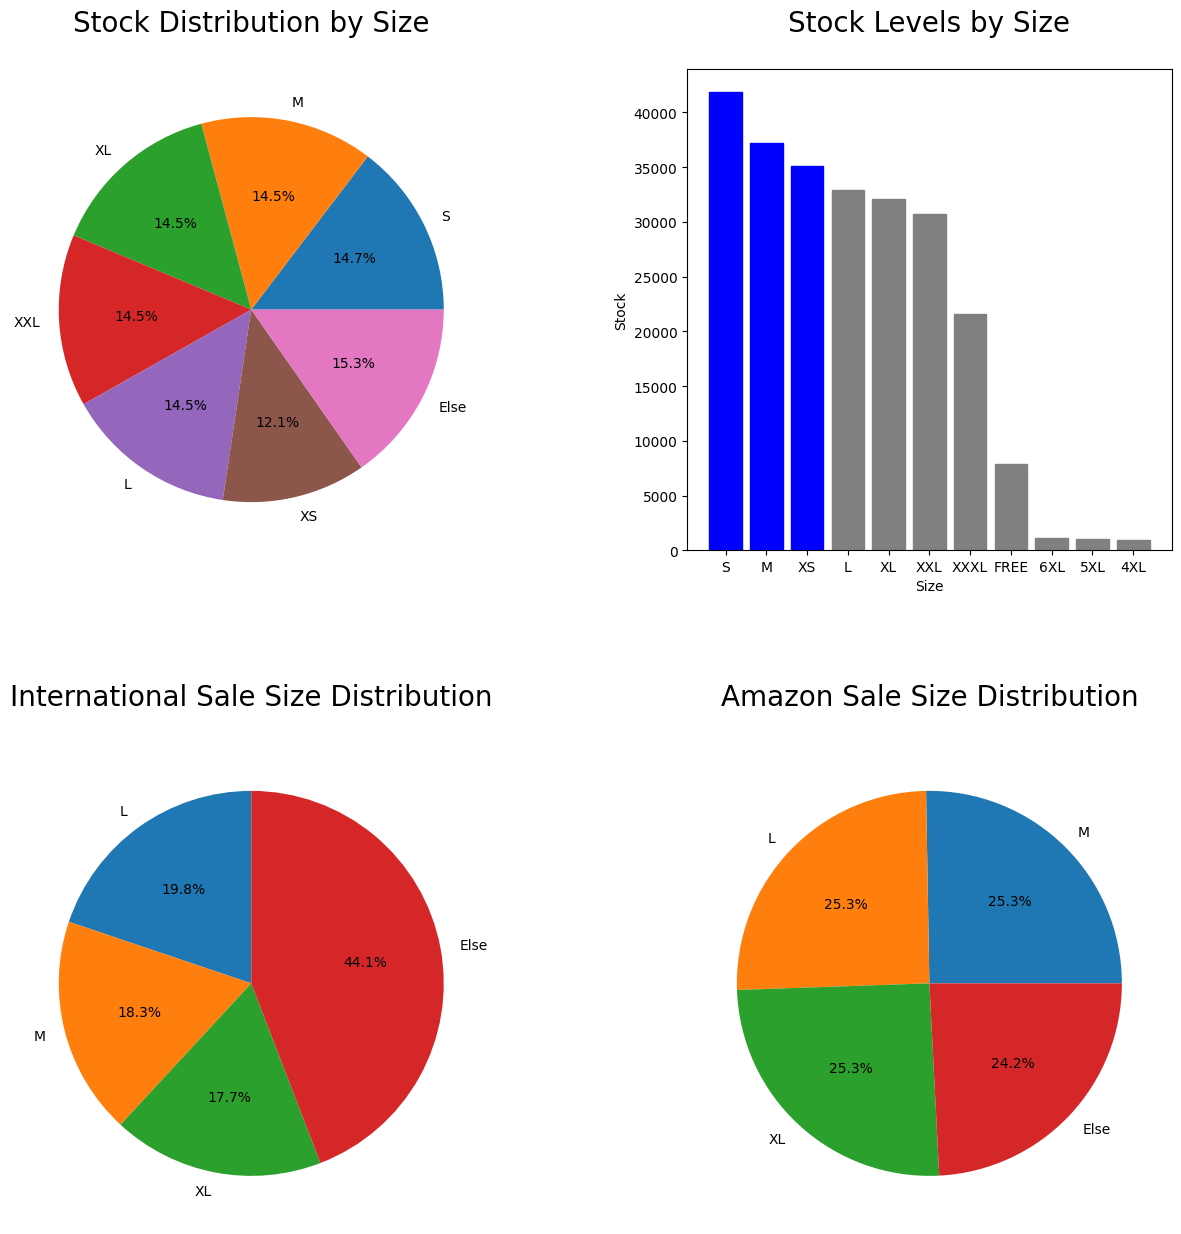

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df1 = pd.read_csv('/content/Sale Report.csv')
df2 = pd.read_csv('/content/International sale Report.csv')
df3 = pd.read_csv('/content/Amazon_Sale_Report.csv')
df4 = df1

# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Plot the first chart
sizes = df1['Size'].value_counts()
sizes['Else'] = sizes[['XXXL', '4XL', '5XL', '6XL', 'FREE']].sum()
sizes = sizes.drop(labels=['XXXL', '4XL', '5XL', '6XL', 'FREE'])
total_stock = sizes.sum()
sizes_percentage = sizes / total_stock * 100
axs[0, 0].pie(sizes, labels=sizes.index, autopct='%1.1f%%')
axs[0, 0].set_title('Stock Distribution by Size',fontsize=20, x=0.5, y=1.05, pad=10)

# Load the data from the CSV file
data = pd.read_csv('/content/Sale Report.csv')

# Map sizes to aggregated sizes
size_map = {'S': 'S', 'M': 'M', 'L': 'L', 'XL': 'XL', 'XXL': '2XL', 'XXXL': '3XL', '4XL': '4XL', '5XL': '5XL', '6XL': '6XL', 'FREE': 'FREE'}
data['AggregatedSize'] = data['Size'].map(size_map)

# Calculate the sum of stock levels for each aggregated size
#data_by_aggregated_size = data.groupby('AggregatedSize').sum().reset_index()
data_by_aggregated_size = data.groupby('Size').sum().reset_index()

# Sort the data by stock levels in descending order
#data_by_aggregated_size = data_by_aggregated_size.sort_values('Stock', ascending=False)
data_by_aggregated_size = data_by_aggregated_size.sort_values('Stock', ascending=False)

# Highlight the top 3 aggregated sizes
data_by_aggregated_size['Highlighted'] = False
data_by_aggregated_size.loc[0:2, 'Highlighted'] = True

# Create the bar plot
bars = axs[0,1].bar(data_by_aggregated_size['Size'], data_by_aggregated_size['Stock'])
for i in range(len(bars)):
    if i < 3:
        bars[i].set_color('blue')
    else:
        bars[i].set_color('gray')
axs[0,1].set(xlabel='Size', ylabel='Stock')
axs[0,1].set_title('Stock Levels by Size', fontsize=20, x=0.5, y=1.05, pad=10)


# Plot the second chart
valid_sizes = ['XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', '4XL', '5XL', '6XL', 'FREE']
df2 = df2[df2['Size'].isin(valid_sizes)]
df2['PCS'] = pd.to_numeric(df2['PCS'], errors='coerce')
size_counts = df2.groupby('Size').size().reset_index(name='count')
size_counts = size_counts.sort_values(by='count', ascending=False)
top_sizes = size_counts.head(3)
other_sizes_count = size_counts.iloc[3:]['count'].sum()
other_sizes = pd.DataFrame({'Size': ['Else'], 'count': [other_sizes_count]})
top_sizes = pd.concat([top_sizes, other_sizes], ignore_index=True)
total_sales = df2['PCS'].sum()
top_sizes['percentage'] = top_sizes['count'] / total_sales * 100
axs[1, 0].pie(top_sizes['percentage'], labels=top_sizes['Size'], autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('International Sale Size Distribution',fontsize=20, x=0.5, y=1.05, pad=10)

# Plot the third chart
sizes = df3['Size']
allowed_sizes = ['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL', 'FREE']
sizes = sizes[sizes.isin(allowed_sizes)]
size_counts = sizes.value_counts()
total_sales = df3['Qty'].sum()
top_sizes = size_counts[:3].index.tolist()
top_sizes_count = size_counts[top_sizes].sum()
top_sizes_percentage = top_sizes_count / total_sales * 100
else_count = size_counts.drop(top_sizes).sum()
else_percentage = else_count / total_sales * 100
labels = top_sizes + ['Else']
values = [top_sizes_percentage] * len(top_sizes) + [else_percentage]
axs[1, 1].pie(values, labels=labels, autopct='%1.1f%%')
axs[1, 1].set_title('Amazon Sale Size Distribution',fontsize=20, x=0.5, y=1.05, pad=10)

# Remove the fourth subplot
#fig.delaxes(axs[0, 1])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()
#fig.savefig('/input/Final Size Analysis.png', dpi=300)


<ipython-input-16-72e3d1e75e9b>:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon_Sale_Report.csv')


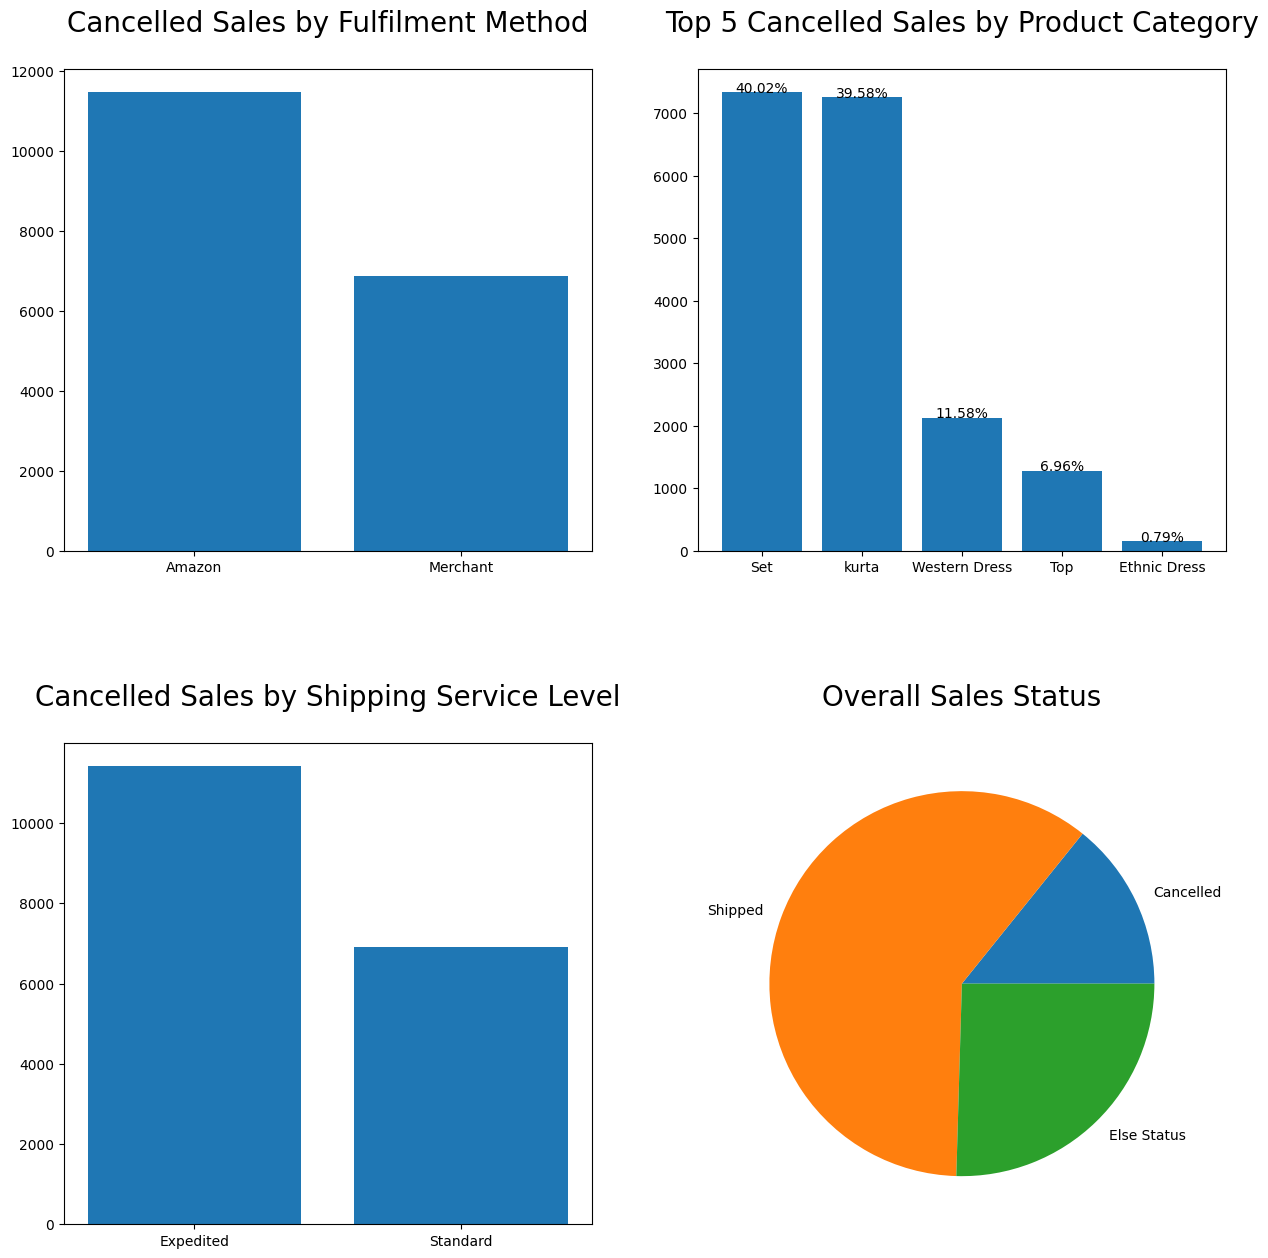

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# read the csv file into a pandas dataframe
df = pd.read_csv('/content/Amazon_Sale_Report.csv')

# filter the dataframe to only include shipped and cancelled sales
filtered_df = df[df['Status'].isin(['Shipped', 'Cancelled'])]

# group the filtered dataframe by status and calculate the count
by_status = filtered_df.groupby('Status').count()['SKU']

# create a new column called 'Grouped Status' to group all other status types into 'Else Status'
df['Grouped Status'] = df['Status'].apply(lambda x: x if x in ['Shipped', 'Cancelled'] else 'Else Status')

# group the original dataframe by the new 'Grouped Status' column and calculate the count
by_grouped_status = df.groupby('Grouped Status').count()['SKU']

# create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# create a bar chart to show the cancelled sales by fulfilment method
cancelled_df = filtered_df[filtered_df['Status'] == 'Cancelled']
by_fulfilment = cancelled_df.groupby('Fulfilment').count()['SKU']
axs[0, 0].bar(by_fulfilment.index, by_fulfilment.values)
axs[0, 0].set_title('Cancelled Sales by Fulfilment Method',fontsize=20, x=0.5, y=1.05, pad=10)

# group cancelled sales by product category and calculate the count
by_category = cancelled_df.groupby('Category').count()['SKU']

# sort the categories by the count of cancelled sales
by_category = by_category.sort_values(ascending=False)

# keep only the top 5 categories
top_category = by_category[:5]

# calculate the percentage of cancelled sales for each top category
category_percentages = (top_category / cancelled_df.shape[0]) * 100

# create a bar chart to show the cancelled sales by top 5 product categories
axs[0, 1].bar(top_category.index, top_category.values)
axs[0, 1].set_title('Top 5 Cancelled Sales by Product Category',fontsize=20, x=0.5, y=1.05, pad=10)

# add the percentage labels to the bar chart
for i, v in enumerate(top_category.values):
    axs[0, 1].text(i, v+5, f'{category_percentages.values[i]:.2f}%', ha='center')



# create a bar chart to show the cancelled sales by shipping service level
by_shipping = cancelled_df.groupby('ship-service-level').count()['SKU']
axs[1, 0].bar(by_shipping.index, by_shipping.values)
axs[1, 0].set_title('Cancelled Sales by Shipping Service Level',fontsize=20, x=0.5, y=1.05, pad=10)

# create a pie chart to show the overall status of sales
by_status = filtered_df.groupby('Status').count()['SKU']
by_status['Else Status'] = df.groupby('Grouped Status').count()['SKU']['Else Status']
axs[1, 1].pie(by_status.values, labels=by_status.index)
axs[1, 1].set_title('Overall Sales Status',fontsize=20, x=0.5, y=1.05, pad=10)

# adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# show the combined chart
plt.show()
#fig.savefig('/input/Cancelled Sale Analysis.png', dpi=300)


<ipython-input-17-032d77d39cb4>:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon_Sale_Report.csv')


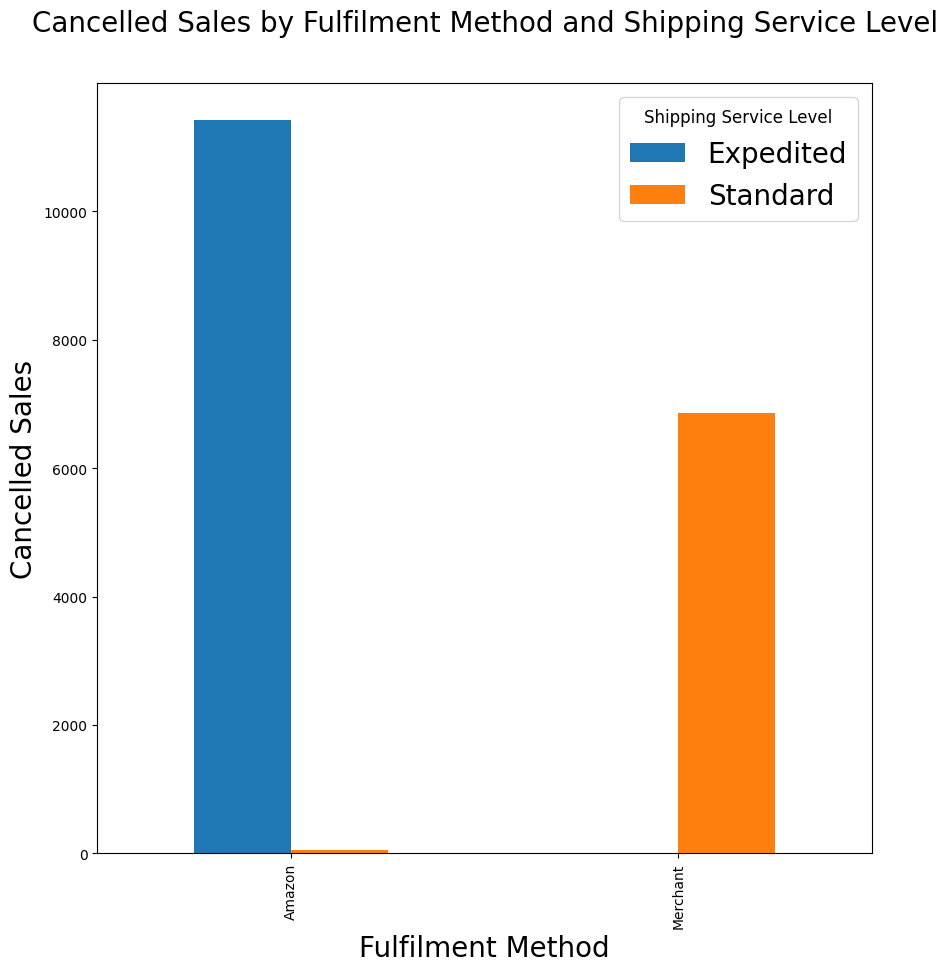

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# read the csv file into a pandas dataframe
df = pd.read_csv('/content/Amazon_Sale_Report.csv')

# filter the dataframe to only include cancelled sales
cancelled_df = df[df['Status'] == 'Cancelled']

# group cancelled sales by fulfilment method and shipping service level
by_fulfilment_shipping = cancelled_df.groupby(['Fulfilment', 'ship-service-level']).count()['SKU'].reset_index()

# create a bar chart to show the cancelled sales by fulfilment method and shipping service level
fig, ax = plt.subplots(figsize=(10, 10))
by_fulfilment_shipping.groupby(['Fulfilment', 'ship-service-level']).sum()['SKU'].unstack().plot(kind='bar', ax=ax)
ax.set_title('Cancelled Sales by Fulfilment Method and Shipping Service Level', fontsize=20, x=0.5, y=1.05, pad=10)
ax.set_xlabel('Fulfilment Method',fontsize=20)
ax.set_ylabel('Cancelled Sales',fontsize=20)
ax.legend(title='Shipping Service Level', fontsize=20, title_fontsize=12)

# save the plot as an image
#fig.savefig('./result/Cancelled by Fulfilment and Shipping.png', dpi=300)

# show the plot
plt.show()


<font color=Blue size=5>Analysis 2: Amazon Sale Report Analysis</font>

In [18]:
# Step 1. Reading & Understanding the dataset

In [19]:
# Import Libraries
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime

import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools

%matplotlib inline

# Setting Up Plot Style
style.use('seaborn-poster')
style.use('fivethirtyeight')

<ipython-input-19-7e4b3f9b145d>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [22]:
# List All Files Under the Input Directory
import os
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/: ['opt', 'lib64', 'libx32', 'mnt', 'usr', 'run', 'lib32', 'var', 'proc', 'sys', 'srv', 'boot', 'lib', 'dev', 'etc', 'bin', 'home', 'sbin', 'root', 'tmp', 'media', 'content', 'kaggle', '.dockerenv', 'datalab', 'tools', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.0-1_all.deb']
/content: ['.config', 'Sale Report.csv', 'Amazon_Sale_Report.csv', 'International sale Report.csv', 'sample_data']


In [23]:
# Read File Amazon Sale Report
df_AmazonSR = pd.read_csv(r'/content/Amazon_Sale_Report.csv')

In [24]:
df_AmazonSR.head()

index             Order ID      Date                        Status Fulfilment Sales Channel  ship-service-level    Style              SKU       Category Size        ASIN Courier Status  Qty currency  Amount    ship-city   ship-state  ship-postal-code ship-country                                      promotion-ids    B2B fulfilled-by Unnamed: 22
0      0  405-8078784-5731545  04-30-22                     Cancelled   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S            Set    S  B09KXVBD7Z            NaN    0      INR  647.62       MUMBAI  MAHARASHTRA          400081.0           IN                                                NaN  False    Easy Ship         NaN
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta  3XL  B09K3WFS32        Shipped    1      INR  406.00    BENGALURU    KARNATAKA          560085.0           IN  Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship         NaN
2      2  404-0687676-7273146  04-30-22                       Shipped     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   XL  B07WV4JV4D        Shipped    1      INR  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0           IN       IN Core Free Shipping 2015/04/08 23-48-5-108   True          NaN         NaN
3      3  403-9615377-8133951  04-30-22                     Cancelled   Merchant      Amazon.in           Standard    J0341       J0341-DR-L  Western Dress    L  B099NRCT7B            NaN    0      INR  753.33   PUDUCHERRY   PUDUCHERRY          605008.0           IN                                                NaN  False    Easy Ship         NaN
4      4  407-1069790-7240320  04-30-22                       Shipped     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            Top  3XL  B098714BZP        Shipped    1      INR  574.00      CHENNAI   TAMIL NADU          600073.0           IN                                                NaN  False          NaN         NaN

In [25]:
# Check Database Dimension
print("Database dimension - df_AmazonSR     :",df_AmazonSR.shape)

# Check Database Size
print("Database size - df_AmazonSR          :",df_AmazonSR.size)

Database dimension - df_AmazonSR     : (128975, 24)
Database size - df_AmazonSR          : 3095400


In [26]:
# Database Column Types
# When verbose=True, the method prints out detailed information about each column in the DataFrame, including column name, number of non-null values, and data type.
# If verbose=False or the verbose parameter is not specified, only the overall information of the DataFrame will be printed.
df_AmazonSR.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [27]:
# Checking the numeric variables of the dataframes
df_AmazonSR.describe()

index            Qty         Amount  ship-postal-code
count  128975.000000  128975.000000  121180.000000     128942.000000
mean    64487.000000       0.904431     648.561465     463966.236509
std     37232.019822       0.313354     281.211687     191476.764941
min         0.000000       0.000000       0.000000     110001.000000
25%     32243.500000       1.000000     449.000000     382421.000000
50%     64487.000000       1.000000     605.000000     500033.000000
75%     96730.500000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000

In [28]:
# Step 2: Data Cleaning & Manipulation

<Axes: >

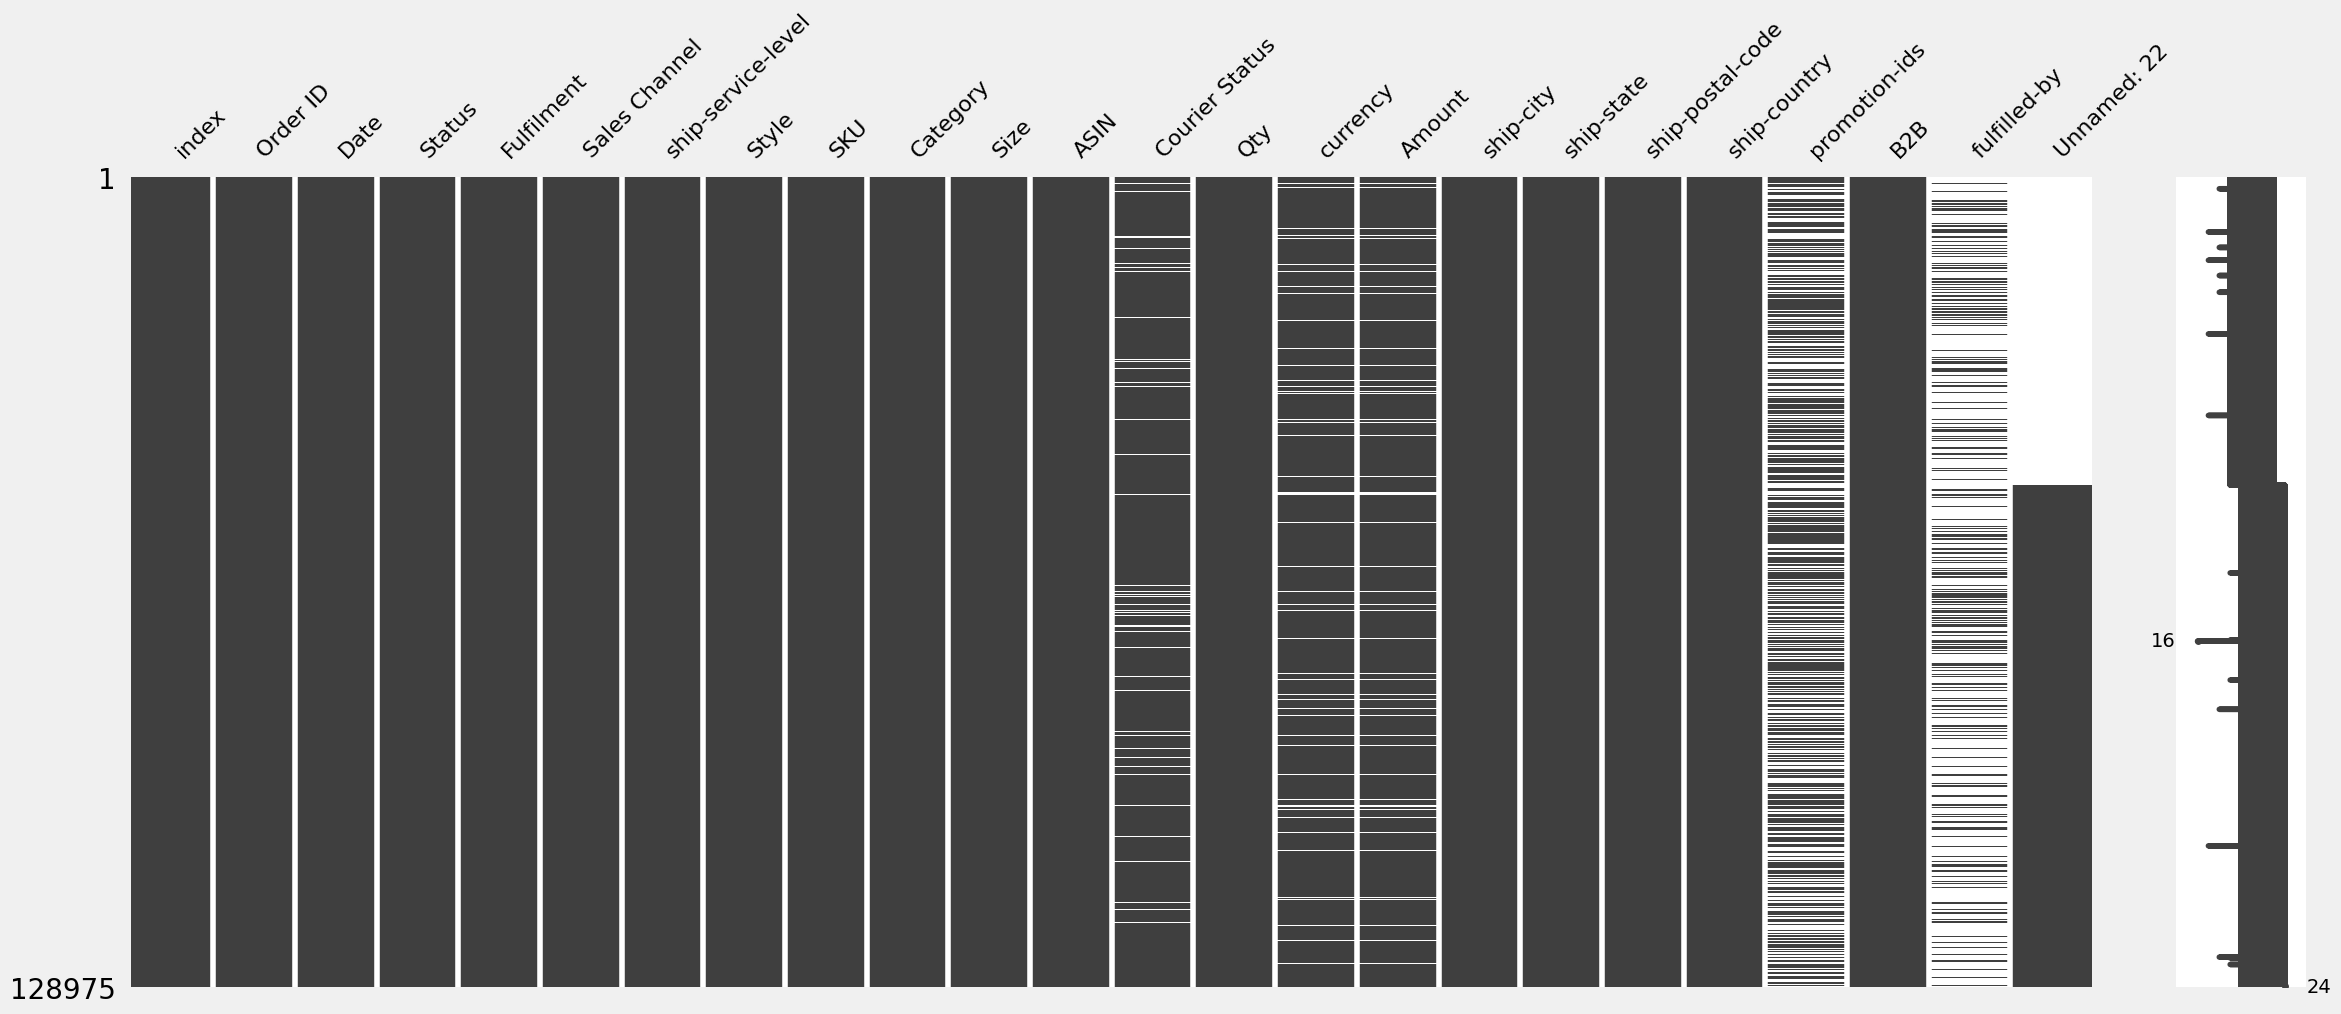

In [29]:
# Null Value Calculation for df_AmazonSR
# Files df_AmazonSR Missing values
import missingno as mn
df_file = df_AmazonSR
mn.matrix(df_file)

<Axes: >

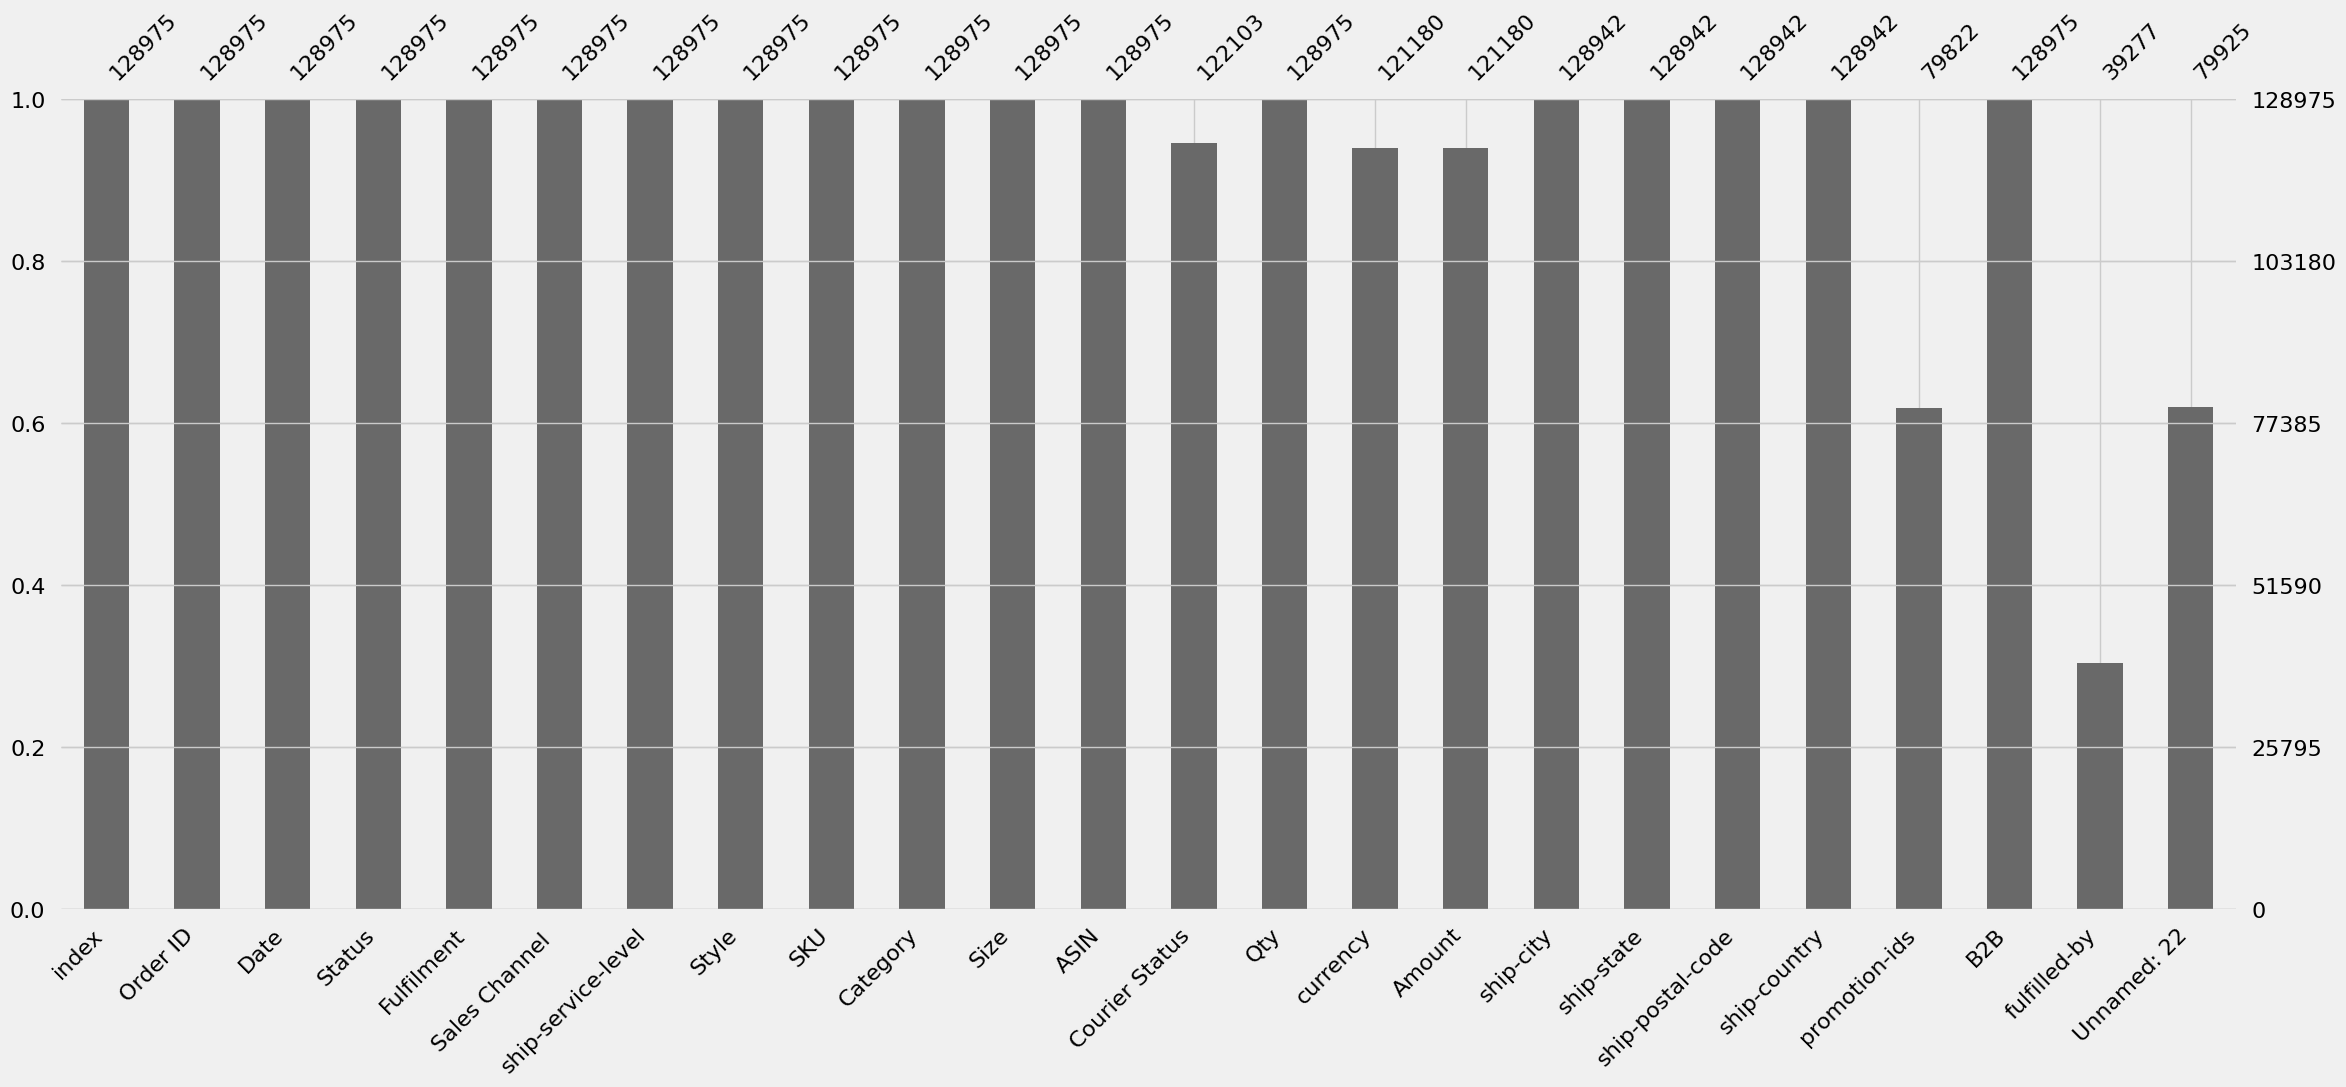

In [30]:
mn.bar(df_file)

In [31]:
# Calculate Percentage of Null Value in Each Column
round(df_file.isnull().sum() / df_file.shape[0] * 100.00,2)

index                  0.00
Order ID               0.00
Date                   0.00
Status                 0.00
Fulfilment             0.00
Sales Channel          0.00
ship-service-level     0.00
Style                  0.00
SKU                    0.00
Category               0.00
Size                   0.00
ASIN                   0.00
Courier Status         5.33
Qty                    0.00
currency               6.04
Amount                 6.04
ship-city              0.03
ship-state             0.03
ship-postal-code       0.03
ship-country           0.03
promotion-ids         38.11
B2B                    0.00
fulfilled-by          69.55
Unnamed: 22           38.03
dtype: float64

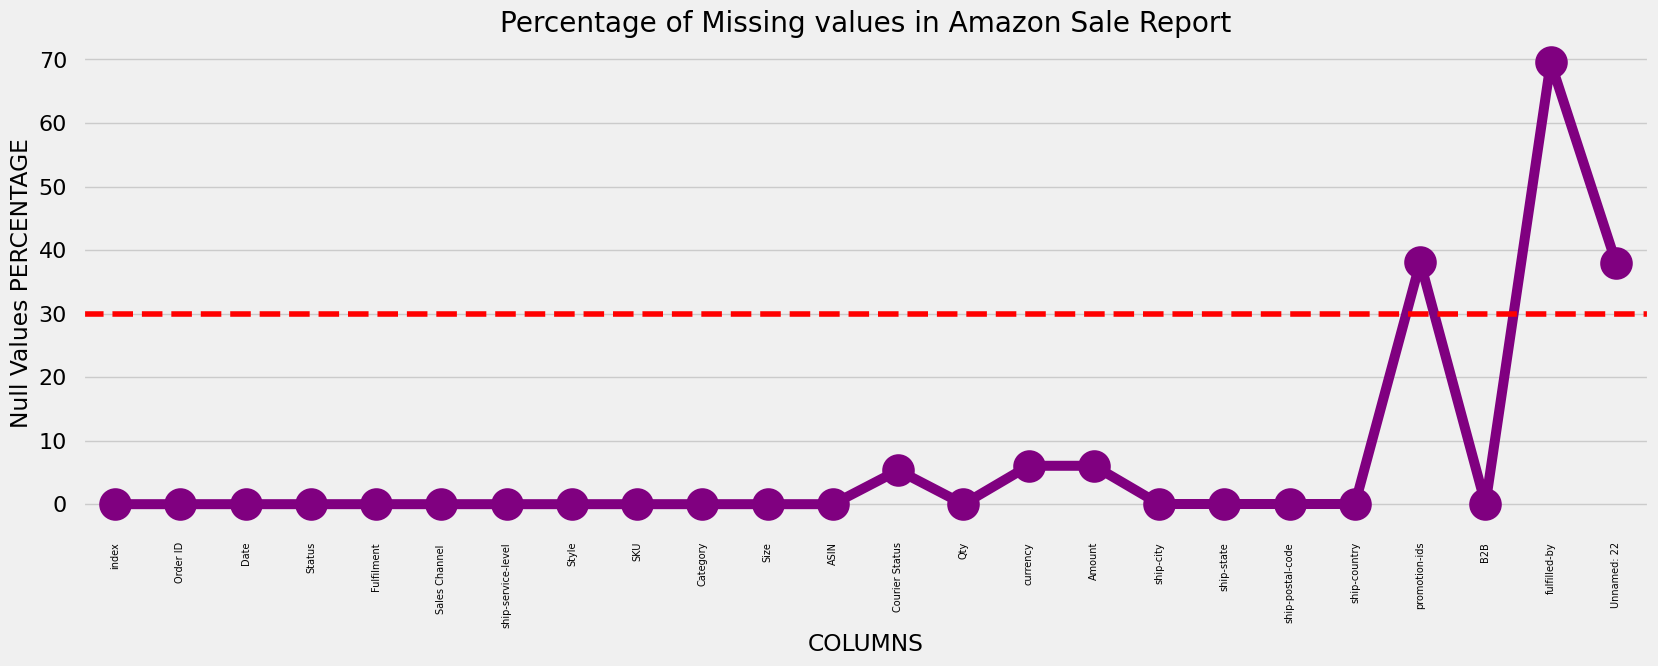

In [32]:
clean_percent = 30

null_df_file = pd.DataFrame((df_file.isnull().sum())*100/df_file.shape[0]).reset_index()
null_df_file.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_df_file,color='purple')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(clean_percent, ls='--',color='red')
plt.title("Percentage of Missing values in Amazon Sale Report")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [33]:
nullcol_clean_percent_df_file = null_df_file[null_df_file["Null Values Percentage"]>=clean_percent]
nullcol_clean_percent_df_file

Column Name  Null Values Percentage
20  promotion-ids               38.110487
22   fulfilled-by               69.546811
23    Unnamed: 22               38.030626

In [34]:
# Calculate columns have more than or euqal to clean_percent null values
len(nullcol_clean_percent_df_file)

3

In [35]:
df_AmazonSR.head()

index             Order ID      Date                        Status Fulfilment Sales Channel  ship-service-level    Style              SKU       Category Size        ASIN Courier Status  Qty currency  Amount    ship-city   ship-state  ship-postal-code ship-country                                      promotion-ids    B2B fulfilled-by Unnamed: 22
0      0  405-8078784-5731545  04-30-22                     Cancelled   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S            Set    S  B09KXVBD7Z            NaN    0      INR  647.62       MUMBAI  MAHARASHTRA          400081.0           IN                                                NaN  False    Easy Ship         NaN
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta  3XL  B09K3WFS32        Shipped    1      INR  406.00    BENGALURU    KARNATAKA          560085.0           IN  Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship         NaN
2      2  404-0687676-7273146  04-30-22                       Shipped     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   XL  B07WV4JV4D        Shipped    1      INR  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0           IN       IN Core Free Shipping 2015/04/08 23-48-5-108   True          NaN         NaN
3      3  403-9615377-8133951  04-30-22                     Cancelled   Merchant      Amazon.in           Standard    J0341       J0341-DR-L  Western Dress    L  B099NRCT7B            NaN    0      INR  753.33   PUDUCHERRY   PUDUCHERRY          605008.0           IN                                                NaN  False    Easy Ship         NaN
4      4  407-1069790-7240320  04-30-22                       Shipped     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            Top  3XL  B098714BZP        Shipped    1      INR  574.00      CHENNAI   TAMIL NADU          600073.0           IN                                                NaN  False          NaN         NaN

In [36]:
# Check the Data Information of Column
for col in df_AmazonSR.columns:
    print("Column:",col, "\n\n", df_AmazonSR[col].value_counts(),"\n")

Column: index 

 index
0         1
85979     1
85992     1
85991     1
85990     1
         ..
42986     1
42985     1
42984     1
42983     1
128974    1
Name: count, Length: 128975, dtype: int64 

Column: Order ID 

 Order ID
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
403-2697348-7766749     1
405-0271223-6692335     1
406-7498475-4257161     1
402-2493916-3621929     1
408-7436540-8728312     1
Name: count, Length: 120378, dtype: int64 

Column: Date 

 Date
05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
04-20-22    1850
04-23-22    1816
04-24-22    1810
05-01-22    1809
04-16-22    1759
04-10-22    1754
04-21-22    1746
04-03-22    1691
04-08-22    1678
04-19-22    1678
04-30-22    1669
04-25-22    1665
04-22-22    1657
04-13-22    1651
04-09-22    1619
04-05-22    1617
04-17-22    1604
06-08-22    1590
06-05-22    1586
06-12-22    1

In [37]:
# Step 3. Data Cleaning
# Create a Variable delete_df_AmazonSR for the Column to be Deleted
# Remove Variables that Exceed 30% of the Null Percentage
unwanted_df_AmazonSR = ['promotion-ids','fulfilled-by','Unnamed: 22']

# Remove Variables that Have Nothing to do with the Amount
unnecessary_df_AmazonSR = ['index','Order ID','currency','ship-postal-code','ship-country']

delete_df_AmazonSR = unwanted_df_AmazonSR + unnecessary_df_AmazonSR

In [38]:
# Calculate Columns to be Deleted
len(delete_df_AmazonSR)

8

In [39]:
# Dropping the unnecessary columns from df_AmazonSR
df_AmazonSR.drop(labels=delete_df_AmazonSR,axis=1,inplace=True)

In [40]:
# Step 4: Null Value Data Imputation

In [41]:
# Impute and Replace Null Values in df_InternationalSR
df_AmazonSR = df_AmazonSR.fillna('Unknown')

# Calculate Percentage of Null Value in Each Column
round(df_AmazonSR.isnull().sum() / df_AmazonSR.shape[0] * 100.00,2)

Date                  0.0
Status                0.0
Fulfilment            0.0
Sales Channel         0.0
ship-service-level    0.0
Style                 0.0
SKU                   0.0
Category              0.0
Size                  0.0
ASIN                  0.0
Courier Status        0.0
Qty                   0.0
Amount                0.0
ship-city             0.0
ship-state            0.0
B2B                   0.0
dtype: float64

In [42]:
# Inspecting the Dataframe After Removal of Unnecessary Columns
df_AmazonSR.shape

(128975, 16)

In [43]:
# Inspecting the Column Types After Removal of Unnecessary Columns
df_AmazonSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Date                128975 non-null  object
 1   Status              128975 non-null  object
 2   Fulfilment          128975 non-null  object
 3   Sales Channel       128975 non-null  object
 4   ship-service-level  128975 non-null  object
 5   Style               128975 non-null  object
 6   SKU                 128975 non-null  object
 7   Category            128975 non-null  object
 8   Size                128975 non-null  object
 9   ASIN                128975 non-null  object
 10  Courier Status      128975 non-null  object
 11  Qty                 128975 non-null  int64 
 12  Amount              128975 non-null  object
 13  ship-city           128975 non-null  object
 14  ship-state          128975 non-null  object
 15  B2B                 128975 non-null  bool  
dtypes:

In [44]:
# Check the Data Information of Column
for col in df_AmazonSR.columns:
    print("Column:",col, "\n\n", df_AmazonSR[col].value_counts(),"\n")

Column: Date 

 Date
05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
04-20-22    1850
04-23-22    1816
04-24-22    1810
05-01-22    1809
04-16-22    1759
04-10-22    1754
04-21-22    1746
04-03-22    1691
04-08-22    1678
04-19-22    1678
04-30-22    1669
04-25-22    1665
04-22-22    1657
04-13-22    1651
04-09-22    1619
04-05-22    1617
04-17-22    1604
06-08-22    1590
06-05-22    1586
06-12-22    1575
04-18-22    1568
06-09-22    1568
04-26-22    1563
04-11-22    1562
04-06-22    1557
04-02-22    1555
06-07-22    1535
04-07-22    1535
06-06-22    1533
06-01-22    1523
05-08-22    1472
04-01-22    1470
05-05-22    1467
04-29-22    1466
04-04-22    1465
04-27-22    1459
04-12-22    1451
06-04-22    1437
05-07-22    1433
06-14-22    1429
04-28-22    1416
06-02-22    1412
05-15-22    1410
06-13-22    1396
05-31-22    1390
05-06-22    1386
06-11-22    1369
05-28-22    1347
06-21-22    1319
05-09-22    1309
06-22-22    1304
05-29-22    1303
05-27-22  

In [45]:
# Step 5: Standardize Values

In [46]:
# Check Data Type Infomation
df_AmazonSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Date                128975 non-null  object
 1   Status              128975 non-null  object
 2   Fulfilment          128975 non-null  object
 3   Sales Channel       128975 non-null  object
 4   ship-service-level  128975 non-null  object
 5   Style               128975 non-null  object
 6   SKU                 128975 non-null  object
 7   Category            128975 non-null  object
 8   Size                128975 non-null  object
 9   ASIN                128975 non-null  object
 10  Courier Status      128975 non-null  object
 11  Qty                 128975 non-null  int64 
 12  Amount              128975 non-null  object
 13  ship-city           128975 non-null  object
 14  ship-state          128975 non-null  object
 15  B2B                 128975 non-null  bool  
dtypes:

In [47]:
# Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['Date','Status','Fulfilment','Sales Channel ',
                       'ship-service-level','Style','SKU','Category',
                       'Size','ASIN','Courier Status','ship-city',
                       'ship-state'
                      ]
for col in categorical_columns:
    df_AmazonSR[col] =pd.Categorical(df_AmazonSR[col])

In [48]:
# Numeric Columns
float_columns = ['Qty','Amount']

# Remove Unumerical Values from Numeric Columns
for col in float_columns:
    df_AmazonSR = df_AmazonSR[pd.to_numeric(df_AmazonSR[col], errors='coerce').notnull()]

# Convert the Number to Float Type
for col in float_columns:
    df_AmazonSR[col] = df_AmazonSR[col].astype(float)

# Converting Negative Values in Numerical Columns to Positive Values
for col in float_columns:
    df_AmazonSR[col] = abs(df_AmazonSR[col])

In [49]:
# Data Type Conversion
# Check if the Column Type is the Correct Data Type Using the Above Result
df_AmazonSR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Date                121180 non-null  category
 1   Status              121180 non-null  category
 2   Fulfilment          121180 non-null  category
 3   Sales Channel       121180 non-null  category
 4   ship-service-level  121180 non-null  category
 5   Style               121180 non-null  category
 6   SKU                 121180 non-null  category
 7   Category            121180 non-null  category
 8   Size                121180 non-null  category
 9   ASIN                121180 non-null  category
 10  Courier Status      121180 non-null  category
 11  Qty                 121180 non-null  float64 
 12  Amount              121180 non-null  float64 
 13  ship-city           121180 non-null  category
 14  ship-state          121180 non-null  category
 15  B2B                 12

In [50]:
# Use the applymap() Function to Convert All Strings to Only the First Letter Capitalized Format
df_AmazonSR = df_AmazonSR.applymap(lambda x: x.title() if type(x) == str else x)

In [51]:
# Check the Result
df_AmazonSR.head()

Date                        Status Fulfilment Sales Channel  ship-service-level    Style              SKU       Category Size        ASIN Courier Status  Qty  Amount    ship-city   ship-state    B2B
0  04-30-22                     Cancelled   Merchant      Amazon.In           Standard   Set389   Set389-Kr-Np-S            Set    S  B09Kxvbd7Z        Unknown  0.0  647.62       Mumbai  Maharashtra  False
1  04-30-22  Shipped - Delivered To Buyer   Merchant      Amazon.In           Standard  Jne3781  Jne3781-Kr-Xxxl          Kurta  3Xl  B09K3Wfs32        Shipped  1.0  406.00    Bengaluru    Karnataka  False
2  04-30-22                       Shipped     Amazon      Amazon.In          Expedited  Jne3371    Jne3371-Kr-Xl          Kurta   Xl  B07Wv4Jv4D        Shipped  1.0  329.00  Navi Mumbai  Maharashtra   True
3  04-30-22                     Cancelled   Merchant      Amazon.In           Standard    J0341       J0341-Dr-L  Western Dress    L  B099Nrct7B        Unknown  0.0  753.33   Puducherry   Puducherry  False
4  04-30-22                       Shipped     Amazon      Amazon.In          Expedited  Jne3671  Jne3671-Tu-Xxxl            Top  3Xl  B098714Bzp        Shipped  1.0  574.00      Chennai   Tamil Nadu  False

In [52]:
# Check the Data Information of Column
for col in df_AmazonSR.columns:
    print("Column:",col, "\n\n", df_AmazonSR[col].value_counts(),"\n")

Column: Date 

 Date
05-02-22    1932
05-03-22    1921
05-04-22    1867
04-14-22    1771
04-20-22    1753
04-23-22    1730
05-01-22    1705
04-15-22    1700
04-24-22    1699
04-10-22    1673
04-16-22    1647
04-21-22    1635
04-03-22    1592
04-08-22    1584
04-19-22    1570
04-25-22    1559
04-22-22    1559
04-13-22    1546
04-30-22    1545
04-09-22    1528
04-17-22    1524
04-05-22    1517
06-05-22    1497
06-08-22    1483
04-26-22    1480
04-06-22    1474
06-09-22    1467
06-12-22    1467
04-18-22    1462
04-11-22    1460
04-02-22    1456
06-07-22    1449
06-06-22    1446
04-07-22    1434
06-01-22    1428
05-08-22    1381
05-05-22    1375
04-04-22    1374
04-27-22    1374
06-04-22    1366
04-12-22    1365
04-01-22    1362
05-07-22    1356
04-29-22    1354
06-14-22    1345
04-28-22    1341
06-02-22    1330
05-06-22    1323
05-15-22    1322
06-13-22    1313
05-31-22    1309
06-11-22    1302
05-28-22    1267
05-09-22    1248
05-29-22    1230
06-21-22    1228
05-25-22    1213
06-22-22  

In [53]:
# Checking the Null Value % of Each Column in df_AmazonSR Dataframe
round(df_AmazonSR.isnull().sum() / df_AmazonSR.shape[0] * 100.00,3)

Date                  0.0
Status                0.0
Fulfilment            0.0
Sales Channel         0.0
ship-service-level    0.0
Style                 0.0
SKU                   0.0
Category              0.0
Size                  0.0
ASIN                  0.0
Courier Status        0.0
Qty                   0.0
Amount                0.0
ship-city             0.0
ship-state            0.0
B2B                   0.0
dtype: float64

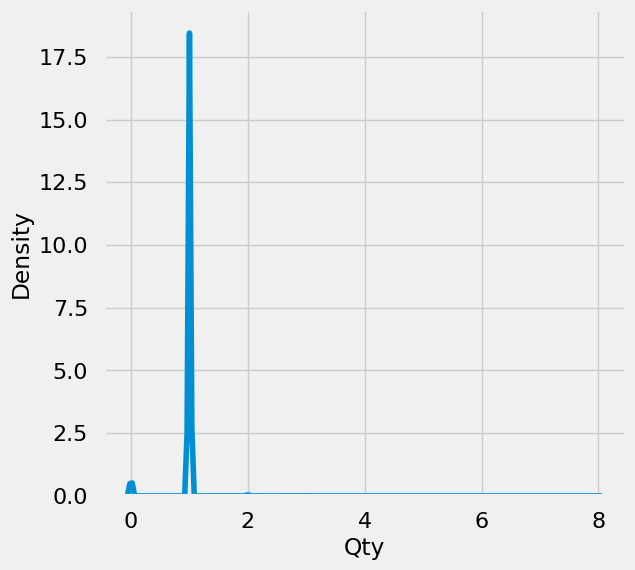

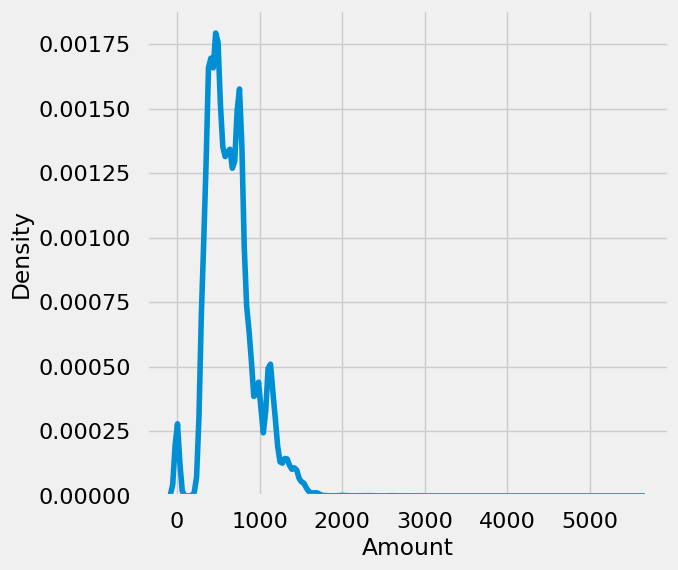

In [54]:
# Check Outlier

# Check Outlier in Qty column
plt.figure(figsize=(6,6))
sns.kdeplot(df_AmazonSR['Qty'])
plt.show()

# Check Outlier in Amount column
plt.figure(figsize=(6,6))
sns.kdeplot(df_AmazonSR['Amount'])
plt.show()

In [55]:
# Step 5: Data Analysis

In [56]:
# Binning Numerical Columns to Create a Categorical Column

# Creating bins for Amount
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_AmazonSR['AmountBin'] = pd.cut(df_AmazonSR['Amount'], bins=bins, labels=slot)

In [57]:
# Display the Result
df_AmazonSR['AmountBin'].value_counts(normalize=True) * 100

AmountBin
400-500       16.573963
300-400       16.518424
700-800       15.336133
500-600       14.076424
600-700       13.089358
1000 Above    11.218728
800-900        7.103007
900-1000       4.428755
200-300        1.652684
100-200        0.002524
0-100          0.000000
Name: proportion, dtype: float64

In [58]:
# Check the Result
df_AmazonSR.head()

Date                        Status Fulfilment Sales Channel  ship-service-level    Style              SKU       Category Size        ASIN Courier Status  Qty  Amount    ship-city   ship-state    B2B AmountBin
0  04-30-22                     Cancelled   Merchant      Amazon.In           Standard   Set389   Set389-Kr-Np-S            Set    S  B09Kxvbd7Z        Unknown  0.0  647.62       Mumbai  Maharashtra  False   600-700
1  04-30-22  Shipped - Delivered To Buyer   Merchant      Amazon.In           Standard  Jne3781  Jne3781-Kr-Xxxl          Kurta  3Xl  B09K3Wfs32        Shipped  1.0  406.00    Bengaluru    Karnataka  False   400-500
2  04-30-22                       Shipped     Amazon      Amazon.In          Expedited  Jne3371    Jne3371-Kr-Xl          Kurta   Xl  B07Wv4Jv4D        Shipped  1.0  329.00  Navi Mumbai  Maharashtra   True   300-400
3  04-30-22                     Cancelled   Merchant      Amazon.In           Standard    J0341       J0341-Dr-L  Western Dress    L  B099Nrct7B        Unknown  0.0  753.33   Puducherry   Puducherry  False   700-800
4  04-30-22                       Shipped     Amazon      Amazon.In          Expedited  Jne3671  Jne3671-Tu-Xxxl            Top  3Xl  B098714Bzp        Shipped  1.0  574.00      Chennai   Tamil Nadu  False   500-600

In [59]:
# Compute the Sum of Amount for Each Category
category_mean = df_AmazonSR.groupby("Category")["Amount"].mean().sort_values(ascending=False)

# Display the Result
print(category_mean)

Category
Set              833.385571
Saree            799.572645
Western Dress    762.790580
Ethnic Dress     723.895389
Top              526.098603
Blouse           520.327106
Kurta            455.927108
Bottom           358.733286
Dupatta          305.000000
Name: Amount, dtype: float64


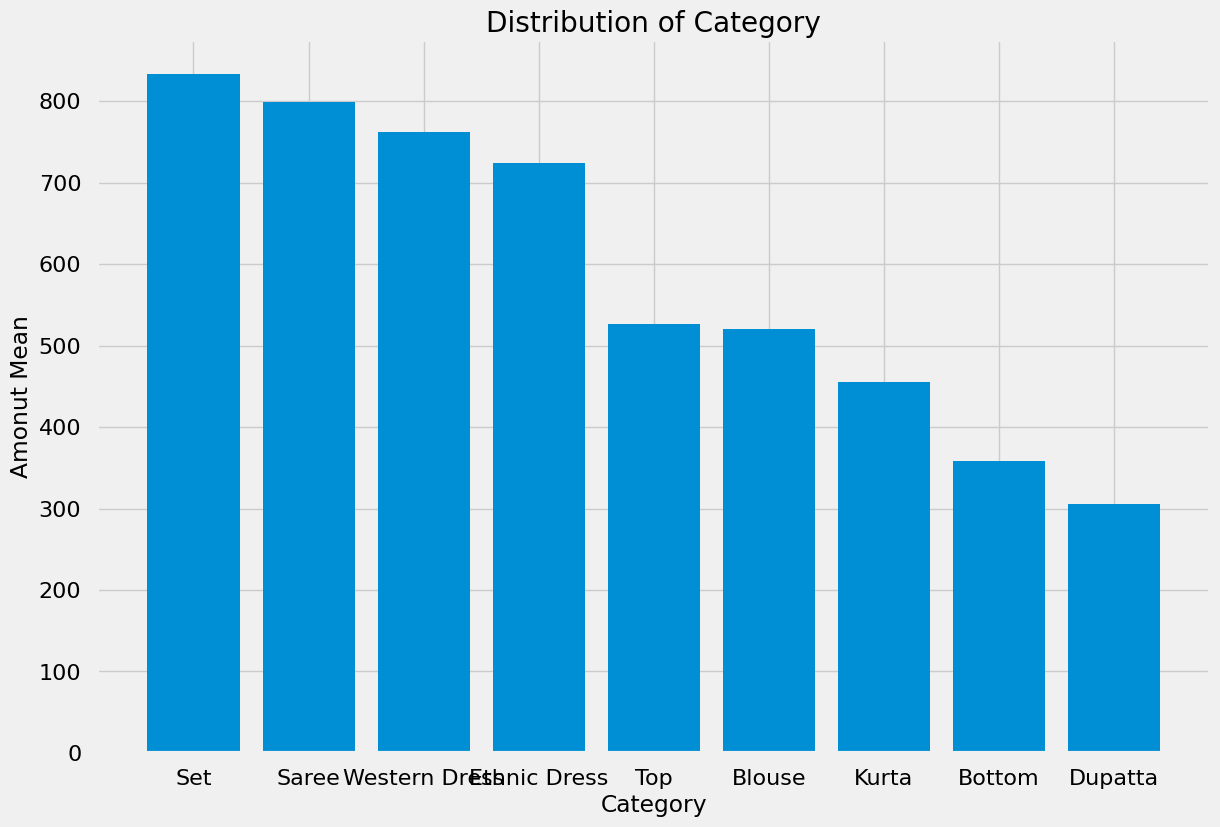

In [60]:
# Draw a Histogram of the Amount Average Value of Each Category
plt.bar(category_mean.index, category_mean.values)

plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Amonut Mean')
plt.show()

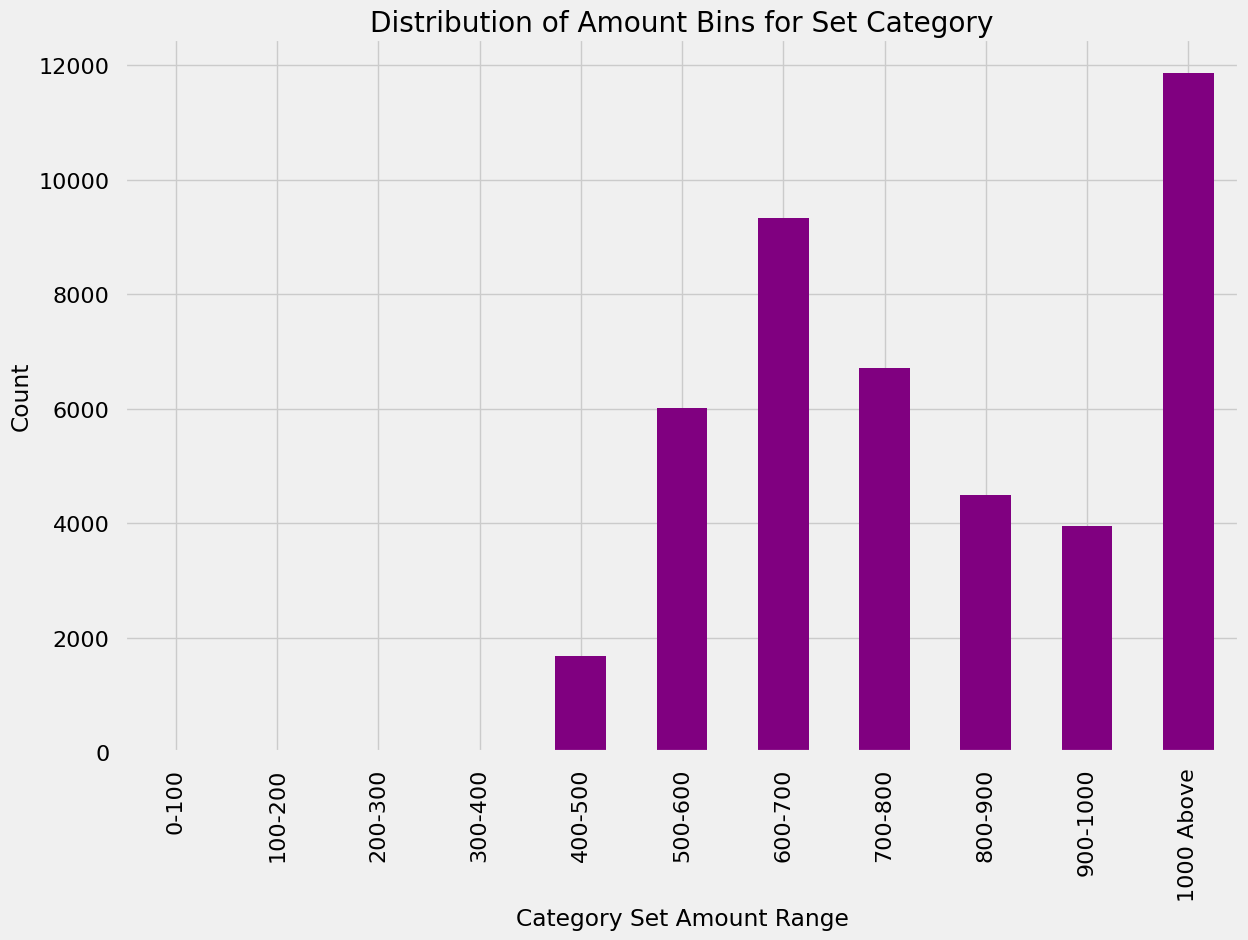

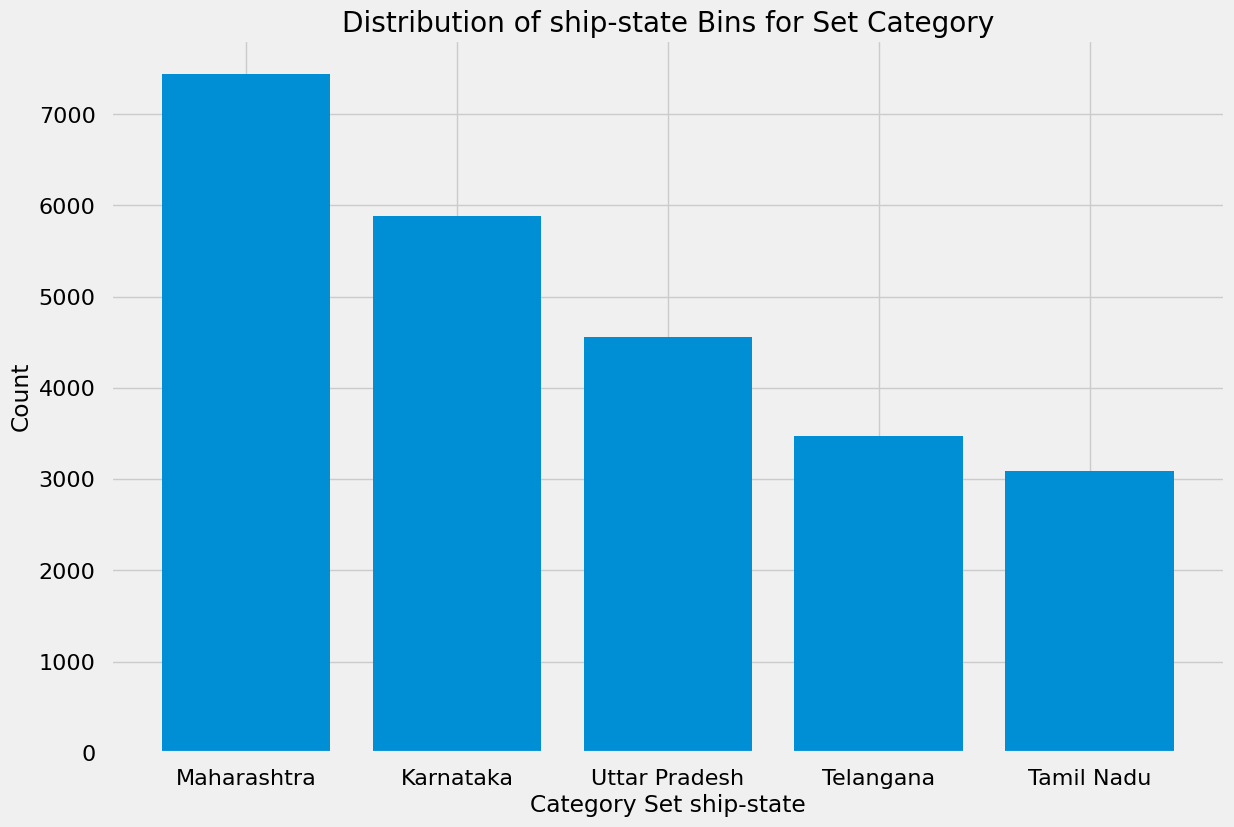

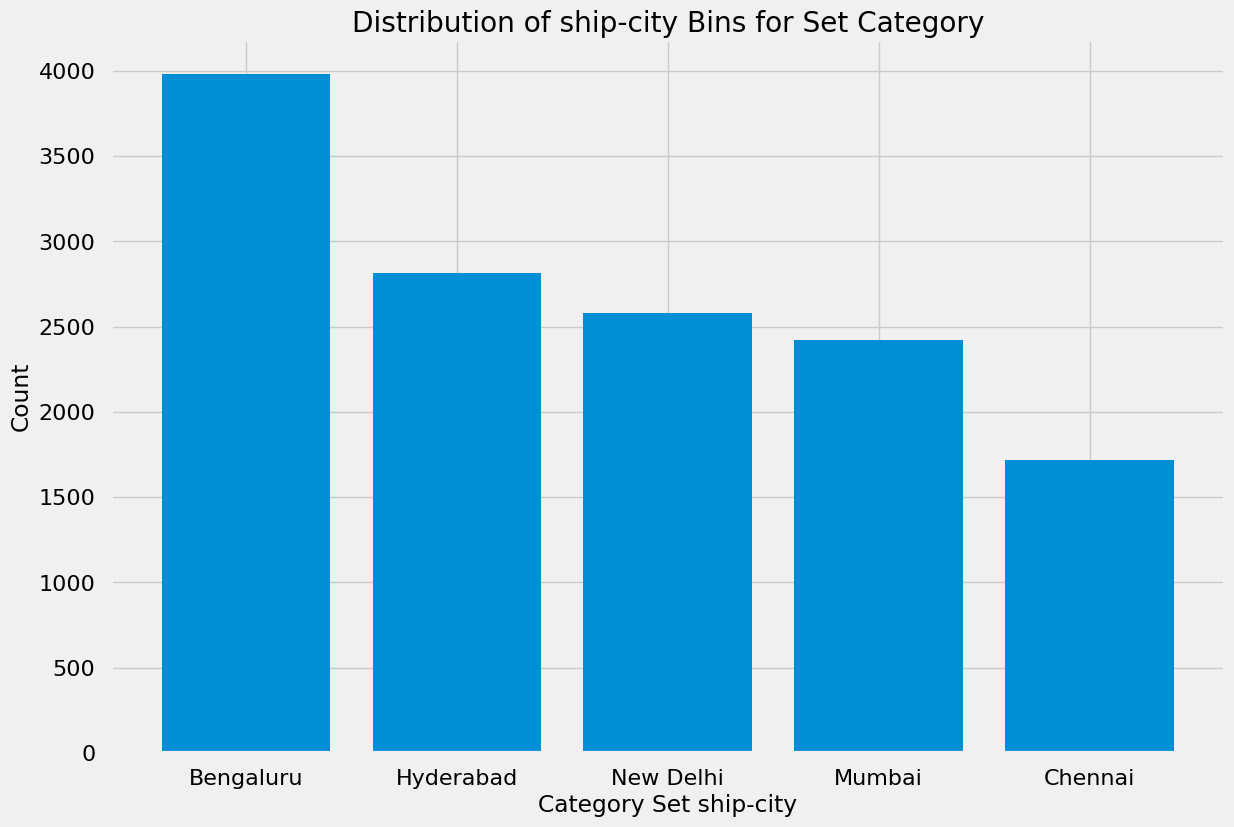

In [61]:
# Filter dataframe to include only rows where 'Category' is 'Set'
df_Set = df_AmazonSR[df_AmazonSR['Category'] == 'Set' ]
df_Set = df_Set[df_Set['Qty'] > 0 ]

# Creating bins for Category Amount
bins_Set = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Set = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Set['CategoryBin'] = pd.cut(df_Set['Amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Set['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Set Category')
plt.xlabel('Category Set Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Set["ship-state"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Set Category')
plt.xlabel('Category Set ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Set["ship-city"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Set Category')
plt.xlabel('Category Set ship-city')
plt.ylabel('Count')
plt.show()

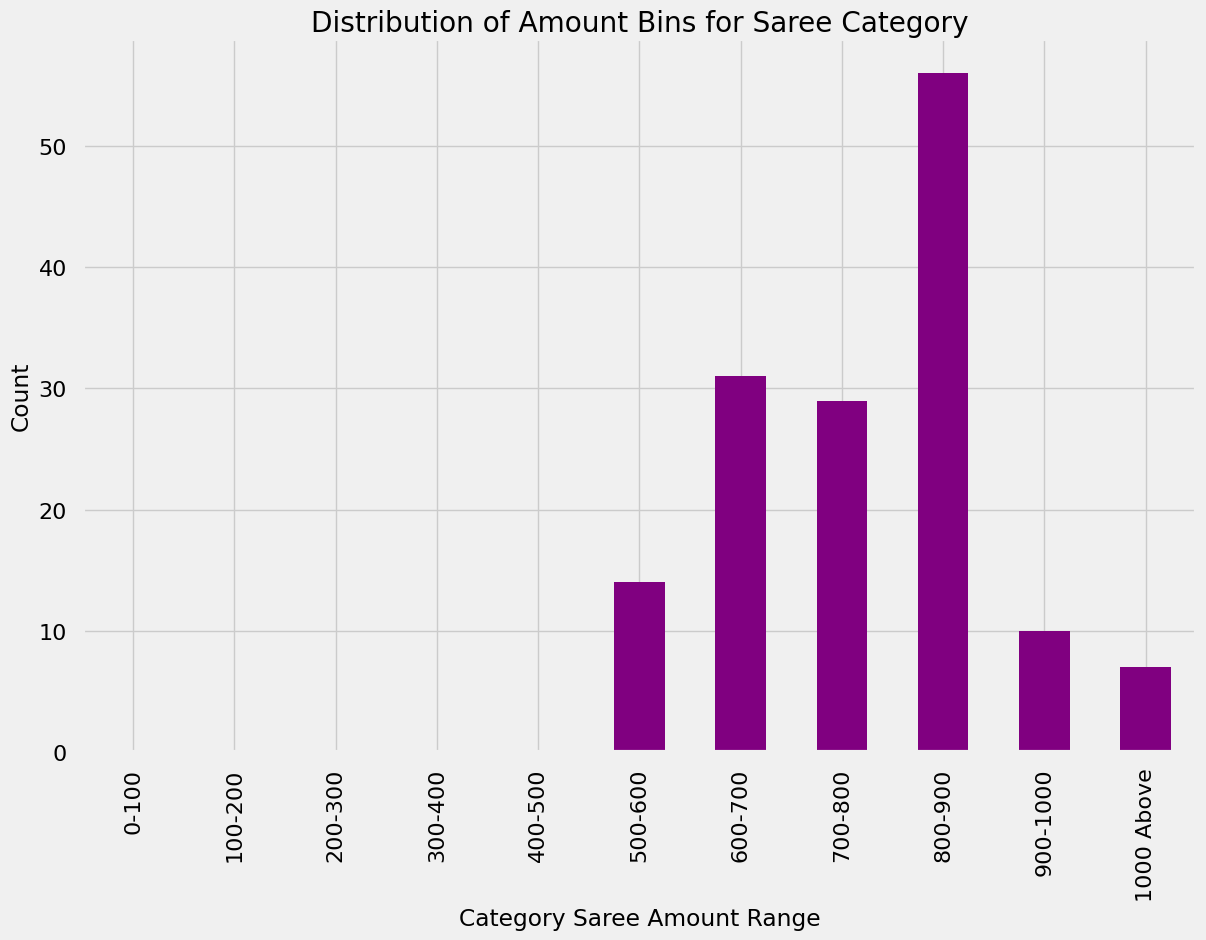

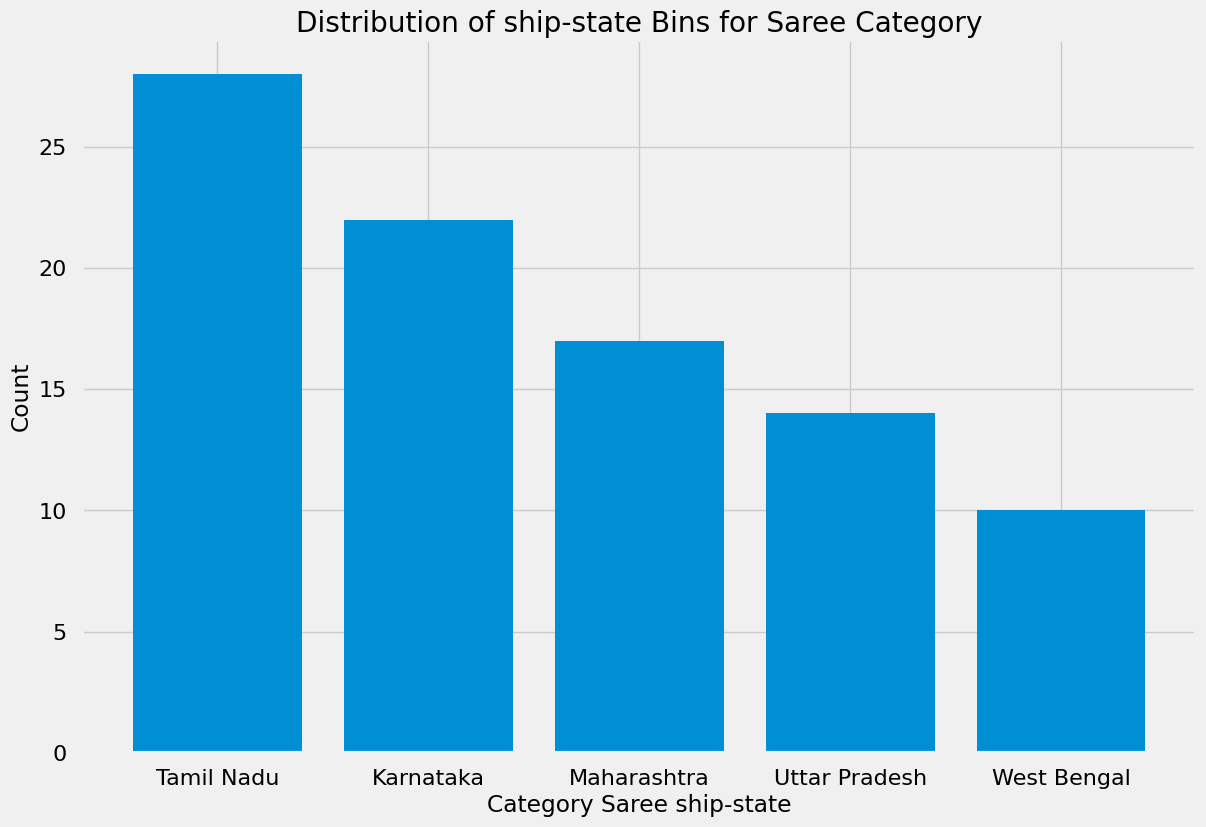

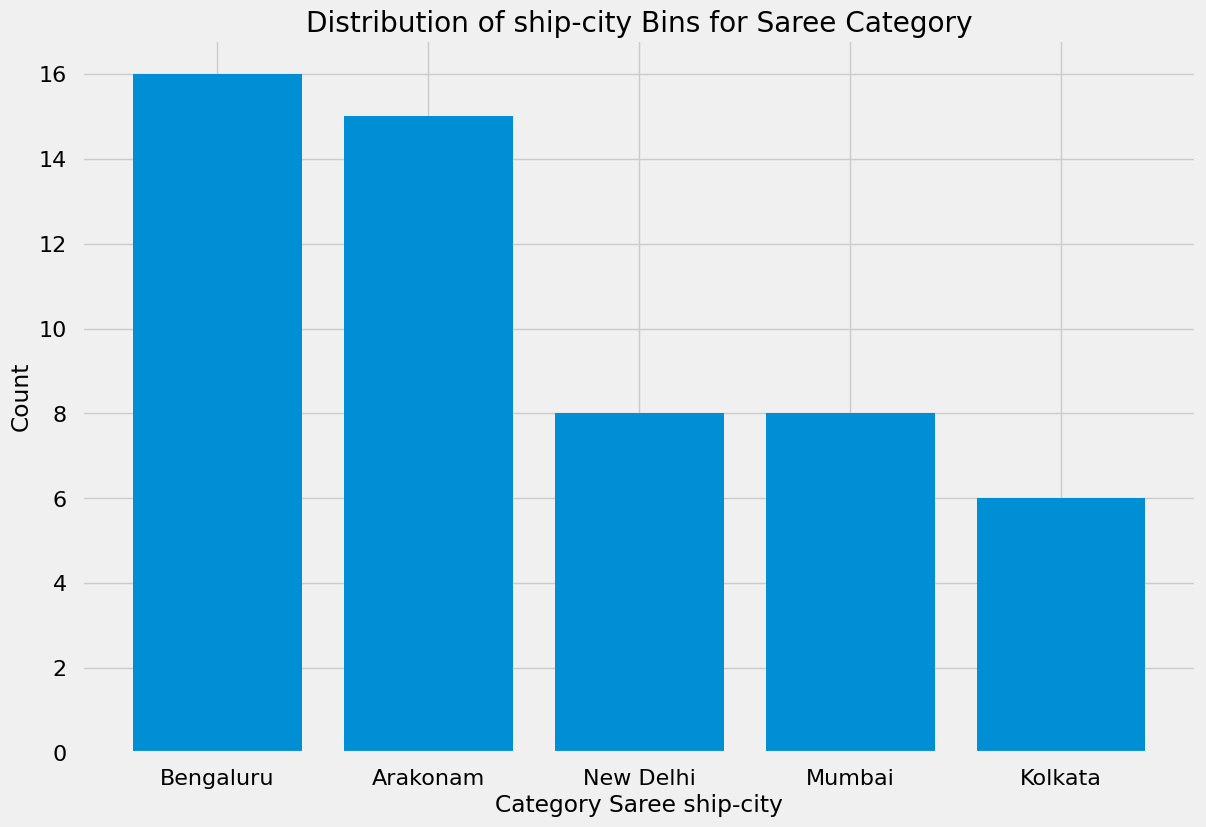

In [62]:
# Filter dataframe to include only rows where 'Category' is 'Saree'
df_Saree = df_AmazonSR[df_AmazonSR['Category'] == 'Saree' ]
df_Saree = df_Saree[df_Saree['Qty'] > 0 ]

# Creating bins for Category Amount
bins_Saree = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Saree = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Saree['CategoryBin'] = pd.cut(df_Saree['Amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Saree['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Saree Category')
plt.xlabel('Category Saree Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Saree["ship-state"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Saree Category')
plt.xlabel('Category Saree ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Saree["ship-city"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Saree Category')
plt.xlabel('Category Saree ship-city')
plt.ylabel('Count')
plt.show()

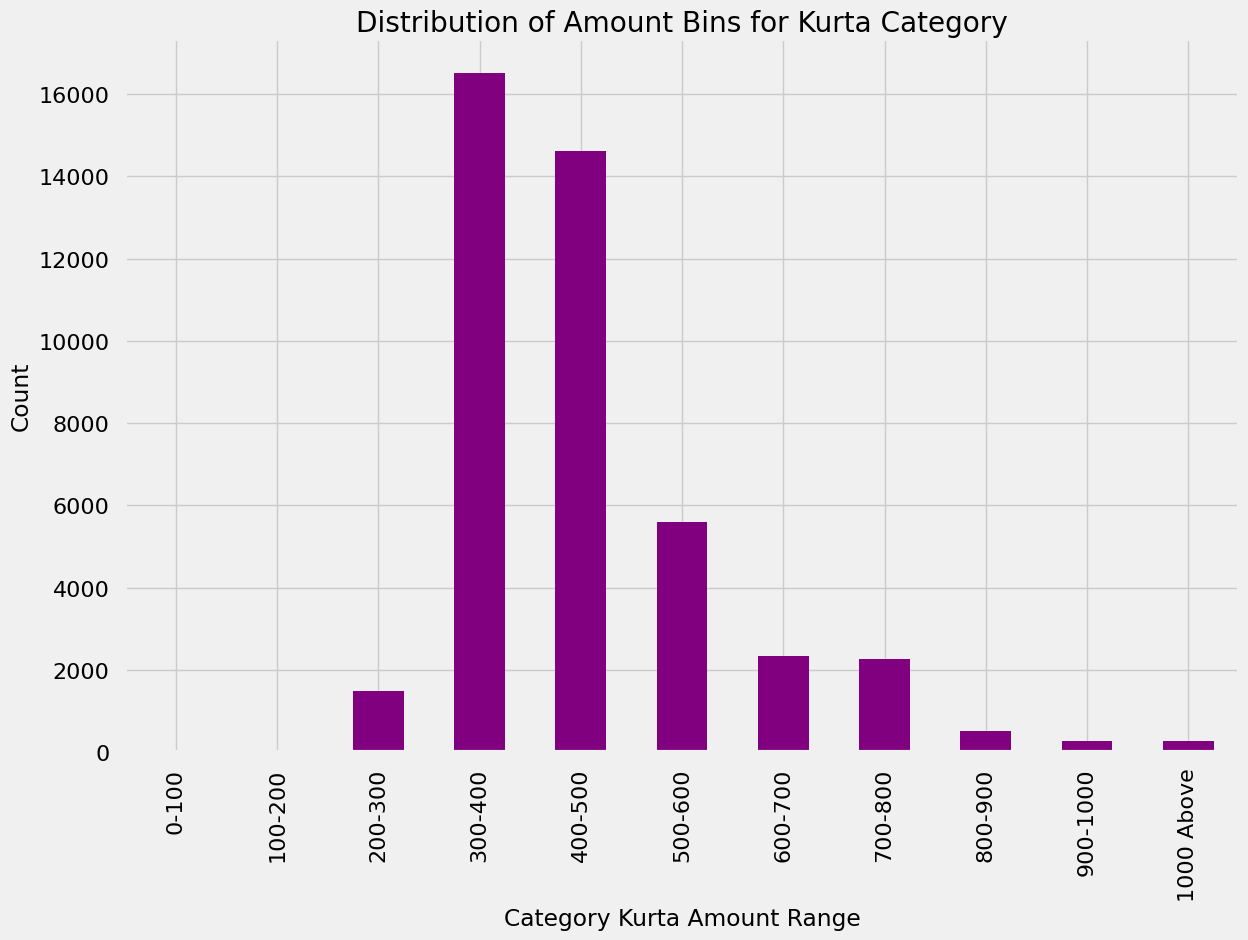

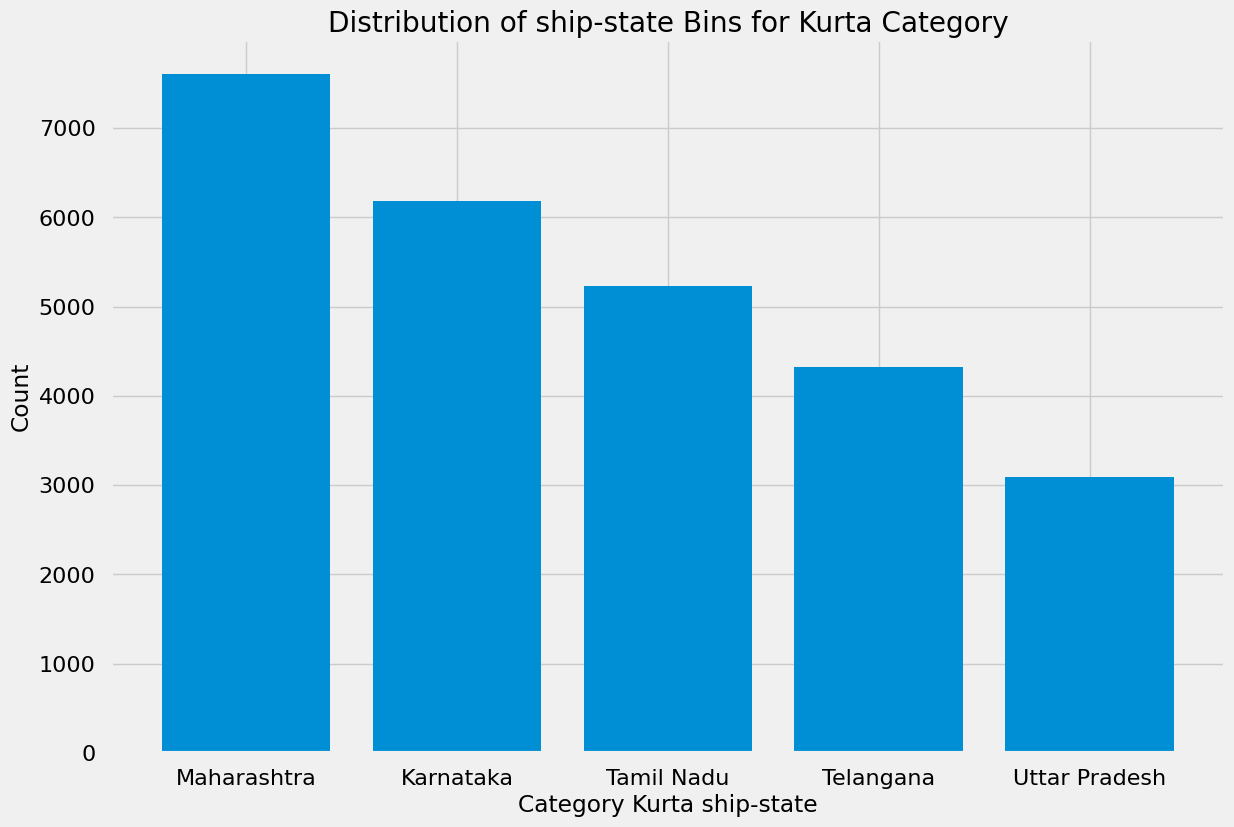

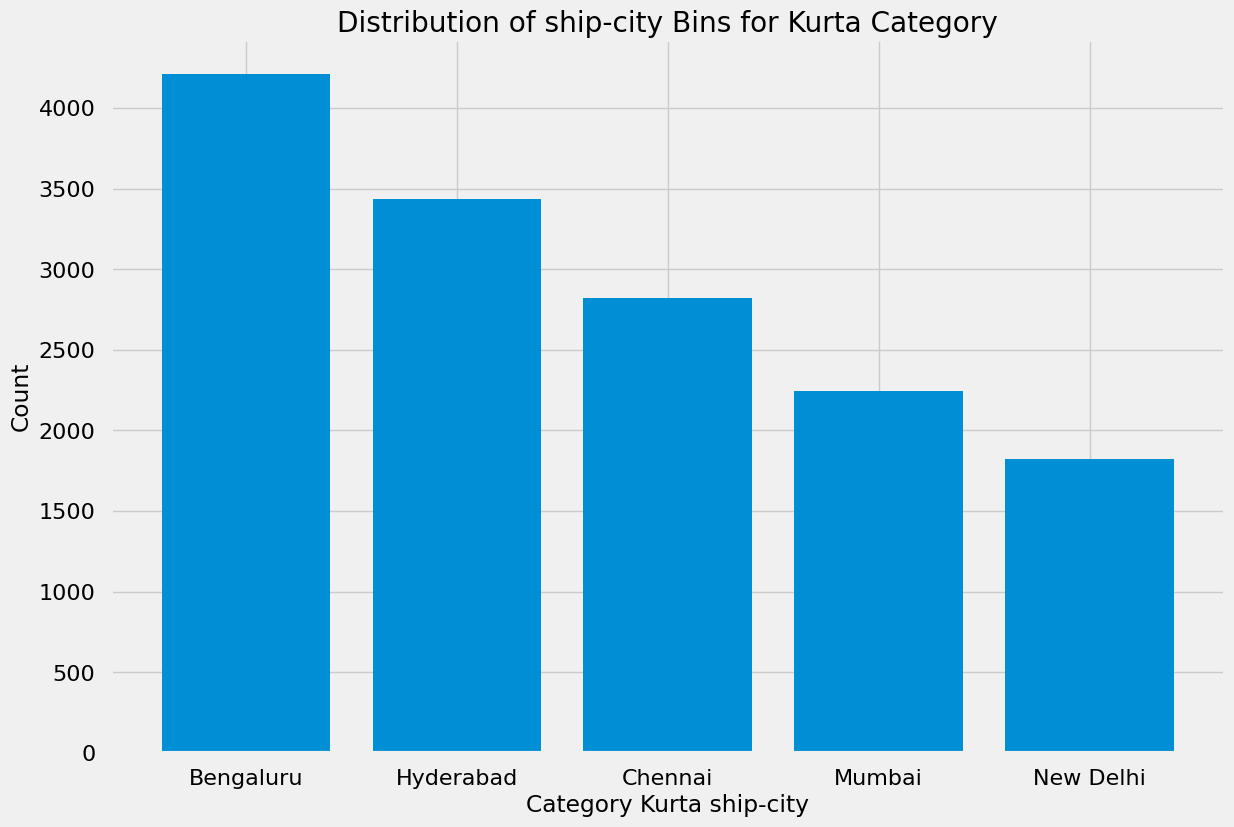

In [63]:
# Filter dataframe to include only rows where 'Category' is 'Kurta'
df_Kurta = df_AmazonSR[df_AmazonSR['Category'] == 'Kurta' ]
df_Kurta = df_Kurta[df_Kurta['Qty'] > 0 ]

# Creating bins for Category Amount
bins_Kurta = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Kurta = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Kurta['CategoryBin'] = pd.cut(df_Kurta['Amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Kurta['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Kurta Category')
plt.xlabel('Category Kurta Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Kurta["ship-state"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Kurta Category')
plt.xlabel('Category Kurta ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Kurta["ship-city"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Kurta Category')
plt.xlabel('Category Kurta ship-city')
plt.ylabel('Count')
plt.show()

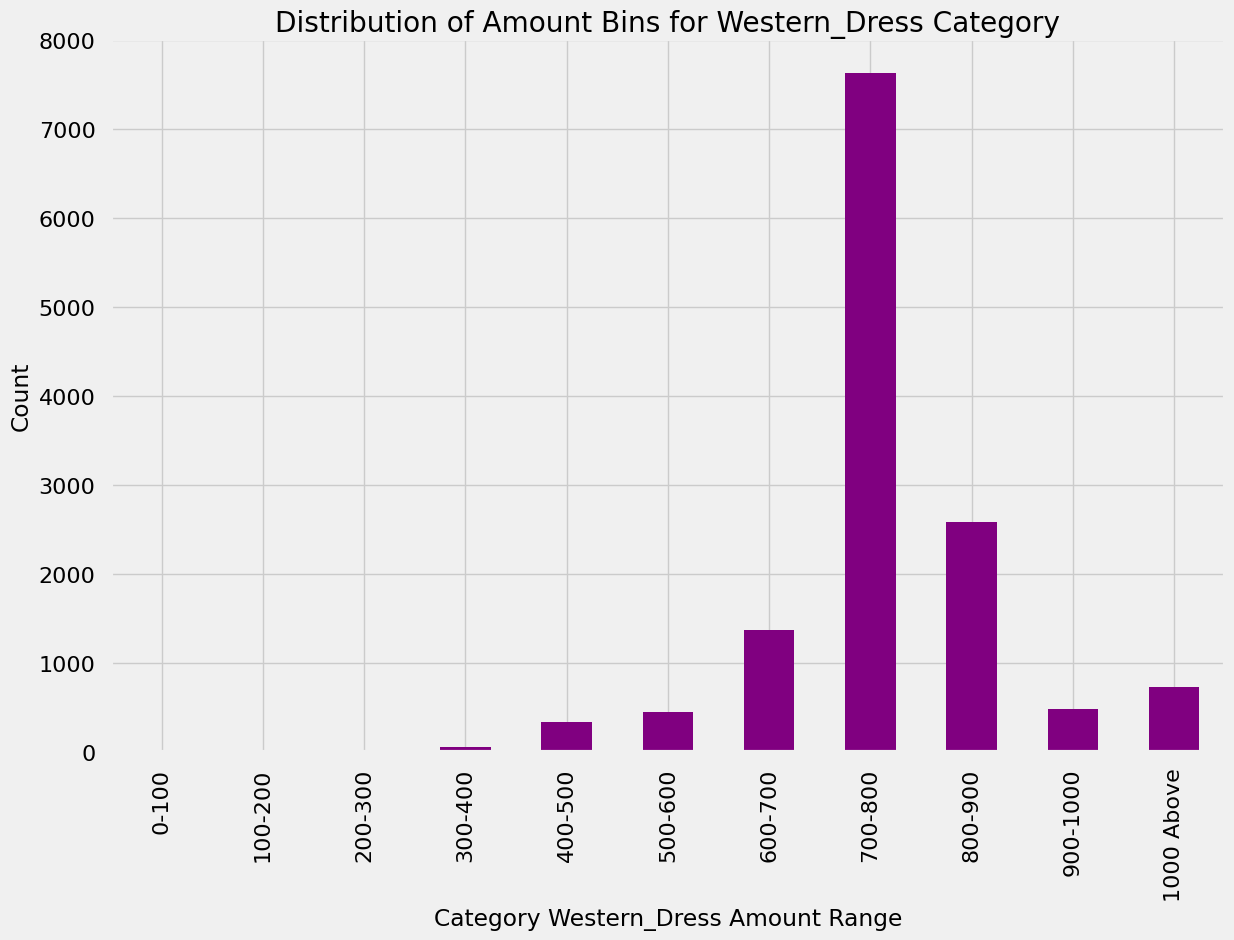

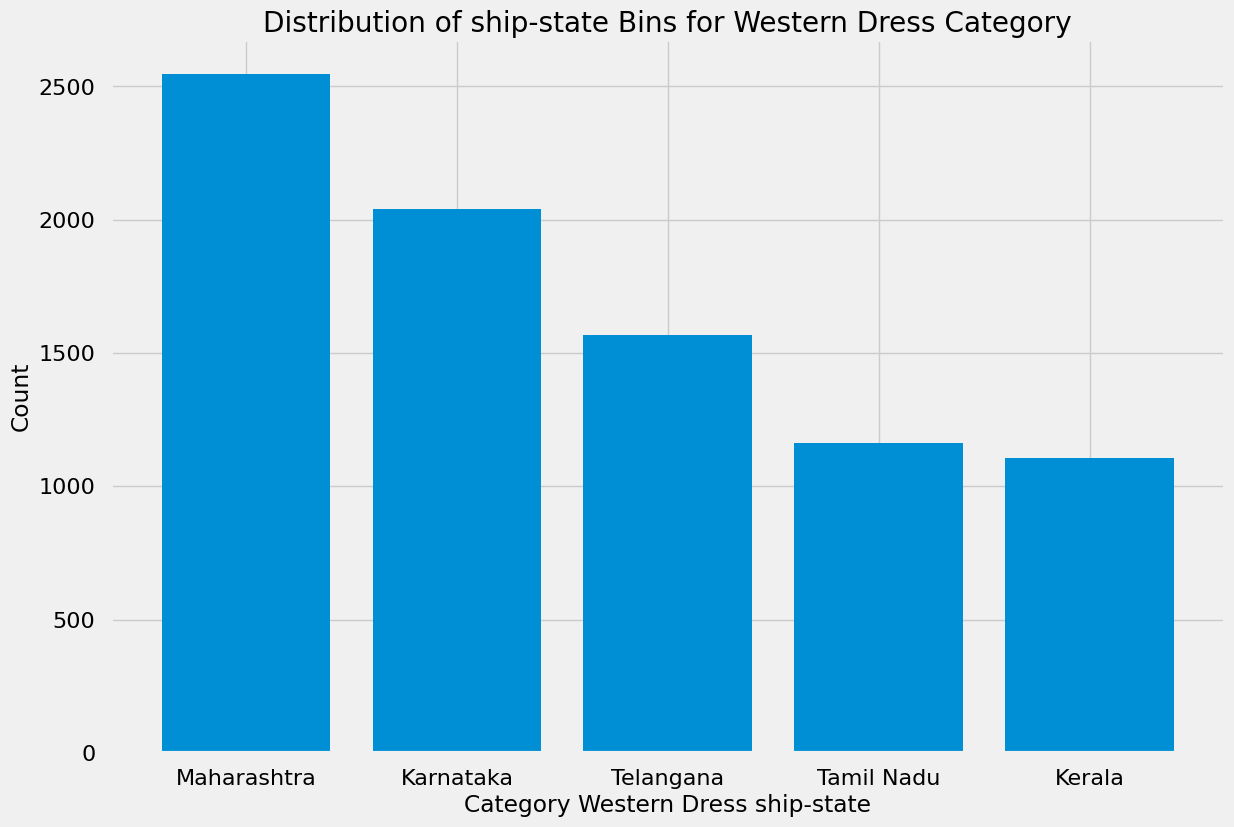

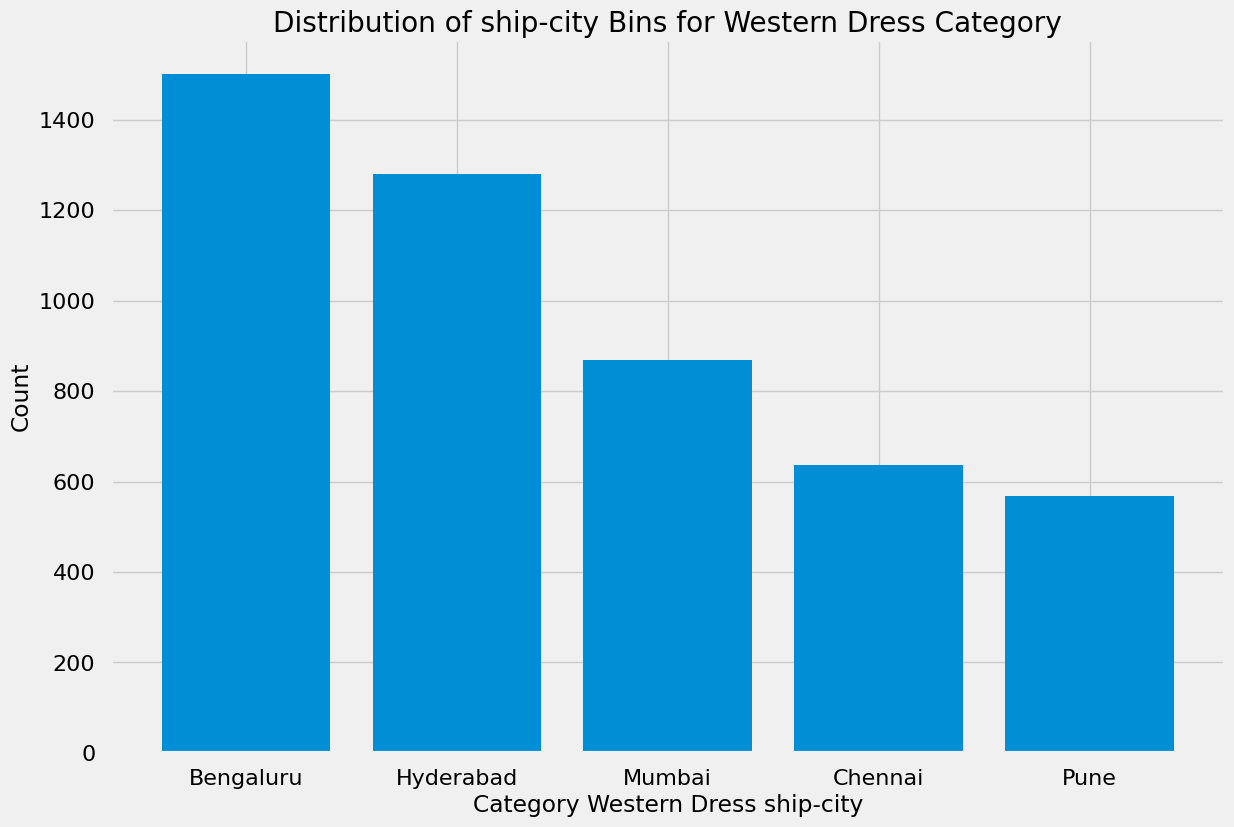

In [64]:
# Filter dataframe to include only rows where 'Category' is 'Western Dress'
df_Western_Dress = df_AmazonSR[df_AmazonSR['Category'] == 'Western Dress' ]
df_Western_Dress = df_Western_Dress[df_Western_Dress['Qty'] > 0 ]

# Creating bins for Category Amount
bins_Western_Dress = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Western_Dress = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Western_Dress['CategoryBin'] = pd.cut(df_Western_Dress['Amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Western_Dress['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Western_Dress Category')
plt.xlabel('Category Western_Dress Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Western_Dress["ship-state"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Western Dress Category')
plt.xlabel('Category Western Dress ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Western_Dress["ship-city"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Western Dress Category')
plt.xlabel('Category Western Dress ship-city')
plt.ylabel('Count')
plt.show()

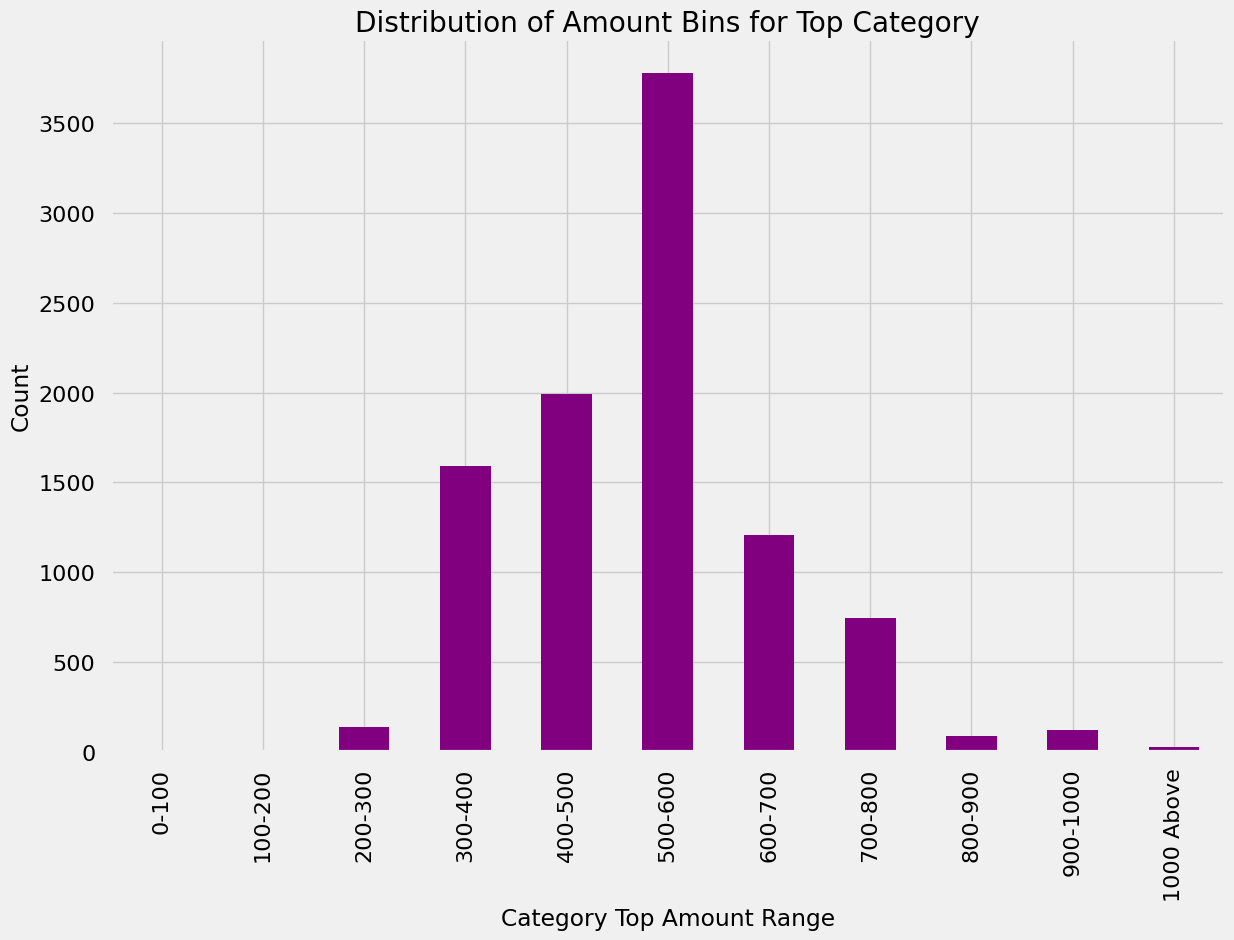

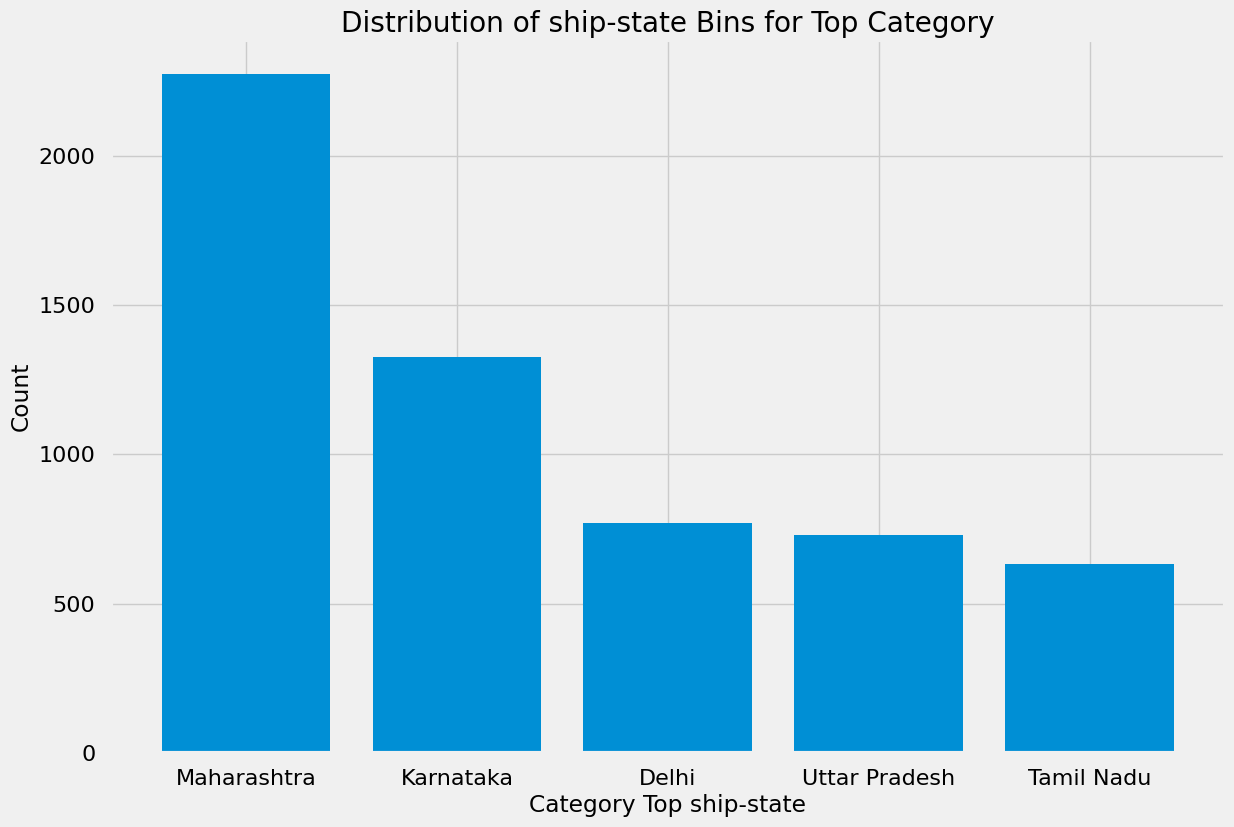

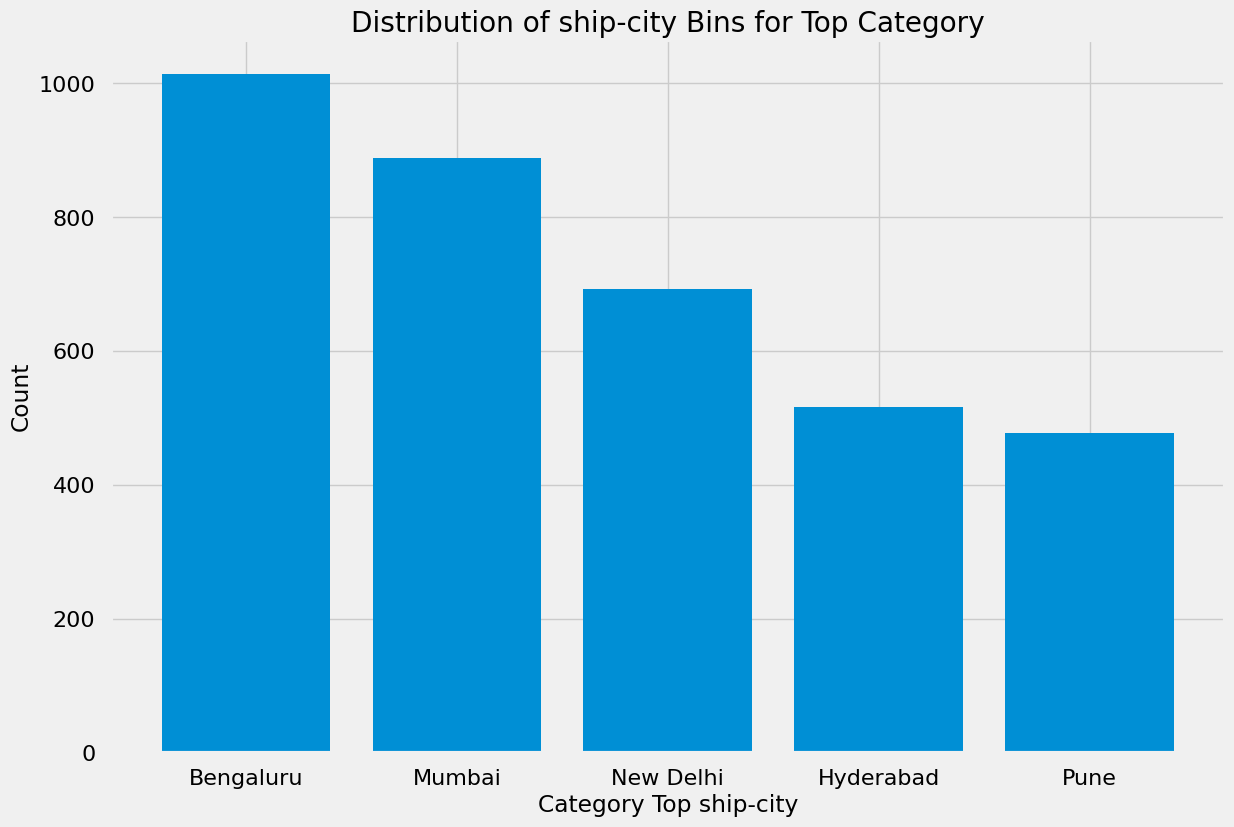

In [65]:
# Filter dataframe to include only rows where 'Category' is 'Top'
df_Top = df_AmazonSR[df_AmazonSR['Category'] == 'Top' ]
df_Top = df_Top[df_Top['Qty'] > 0 ]

# Creating bins for Category Amount
bins_Top = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Top = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Top['CategoryBin'] = pd.cut(df_Top['Amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Top['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Top Category')
plt.xlabel('Category Top Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Top["ship-state"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Top Category')
plt.xlabel('Category Top ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Top["ship-city"].value_counts().sort_values(ascending=False)

# Filter Out the Top 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Top Category')
plt.xlabel('Category Top ship-city')
plt.ylabel('Count')
plt.show()

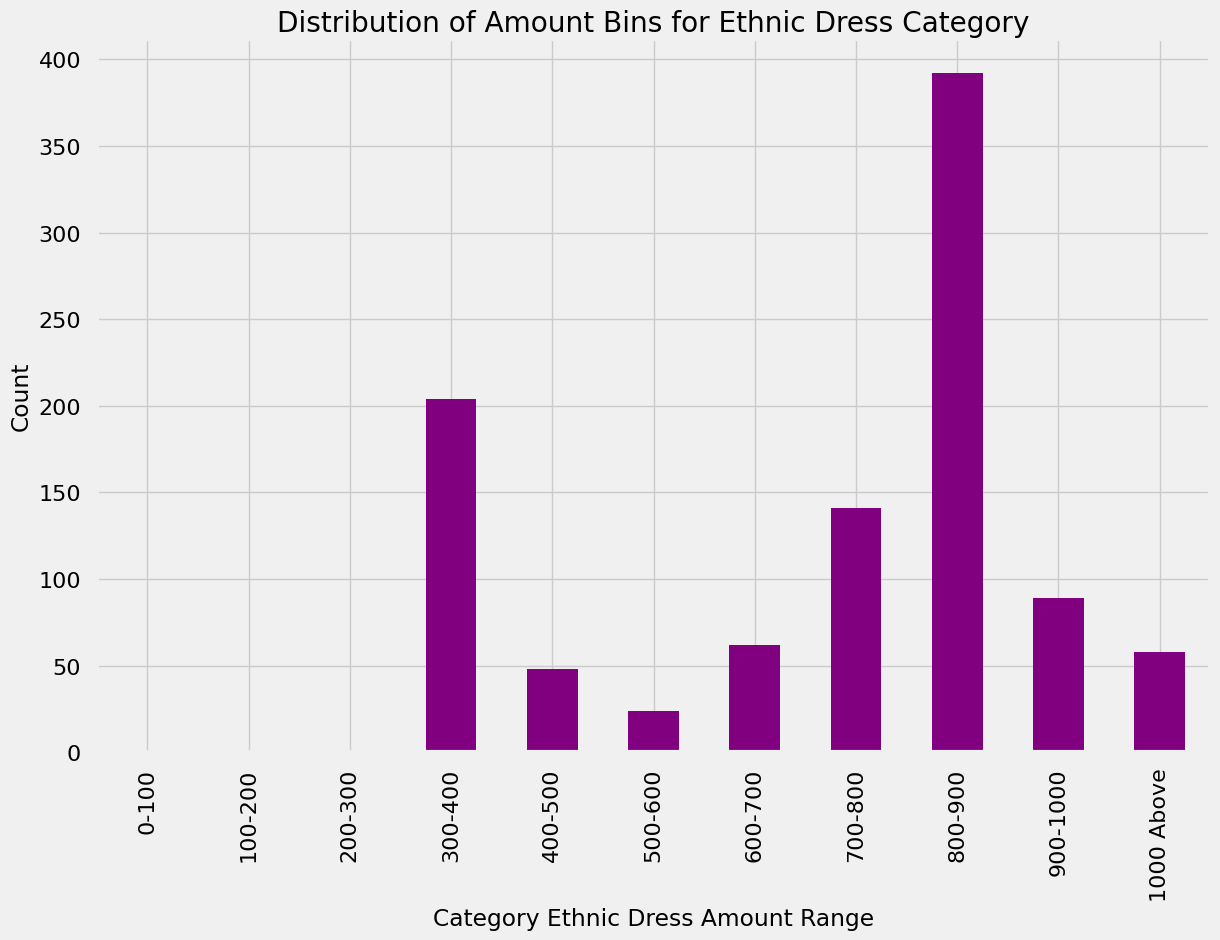

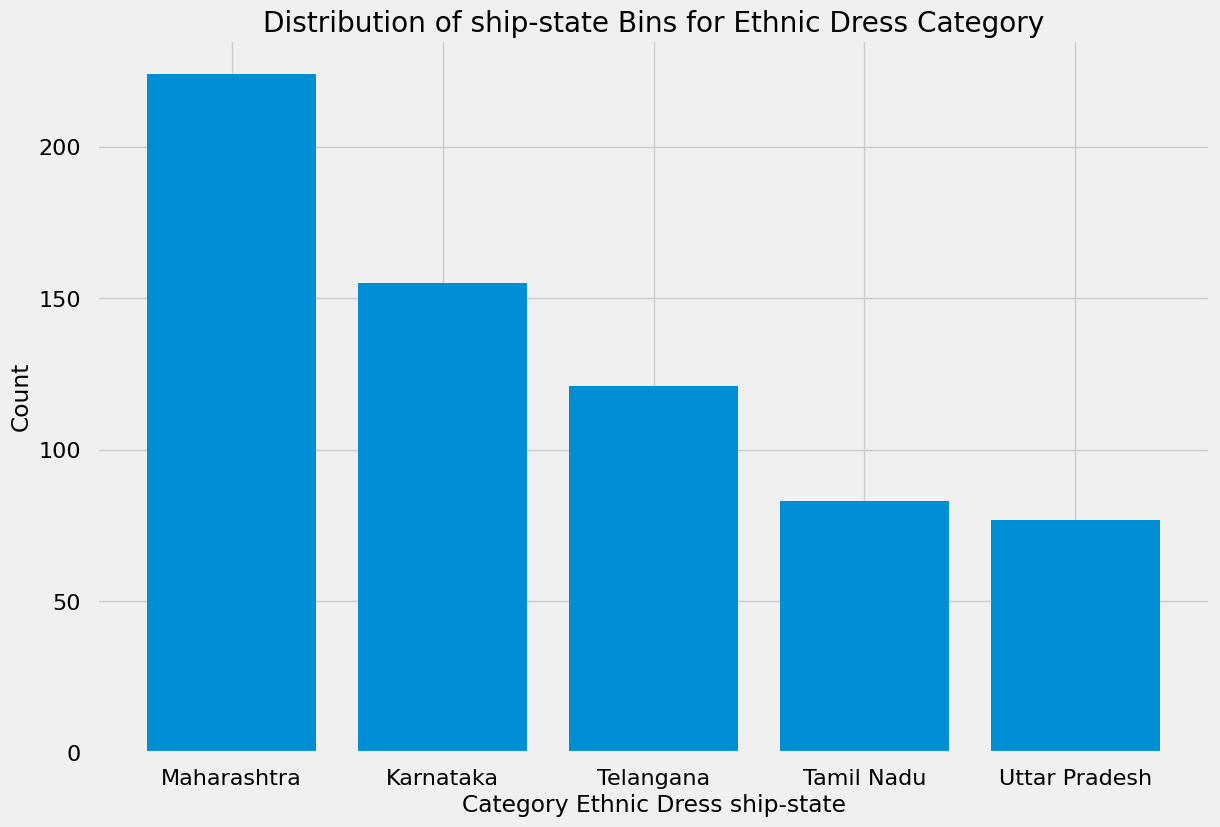

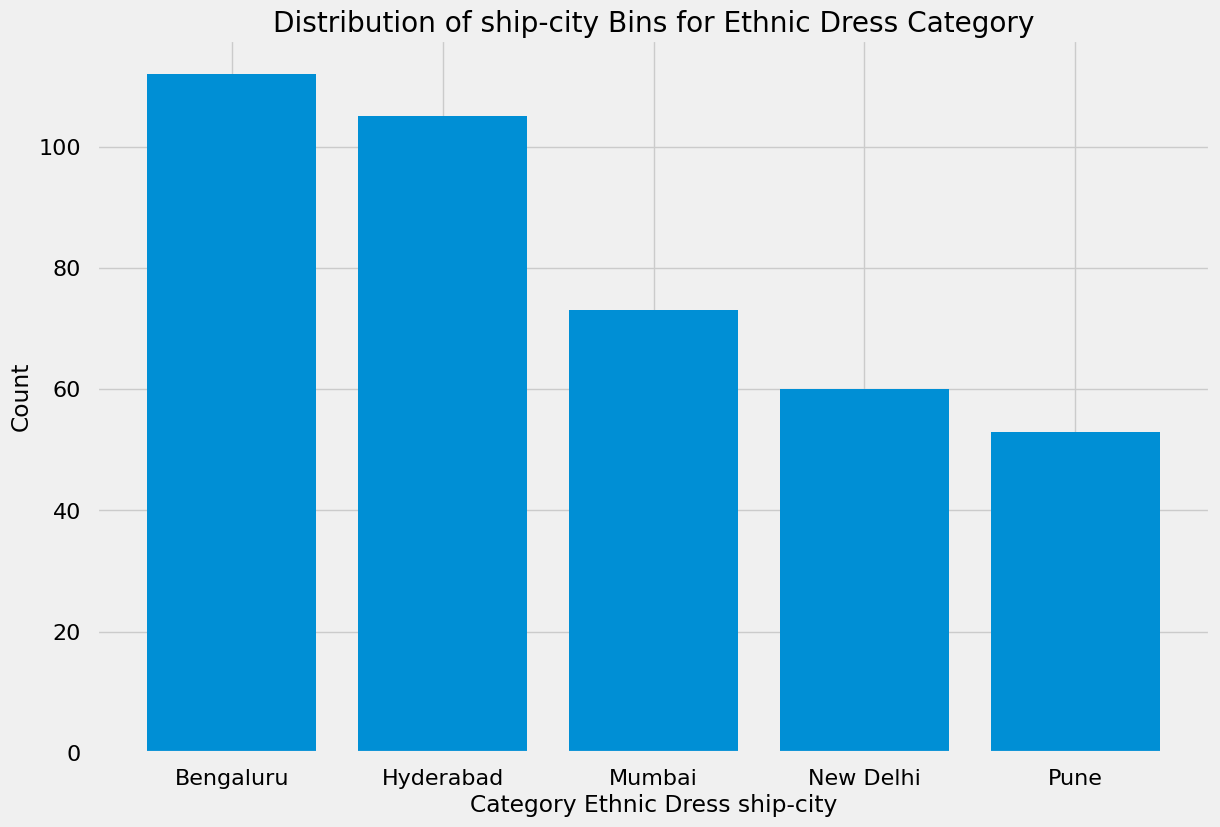

In [66]:
# Filter dataframe to include only rows where 'Category' is 'Ethnic Dress'
df_Ethnic_Dress = df_AmazonSR[df_AmazonSR['Category'] == 'Ethnic Dress' ]
df_Ethnic_Dress = df_Ethnic_Dress[df_Ethnic_Dress['Qty'] > 0 ]

# Creating bins for Category Amount
bins_Ethnic_Dress = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Ethnic_Dress = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Ethnic_Dress['CategoryBin'] = pd.cut(df_Ethnic_Dress['Amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Ethnic_Dress['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Ethnic Dress Category')
plt.xlabel('Category Ethnic Dress Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Ethnic_Dress["ship-state"].value_counts().sort_values(ascending=False)

# Filter Out the Ethnic_Dress 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Ethnic Dress Category')
plt.xlabel('Category Ethnic Dress ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Ethnic_Dress["ship-city"].value_counts().sort_values(ascending=False)

# Filter Out the Ethnic_Dress 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Ethnic Dress Category')
plt.xlabel('Category Ethnic Dress ship-city')
plt.ylabel('Count')
plt.show()

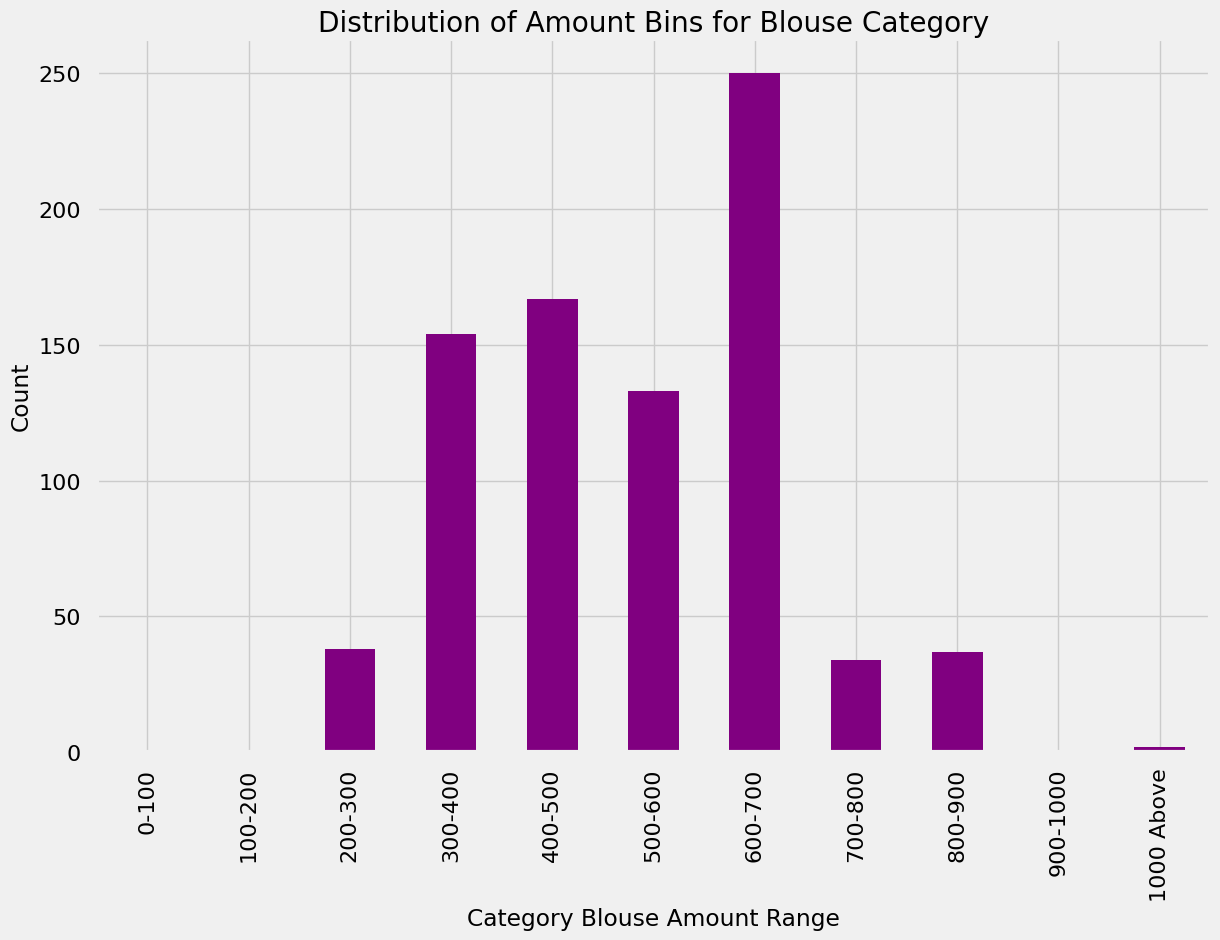

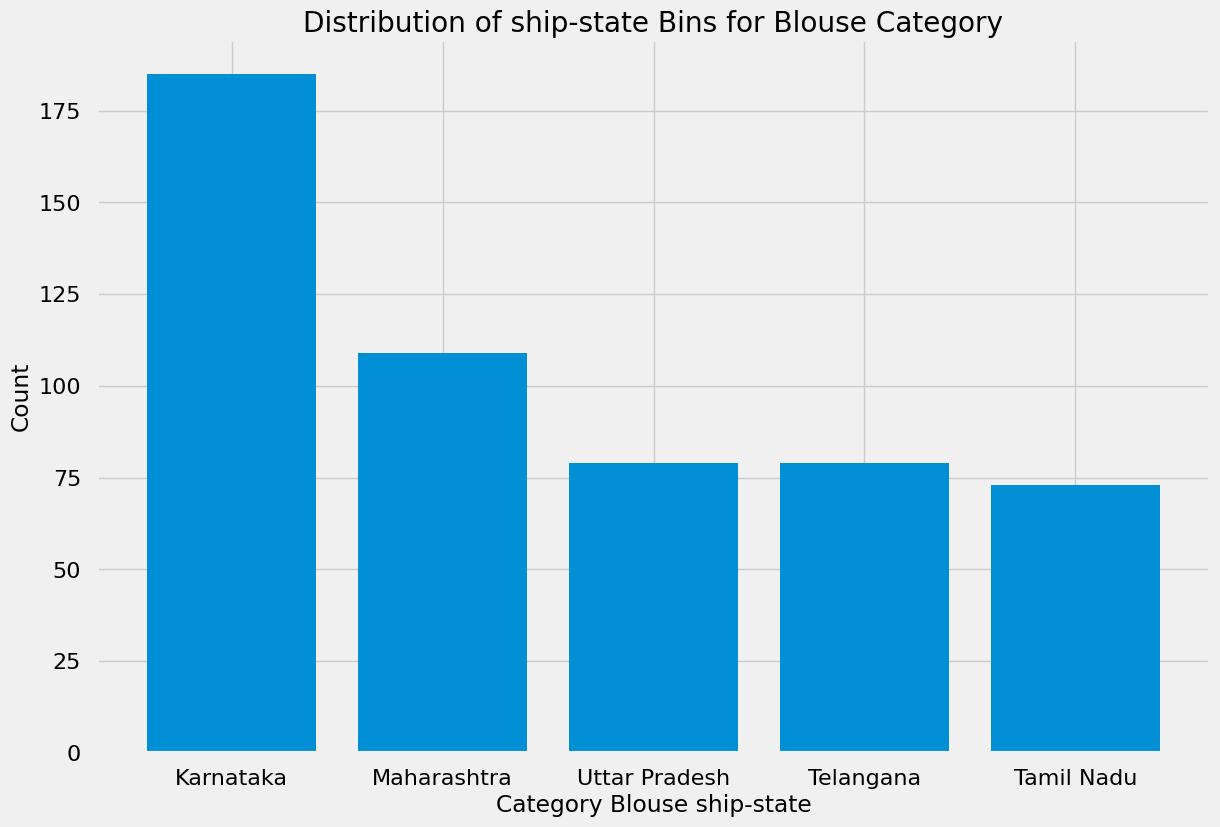

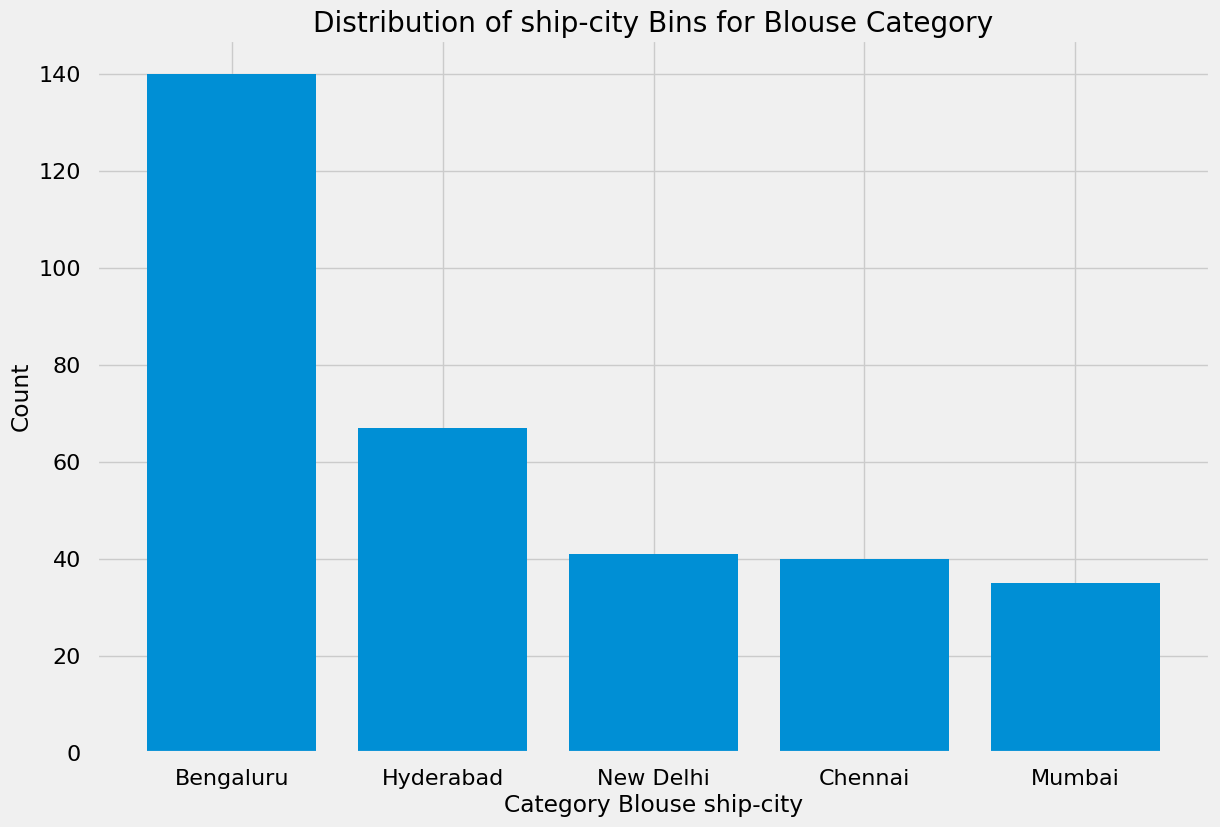

In [67]:
# Filter dataframe to include only rows where 'Category' is 'Blouse'
df_Blouse = df_AmazonSR[df_AmazonSR['Category'] == 'Blouse' ]
df_Blouse = df_Blouse[df_Blouse['Qty'] > 0 ]

# Creating bins for Category Amount
bins_Blouse = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Blouse = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Blouse['CategoryBin'] = pd.cut(df_Blouse['Amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Blouse['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Blouse Category')
plt.xlabel('Category Blouse Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Blouse["ship-state"].value_counts().sort_values(ascending=False)

# Filter Out the Blouse 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Blouse Category')
plt.xlabel('Category Blouse ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Blouse["ship-city"].value_counts().sort_values(ascending=False)

# Filter Out the Blouse 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Blouse Category')
plt.xlabel('Category Blouse ship-city')
plt.ylabel('Count')
plt.show()

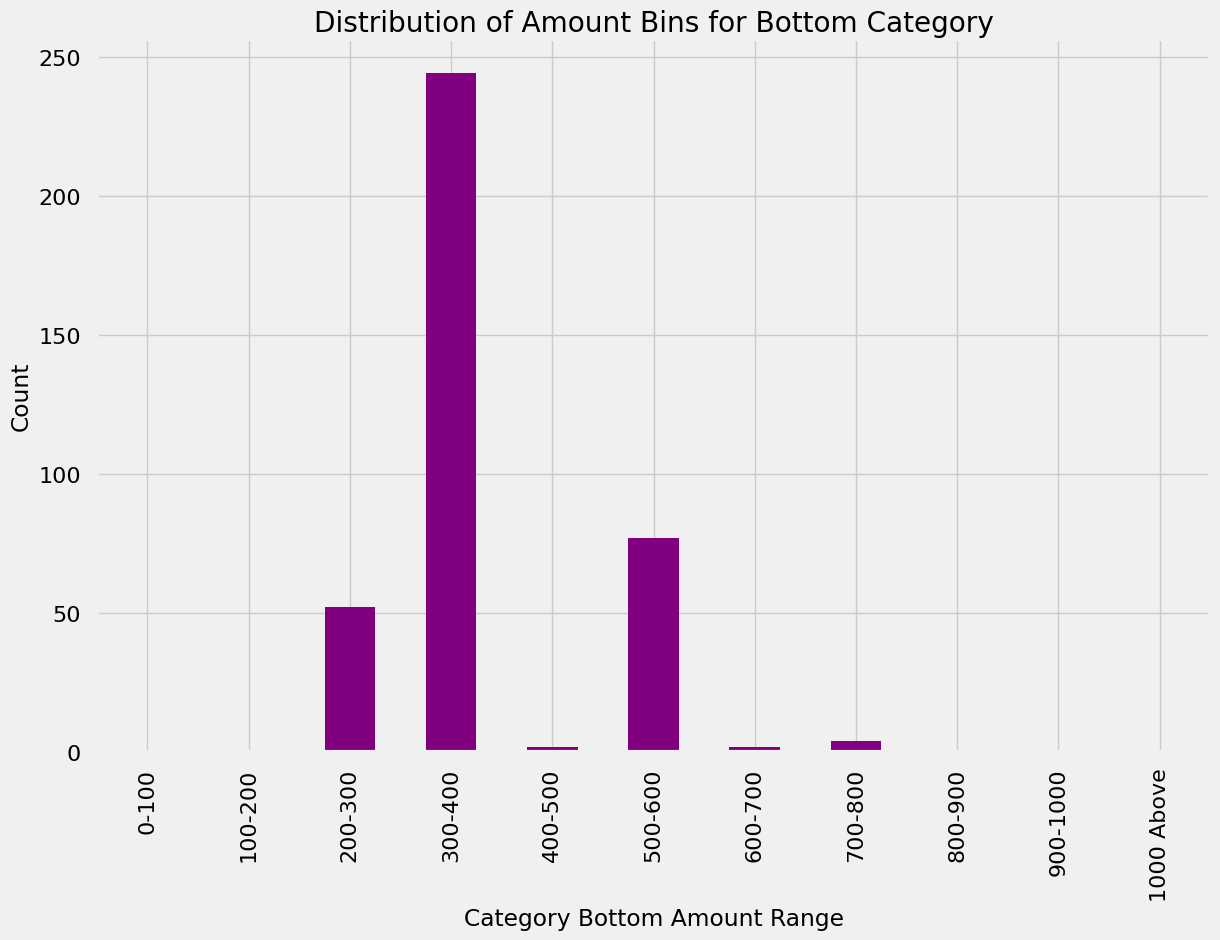

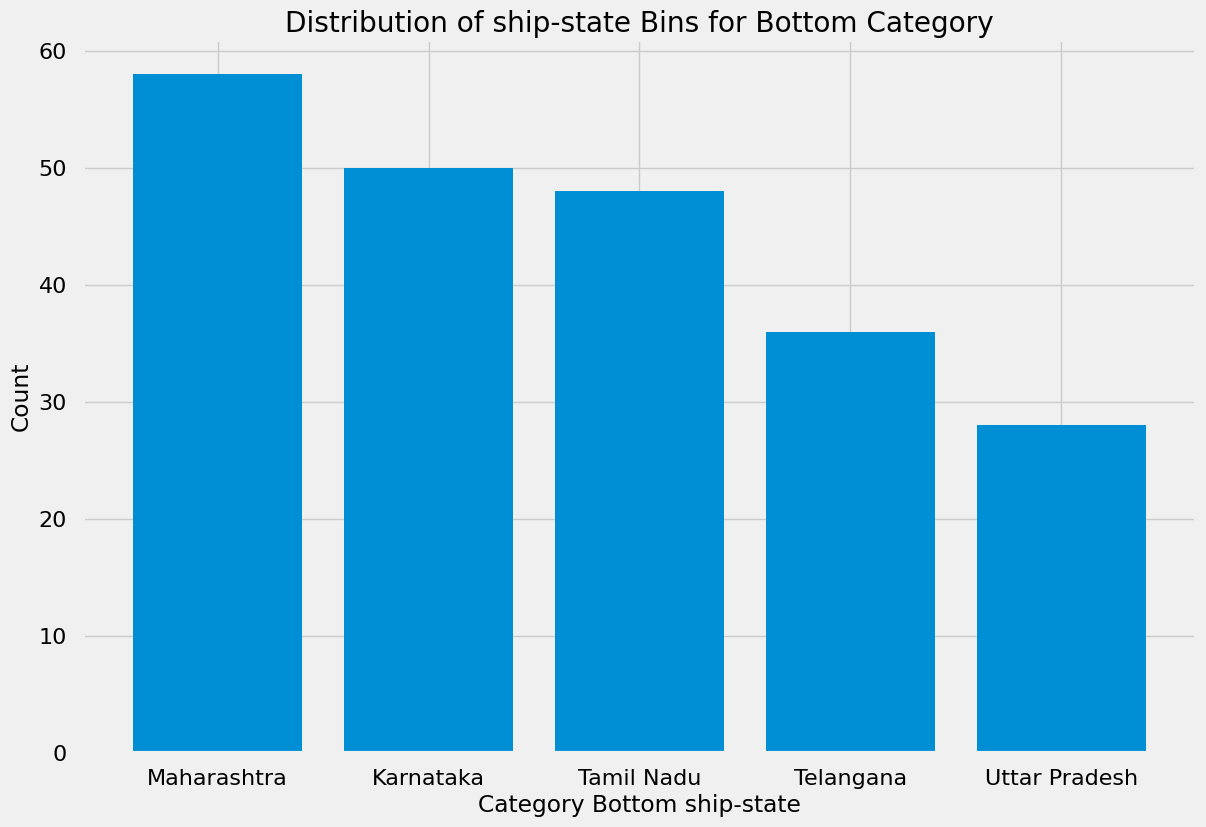

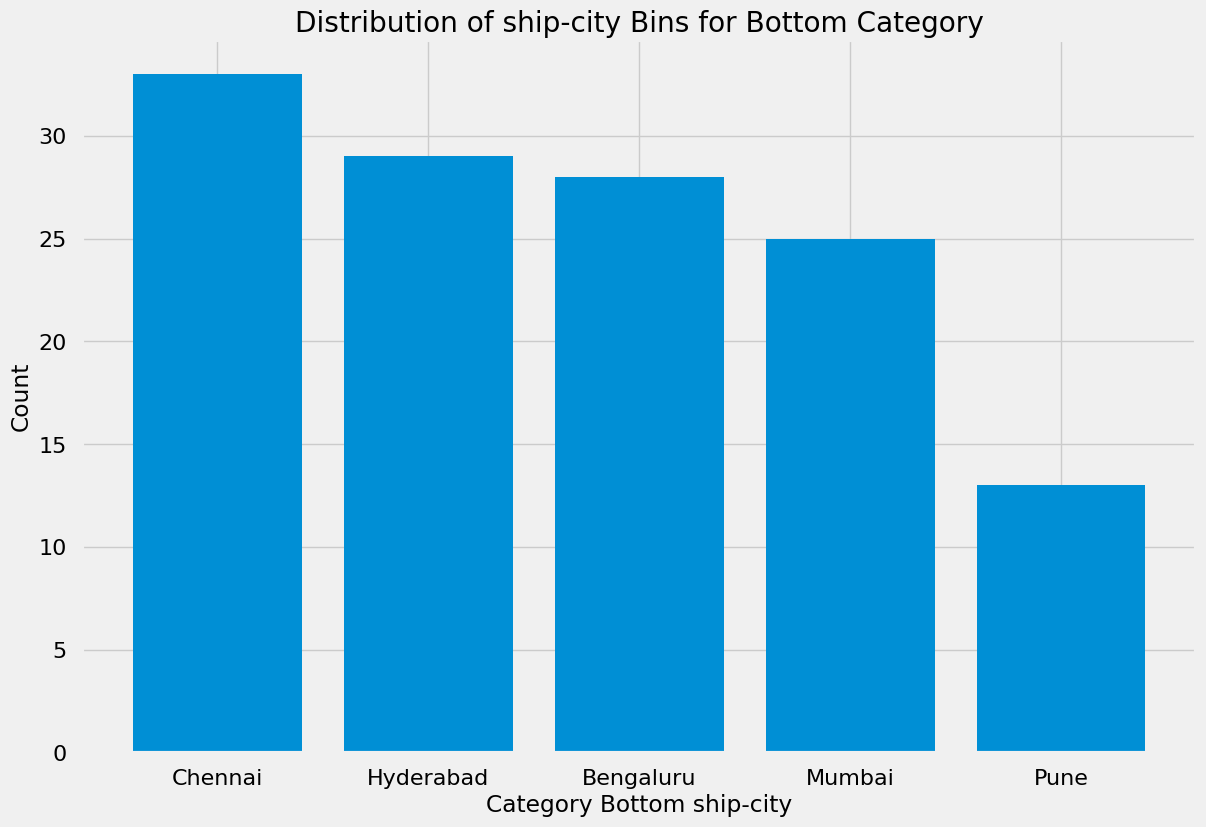

In [68]:
# Filter dataframe to include only rows where 'Category' is 'Bottom'
df_Bottom = df_AmazonSR[df_AmazonSR['Category'] == 'Bottom' ]
df_Bottom = df_Bottom[df_Bottom['Qty'] > 0 ]

# Creating bins for Category Amount
bins_Bottom = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Bottom = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Bottom['CategoryBin'] = pd.cut(df_Bottom['Amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Bottom['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Bottom Category')
plt.xlabel('Category Bottom Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Bottom["ship-state"].value_counts().sort_values(ascending=False)

# Filter Out the Bottom 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Bottom Category')
plt.xlabel('Category Bottom ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Bottom["ship-city"].value_counts().sort_values(ascending=False)

# Filter Out the Bottom 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Bottom Category')
plt.xlabel('Category Bottom ship-city')
plt.ylabel('Count')
plt.show()

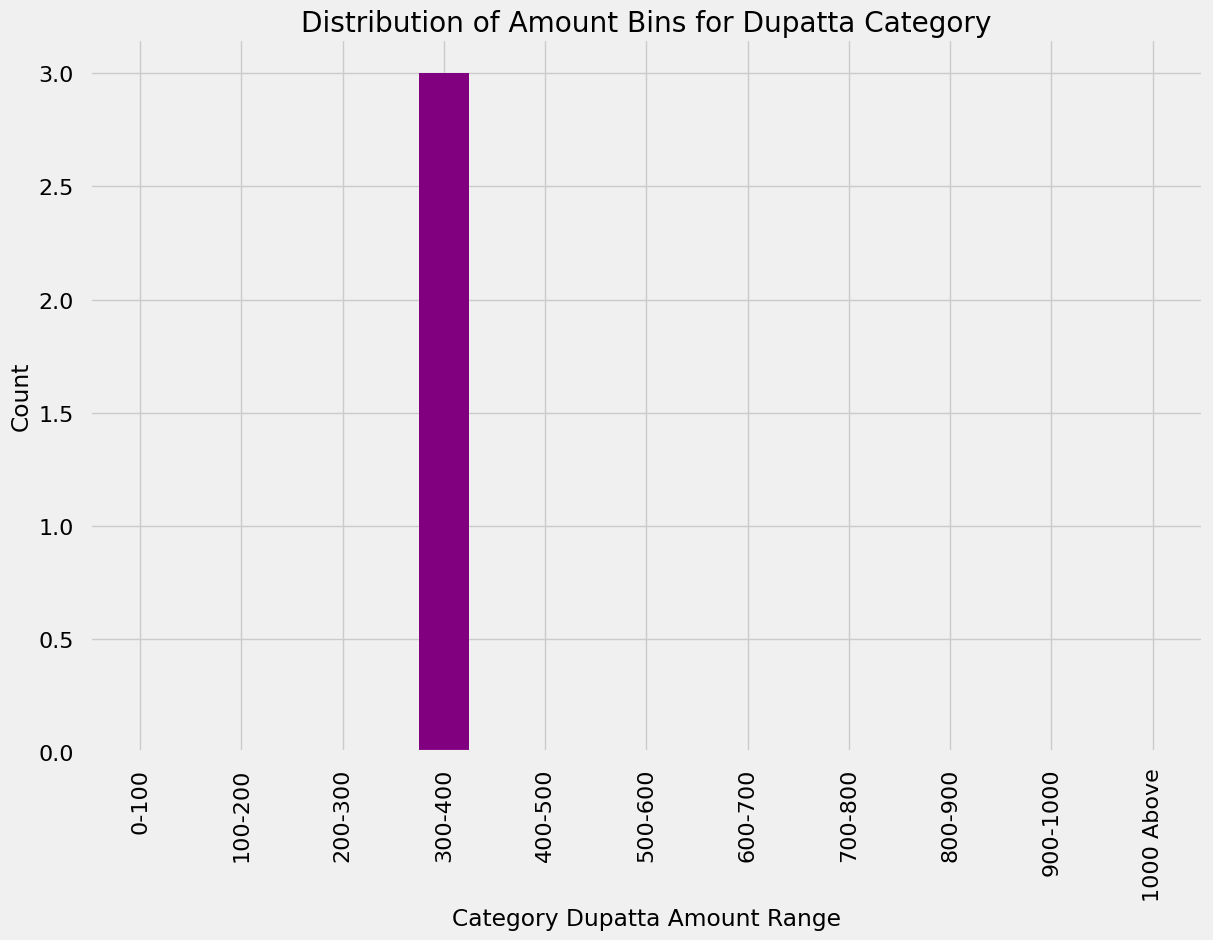

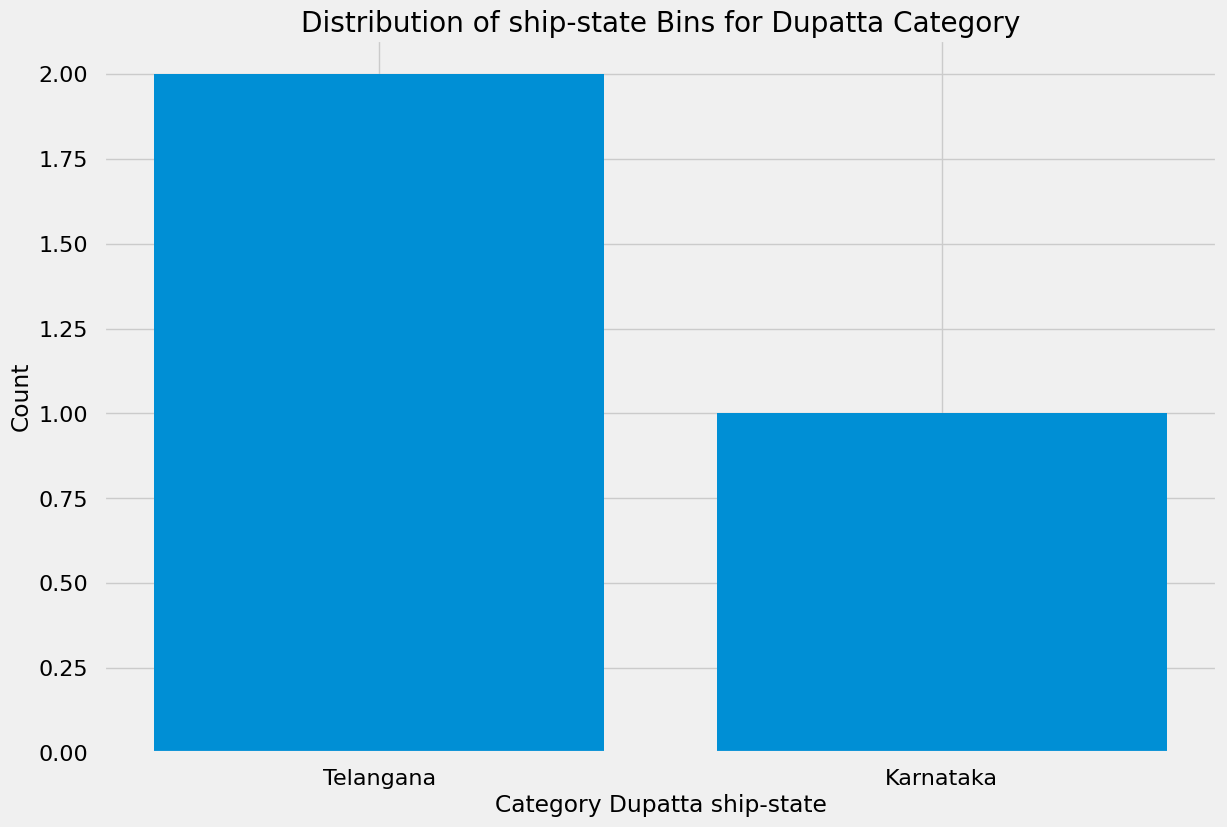

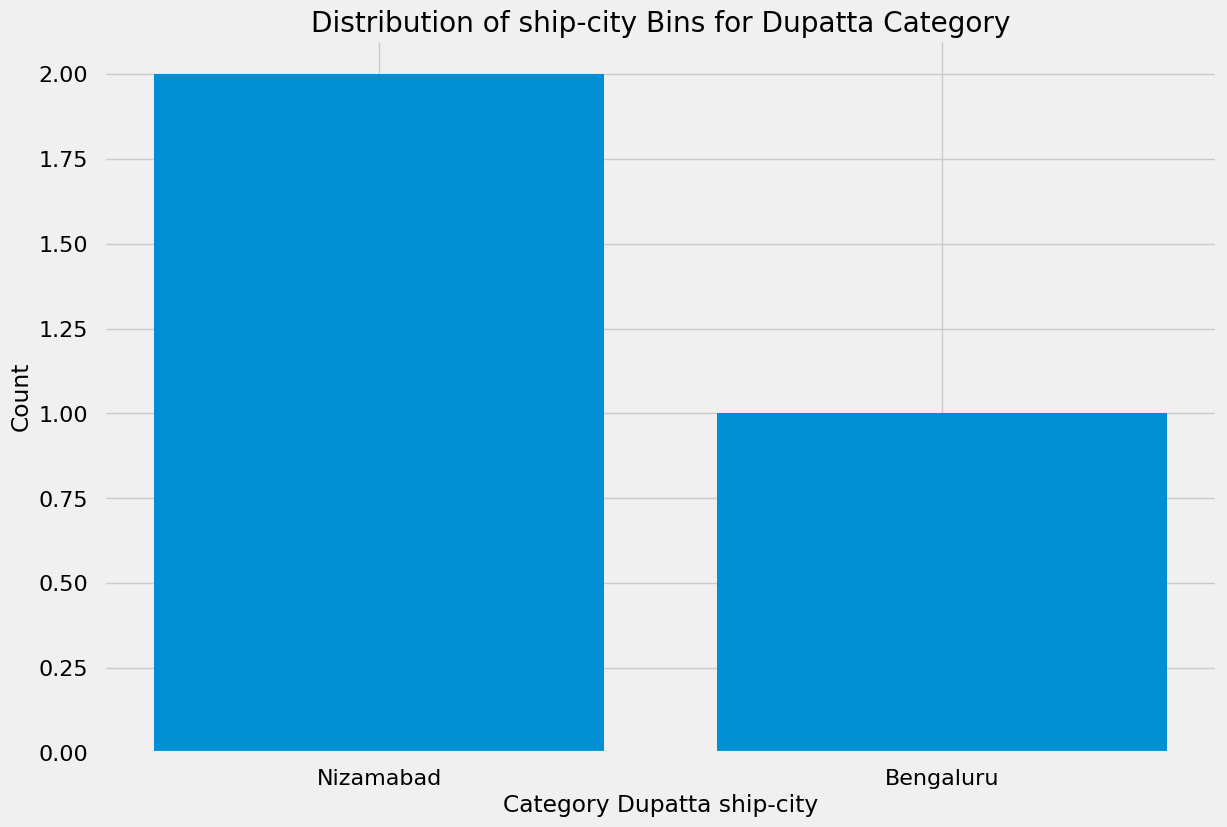

In [69]:
# Filter dataframe to include only rows where 'Category' is 'Dupatta'
df_Dupatta = df_AmazonSR[df_AmazonSR['Category'] == 'Dupatta' ]
df_Dupatta = df_Dupatta[df_Dupatta['Qty'] > 0 ]

# Creating bins for Category Amount
bins_Dupatta = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
slot_Dupatta = ['0-100','100-200', '200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000', '1000 Above']

df_Dupatta['CategoryBin'] = pd.cut(df_Dupatta['Amount'], bins=bins, labels=slot)

# Create histogram of 'AmountBin' column for filtered dataframe

df_Dupatta['CategoryBin'].value_counts().sort_index().plot(kind='bar', color='purple')

plt.title('Distribution of Amount Bins for Dupatta Category')
plt.xlabel('Category Dupatta Amount Range')
plt.ylabel('Count')
plt.show()

# Create Histogram of 'ship-state' Column for Filtered Dataframe
state_counts = df_Dupatta["ship-state"].value_counts().sort_values(ascending=False)

# Filter Out the Dupatta 5 Larger ship-states
state_counts = state_counts.nlargest(5)

plt.bar(state_counts.index, state_counts.values)

plt.title('Distribution of ship-state Bins for Dupatta Category')
plt.xlabel('Category Dupatta ship-state')
plt.ylabel('Count')
plt.show()


# Create Histogram of 'ship-city' Column for Filtered Dataframe
city_counts = df_Dupatta["ship-city"].value_counts().sort_values(ascending=False)

# Filter Out the Dupatta 5 Larger ship-city
city_counts = city_counts.nlargest(5)

plt.bar(city_counts.index, city_counts.values)
plt.title('Distribution of ship-city Bins for Dupatta Category')
plt.xlabel('Category Dupatta ship-city')
plt.ylabel('Count')
plt.show()

In [70]:
# Filter rows with Qty>0
df = df_AmazonSR[df_AmazonSR['Qty'] > 0]

# Calculate Qty*Amount
df['Qty*Amount'] = df['Qty'] * df['Amount']

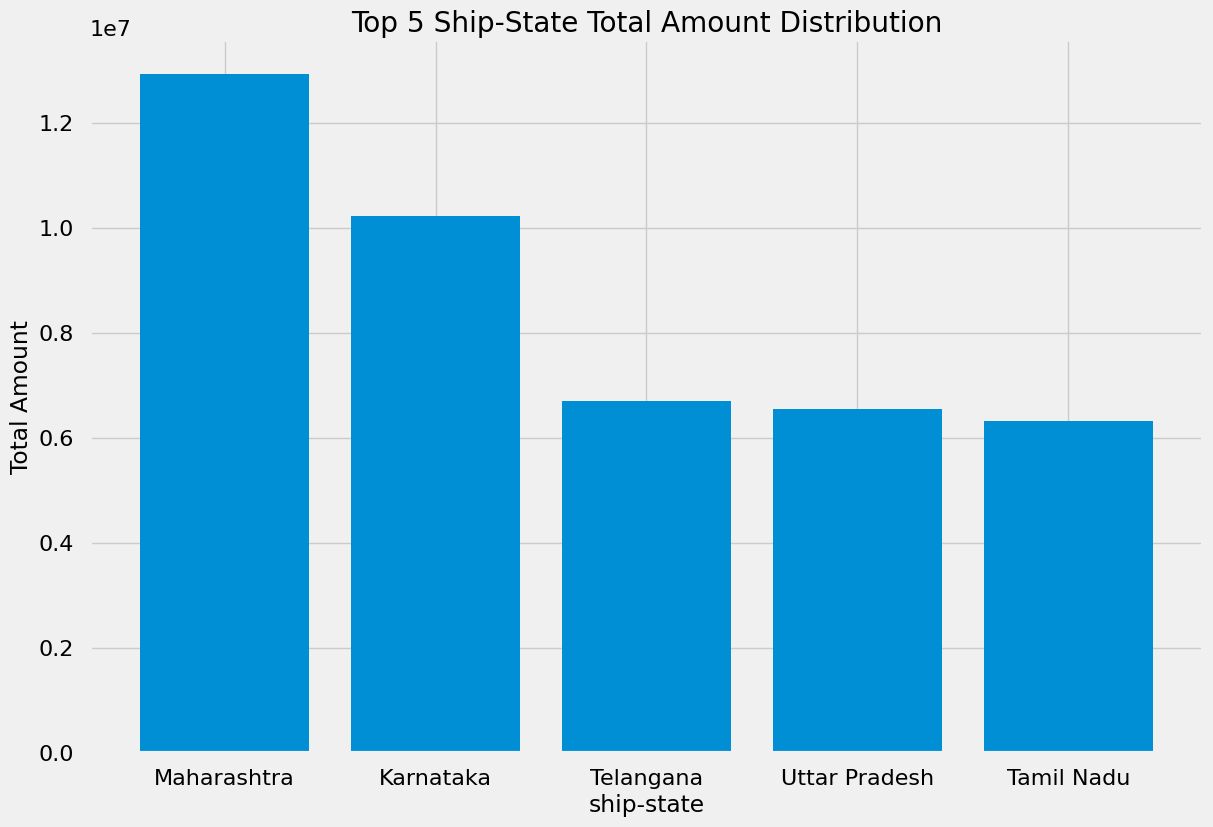

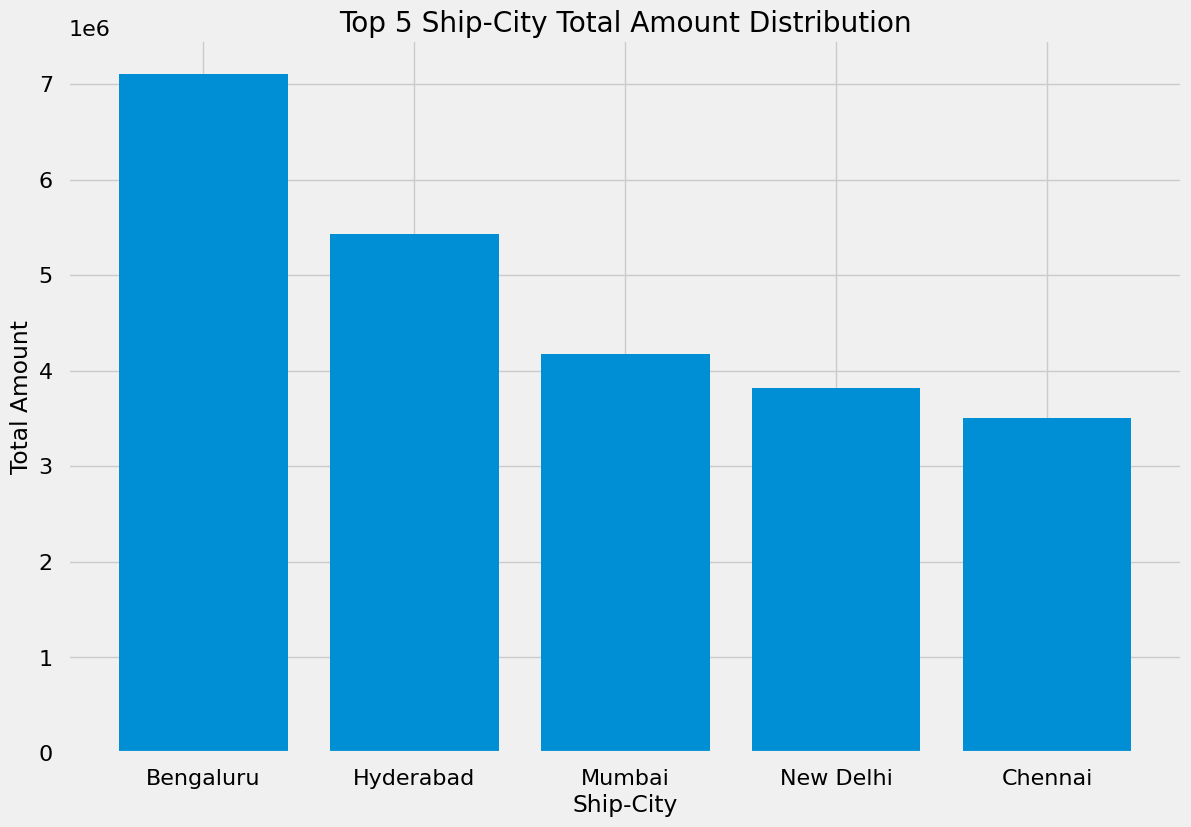

In [71]:
# Calculate the Total Sales of Different ship-state Total Amount
state_total_amount = df.groupby('ship-state')['Qty*Amount'].sum()

# Filter Out the Top 5 Larger ship-states by Total Amount
states_total_amount = state_total_amount.nlargest(5)

# Draw the Histogram of the First 5 larger Ship-States and Total Amount
plt.bar(states_total_amount.index, states_total_amount.values)
plt.title('Top 5 Ship-State Total Amount Distribution')
plt.xlabel('ship-state')
plt.ylabel('Total Amount')
plt.show()

# Calculate the Total Sales of Different ship-city Total Amount
city_total_amount = df.groupby('ship-city')['Qty*Amount'].sum()

# Filter Out the Top 5 Larger ship-city by Total Amount
cities_total_amount = city_total_amount.nlargest(5)

# Draw the Histogram of the Top 5 Larger ship-city and Total Amount
plt.bar(cities_total_amount.index, cities_total_amount.values)
plt.title('Top 5 Ship-City Total Amount Distribution')
plt.xlabel('Ship-City')
plt.ylabel('Total Amount')
plt.show()

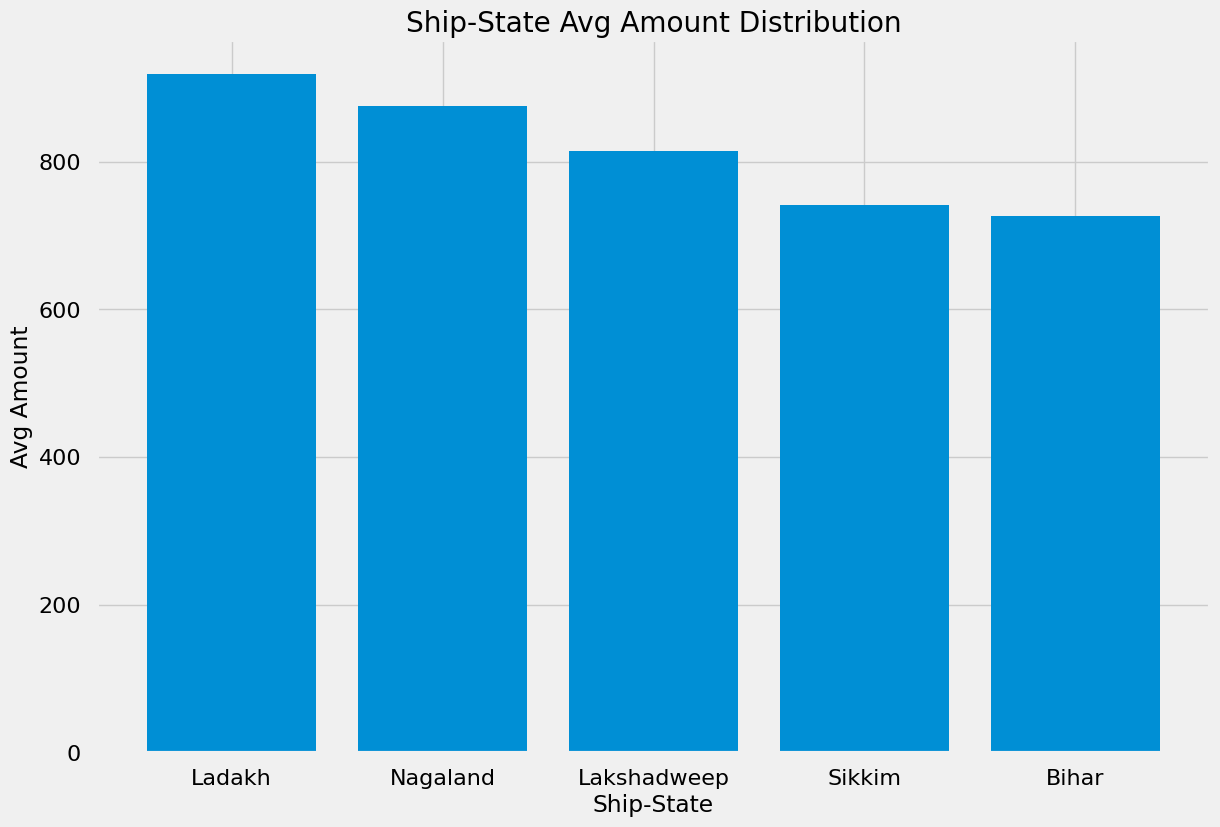

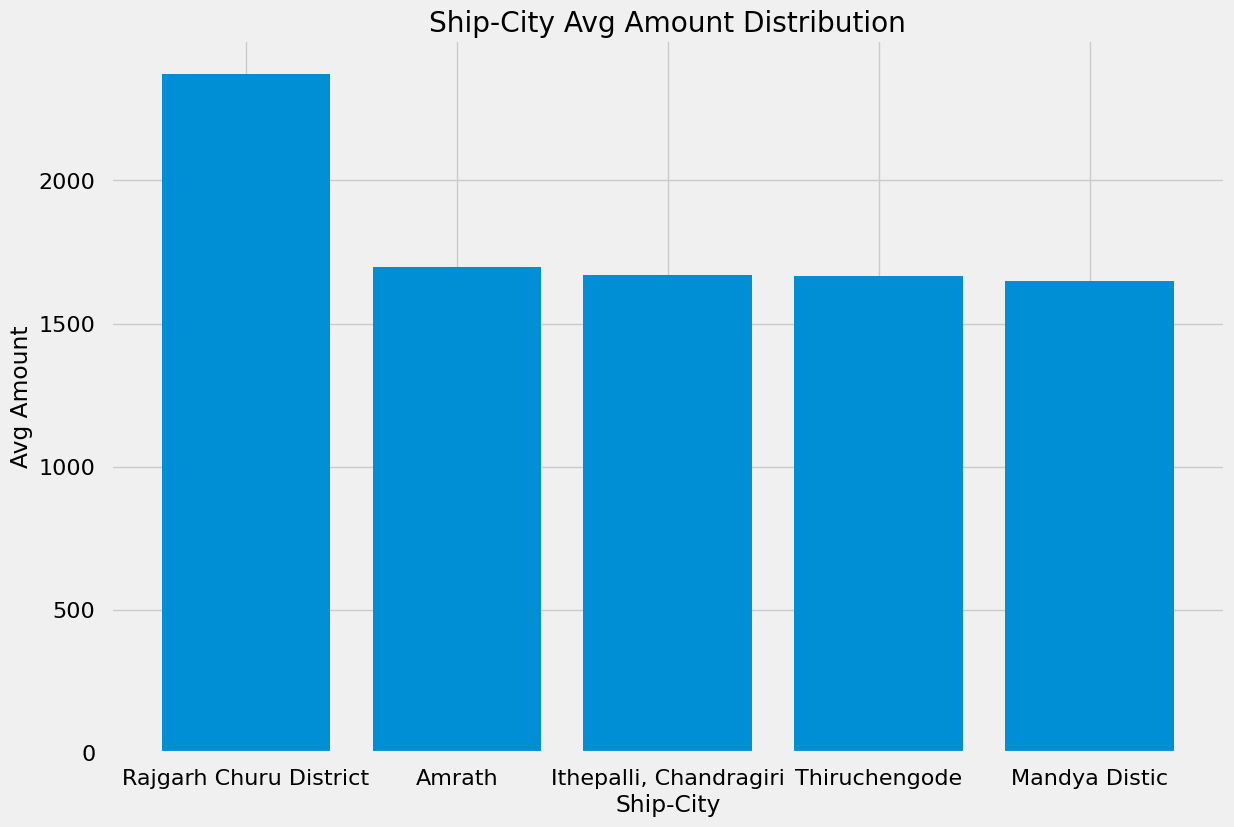

In [72]:
# Calculate the Total Sales Total Amount and Sales Quantity Total Qty of Different ship-states
state_total_amount = df.groupby('ship-state')['Qty*Amount'].sum()
state_total_qty = df.groupby('ship-state')['Qty'].sum()

# Calculate the Average Sales Avg Amount of Different ship-states
state_avg_amount = state_total_amount / state_total_qty

# Filter Out the Top 5 Larger ship-city by Total Amount
states_avg_amount = state_avg_amount.nlargest(5)

# Draw the Histogram of ship-state and Avg Amount
plt.bar(states_avg_amount.index, states_avg_amount.values)
plt.title('Ship-State Avg Amount Distribution')
plt.xlabel('Ship-State')
plt.ylabel('Avg Amount')
plt.show()

# Calculate the Total Sales Total Amount and Sales Quantity Total Qty of Different ship-city
city_total_amount = df.groupby('ship-city')['Qty*Amount'].sum()
city_total_qty = df.groupby('ship-city')['Qty'].sum()

# Calculate the Average Sales Avg Amount of Different ship-city
city_avg_amount = city_total_amount / city_total_qty

# Filter Out the Top 5 Larger ship-city by Total Amount
cities_avg_amount = city_avg_amount.nlargest(5)

# Draw the Histogram of ship-city and Avg Amount
plt.bar(cities_avg_amount.index, cities_avg_amount.values)
plt.title('Ship-City Avg Amount Distribution')
plt.xlabel('Ship-City')
plt.ylabel('Avg Amount')
plt.show()

<font color=Blue size=5>Analysis 3: International Sale Report Analysis</font>

In [74]:
# Step 1: Read File International sale Report
df_InternationalSR = pd.read_csv('/content/International sale Report.csv')

In [75]:
df_InternationalSR.head()

index      DATE  Months            CUSTOMER    Style             SKU Size   PCS    RATE GROSS AMT
0      0  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5004    MEN5004-KR-L    L  1.00  616.56    617.00
1      1  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5004   MEN5004-KR-XL   XL  1.00  616.56    617.00
2      2  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5004  MEN5004-KR-XXL  XXL  1.00  616.56    617.00
3      3  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5009    MEN5009-KR-L    L  1.00  616.56    617.00
4      4  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5011    MEN5011-KR-L    L  1.00  616.56    617.00

In [76]:
# Check Database Dimension
print("Database dimension - df_InternationalSR        :",df_InternationalSR.shape)

# Check Database Size
print("Database size - df_InternationalSR             :",df_InternationalSR.size)

Database dimension - df_InternationalSR        : (37432, 10)
Database size - df_InternationalSR             : 374320


In [77]:
# Database Column Types
# When verbose=True, the method prints out detailed information about each column in the DataFrame, including column name, number of non-null values, and data type.
# If verbose=False or the verbose parameter is not specified, only the overall information of the DataFrame will be printed.
df_InternationalSR.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      37432 non-null  int64 
 1   DATE       37431 non-null  object
 2   Months     37407 non-null  object
 3   CUSTOMER   36392 non-null  object
 4   Style      36392 non-null  object
 5   SKU        34958 non-null  object
 6   Size       36392 non-null  object
 7   PCS        36392 non-null  object
 8   RATE       36392 non-null  object
 9   GROSS AMT  36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [78]:
# Checking the numeric variables of the dataframes
df_InternationalSR.describe()

index
count  37432.000000
mean   18715.500000
std    10805.831975
min        0.000000
25%     9357.750000
50%    18715.500000
75%    28073.250000
max    37431.000000

In [79]:
# Step 2: Data Cleaning & Manipulation

In [80]:
# Data Cleaning & Manipulation for file Amazon Sale Report
df_AmazonSR = pd.read_csv('/content/Amazon_Sale_Report.csv')

<Axes: >

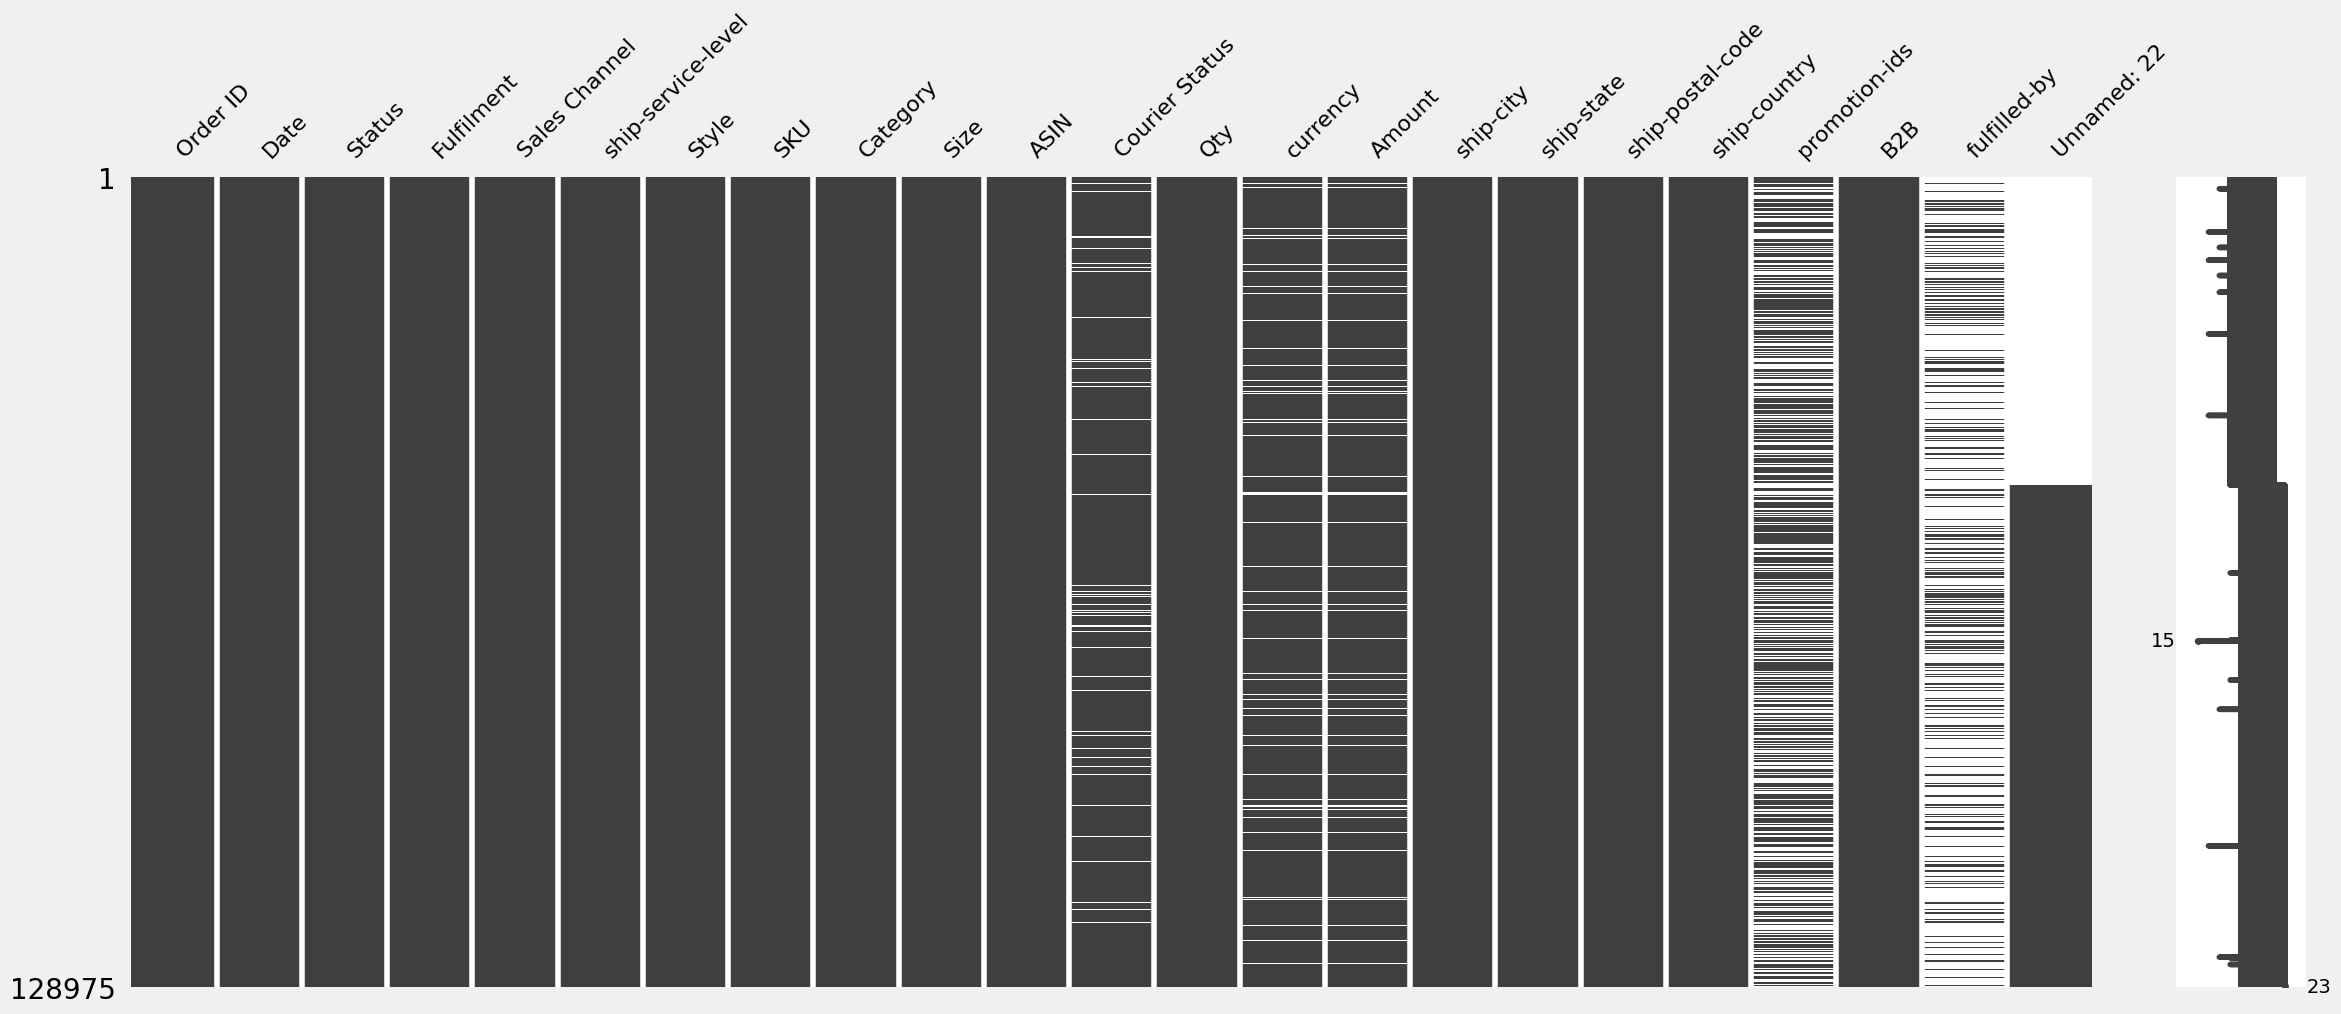

In [81]:
import missingno as msno
df_AmazonSR.set_index('index', inplace = True)
msno.matrix(df_AmazonSR)

<Axes: >

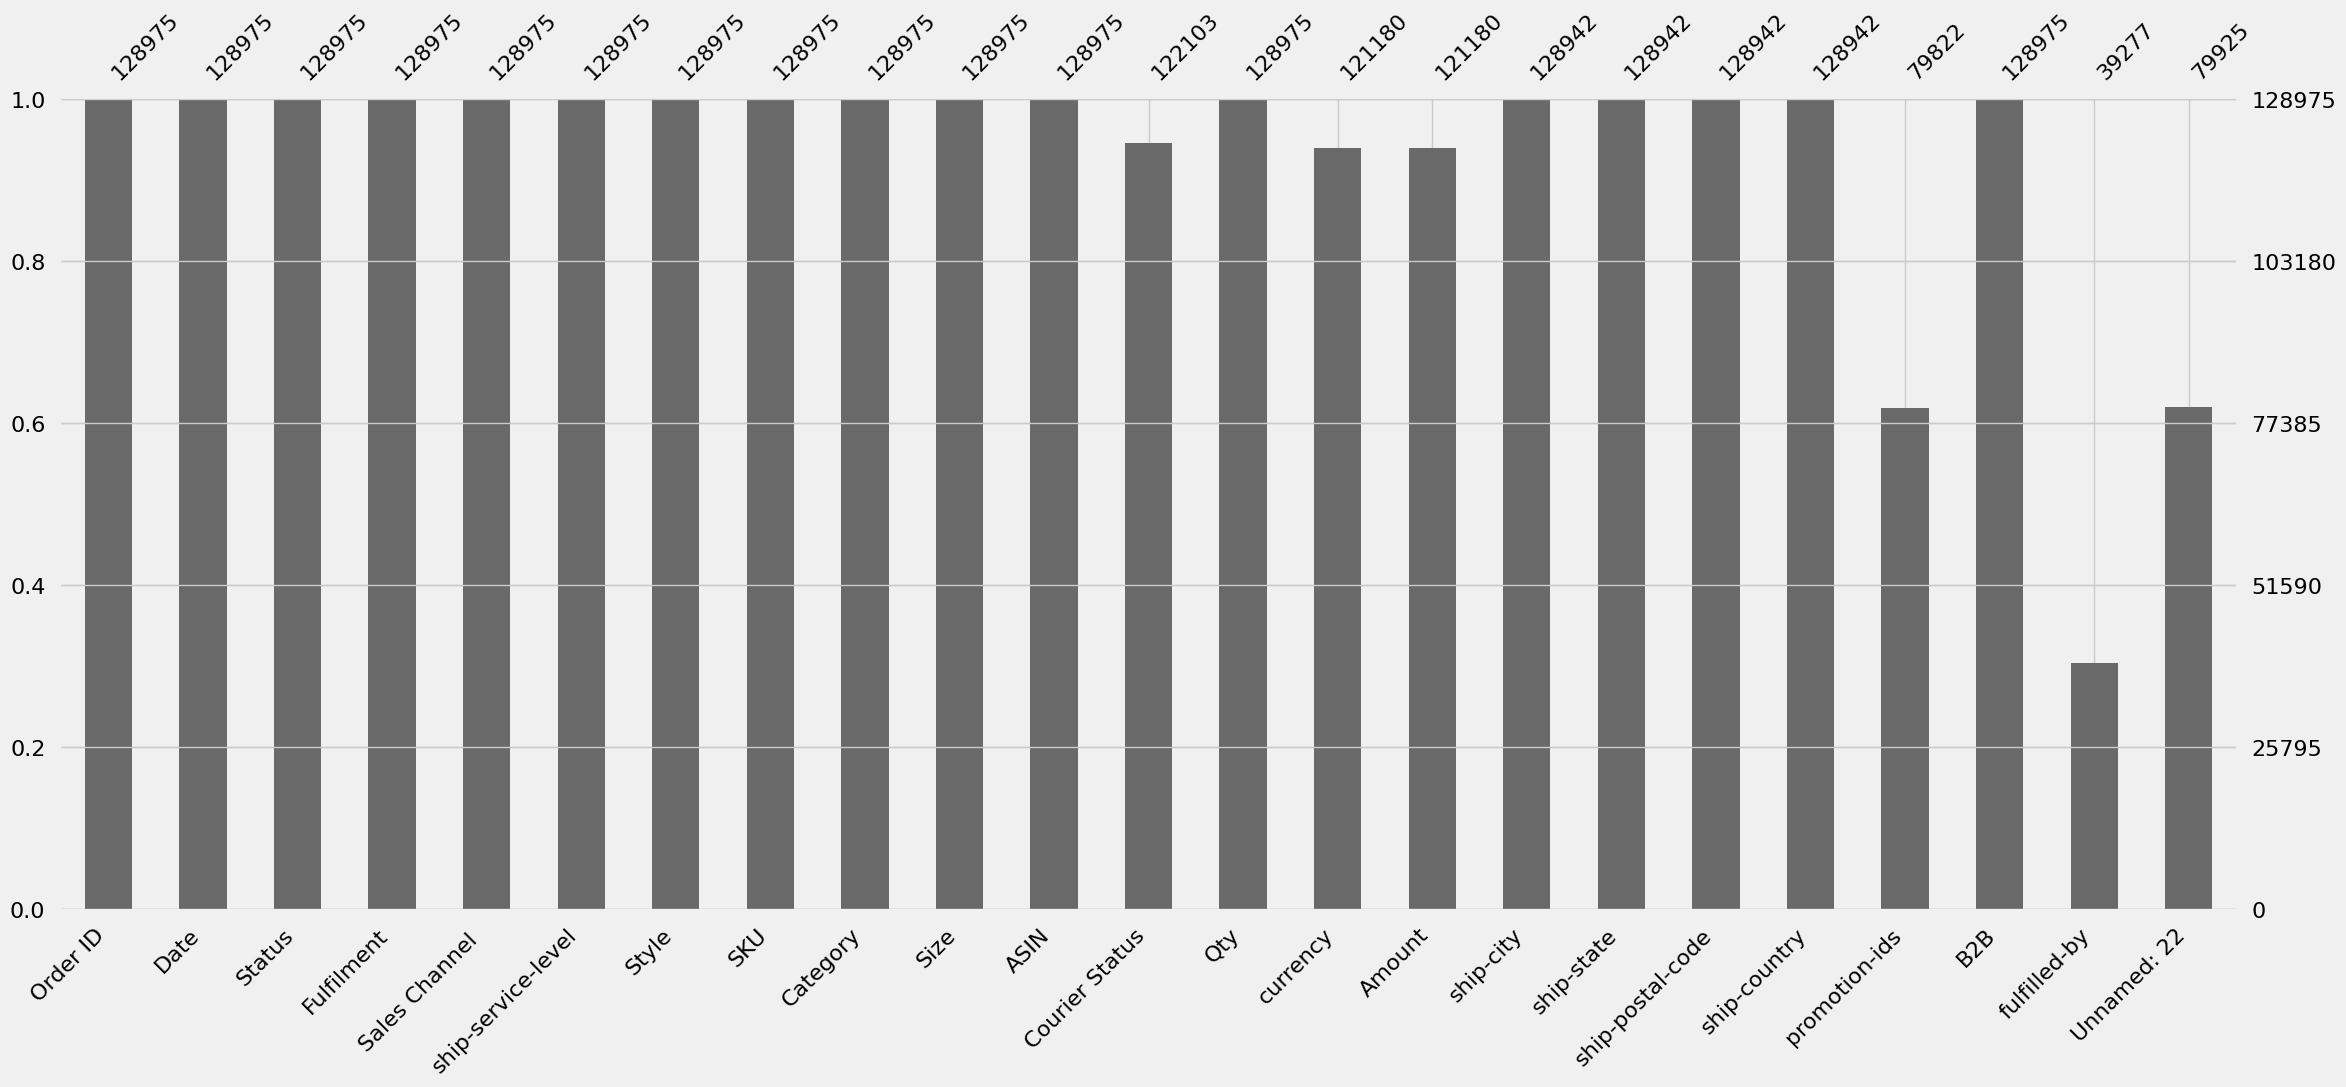

In [82]:
msno.bar(df_AmazonSR)

6 rows have been removed! 
 remaining rows 128969 rows.


<Axes: >

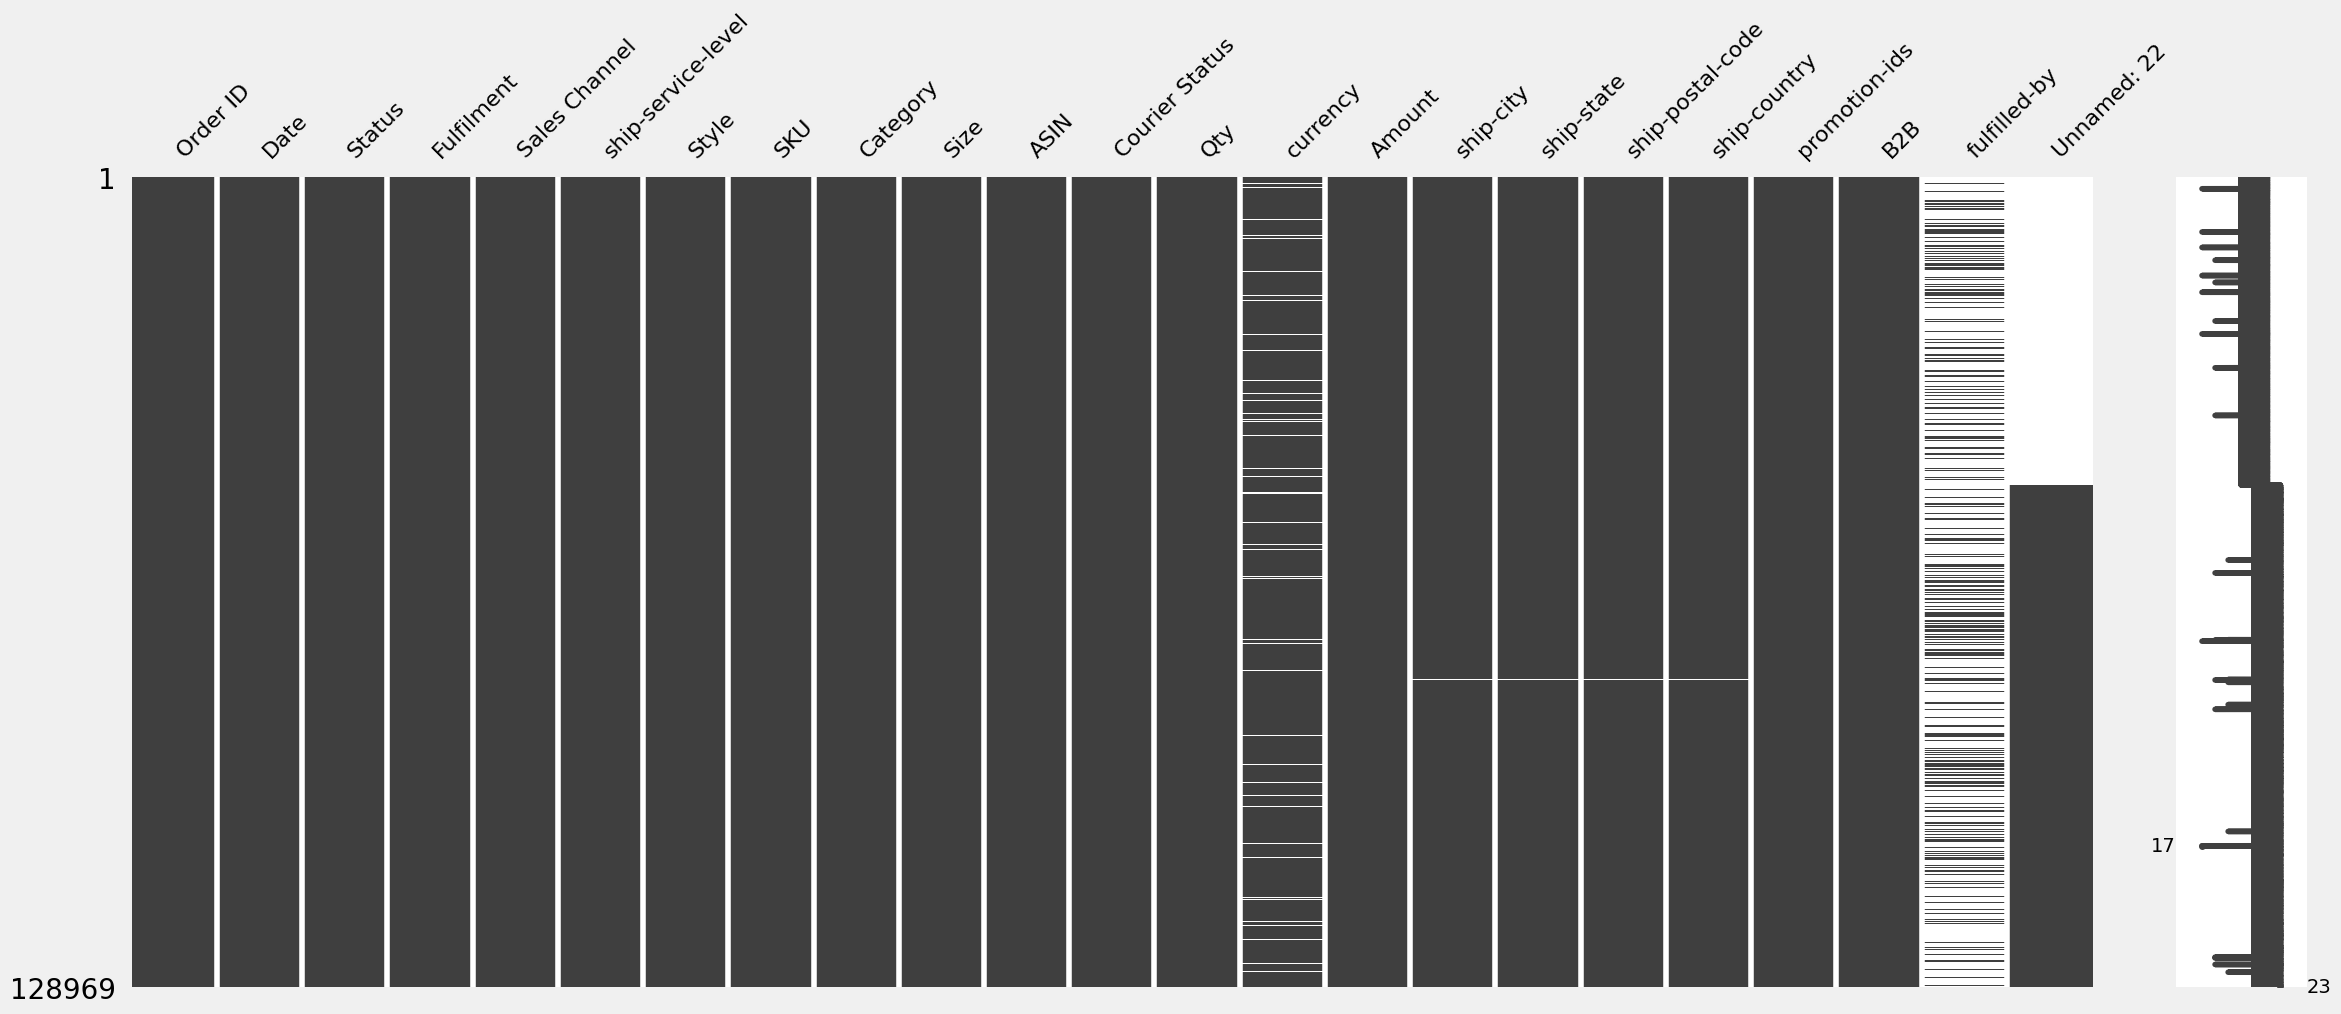

In [83]:
df_AmazonSR.apply(pd.unique)
l = len(df_AmazonSR)
df_AmazonSR.drop_duplicates(inplace = True)
a_l = len(df_AmazonSR)
difference_len = l - a_l
print(f"{difference_len} rows have been removed! \n remaining rows {a_l} rows.")
df_AmazonSR[df_AmazonSR.isnull().any(axis = 1)]
df_AmazonSR[df_AmazonSR['promotion-ids'].isnull()]
df_AmazonSR['promotion-ids'].fillna('no promotion', inplace = True)
df_AmazonSR['Courier Status'].fillna('unknown', inplace = True)
df_AmazonSR[df_AmazonSR['Amount'].isnull()]
df_AmazonSR['Amount'].fillna(0, inplace = True)
msno.matrix(df_AmazonSR)

<Axes: >

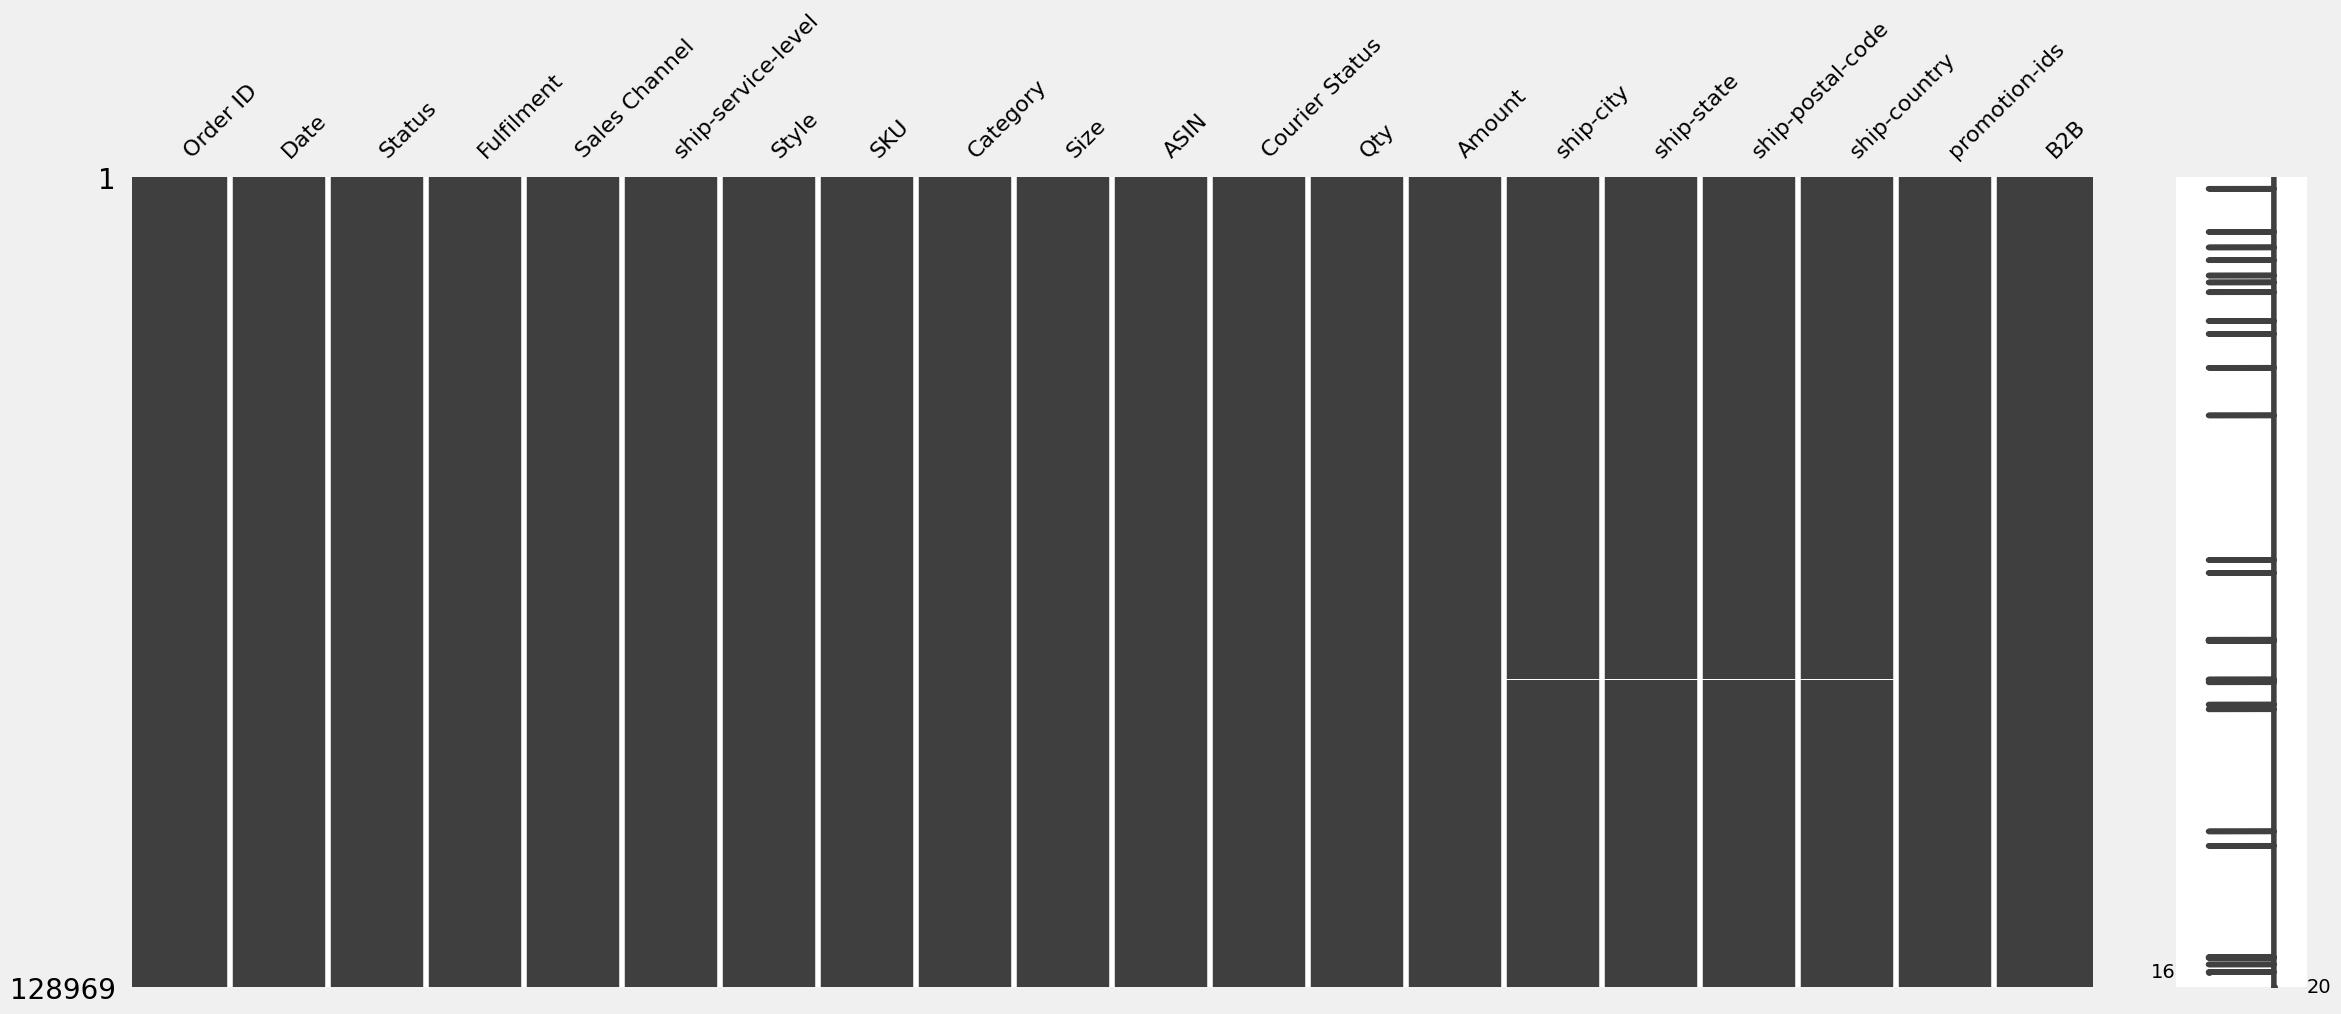

In [84]:
df_AmazonSR.drop(columns = ['currency'], inplace = True)
df_AmazonSR.drop(columns = ['fulfilled-by'], inplace = True)
df_AmazonSR.drop(columns = ['Unnamed: 22'], inplace = True)
msno.matrix(df_AmazonSR)

In [85]:
mapper = {'Order ID':'orderID', 'Date':'date', 'Status':'status', 'Fulfillment':'fulfillment'}
df_AmazonSR.rename(columns = mapper, inplace = True)
df_AmazonSR.head()

orderID      date                        status Fulfilment Sales Channel  ship-service-level    Style              SKU       Category Size        ASIN Courier Status  Qty  Amount    ship-city   ship-state  ship-postal-code ship-country                                      promotion-ids    B2B
index                                                                                                                                                                                                                                                                                                                   
0      405-8078784-5731545  04-30-22                     Cancelled   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S            Set    S  B09KXVBD7Z        unknown    0  647.62       MUMBAI  MAHARASHTRA          400081.0           IN                                       no promotion  False
1      171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta  3XL  B09K3WFS32        Shipped    1  406.00    BENGALURU    KARNATAKA          560085.0           IN  Amazon PLCC Free-Financing Universal Merchant ...  False
2      404-0687676-7273146  04-30-22                       Shipped     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   XL  B07WV4JV4D        Shipped    1  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0           IN       IN Core Free Shipping 2015/04/08 23-48-5-108   True
3      403-9615377-8133951  04-30-22                     Cancelled   Merchant      Amazon.in           Standard    J0341       J0341-DR-L  Western Dress    L  B099NRCT7B        unknown    0  753.33   PUDUCHERRY   PUDUCHERRY          605008.0           IN                                       no promotion  False
4      407-1069790-7240320  04-30-22                       Shipped     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            Top  3XL  B098714BZP        Shipped    1  574.00      CHENNAI   TAMIL NADU          600073.0           IN                                       no promotion  False

In [86]:
df_AmazonSR['B2B'].replace([False, True], ['Consumer', 'Business'], inplace = True)

<Axes: >

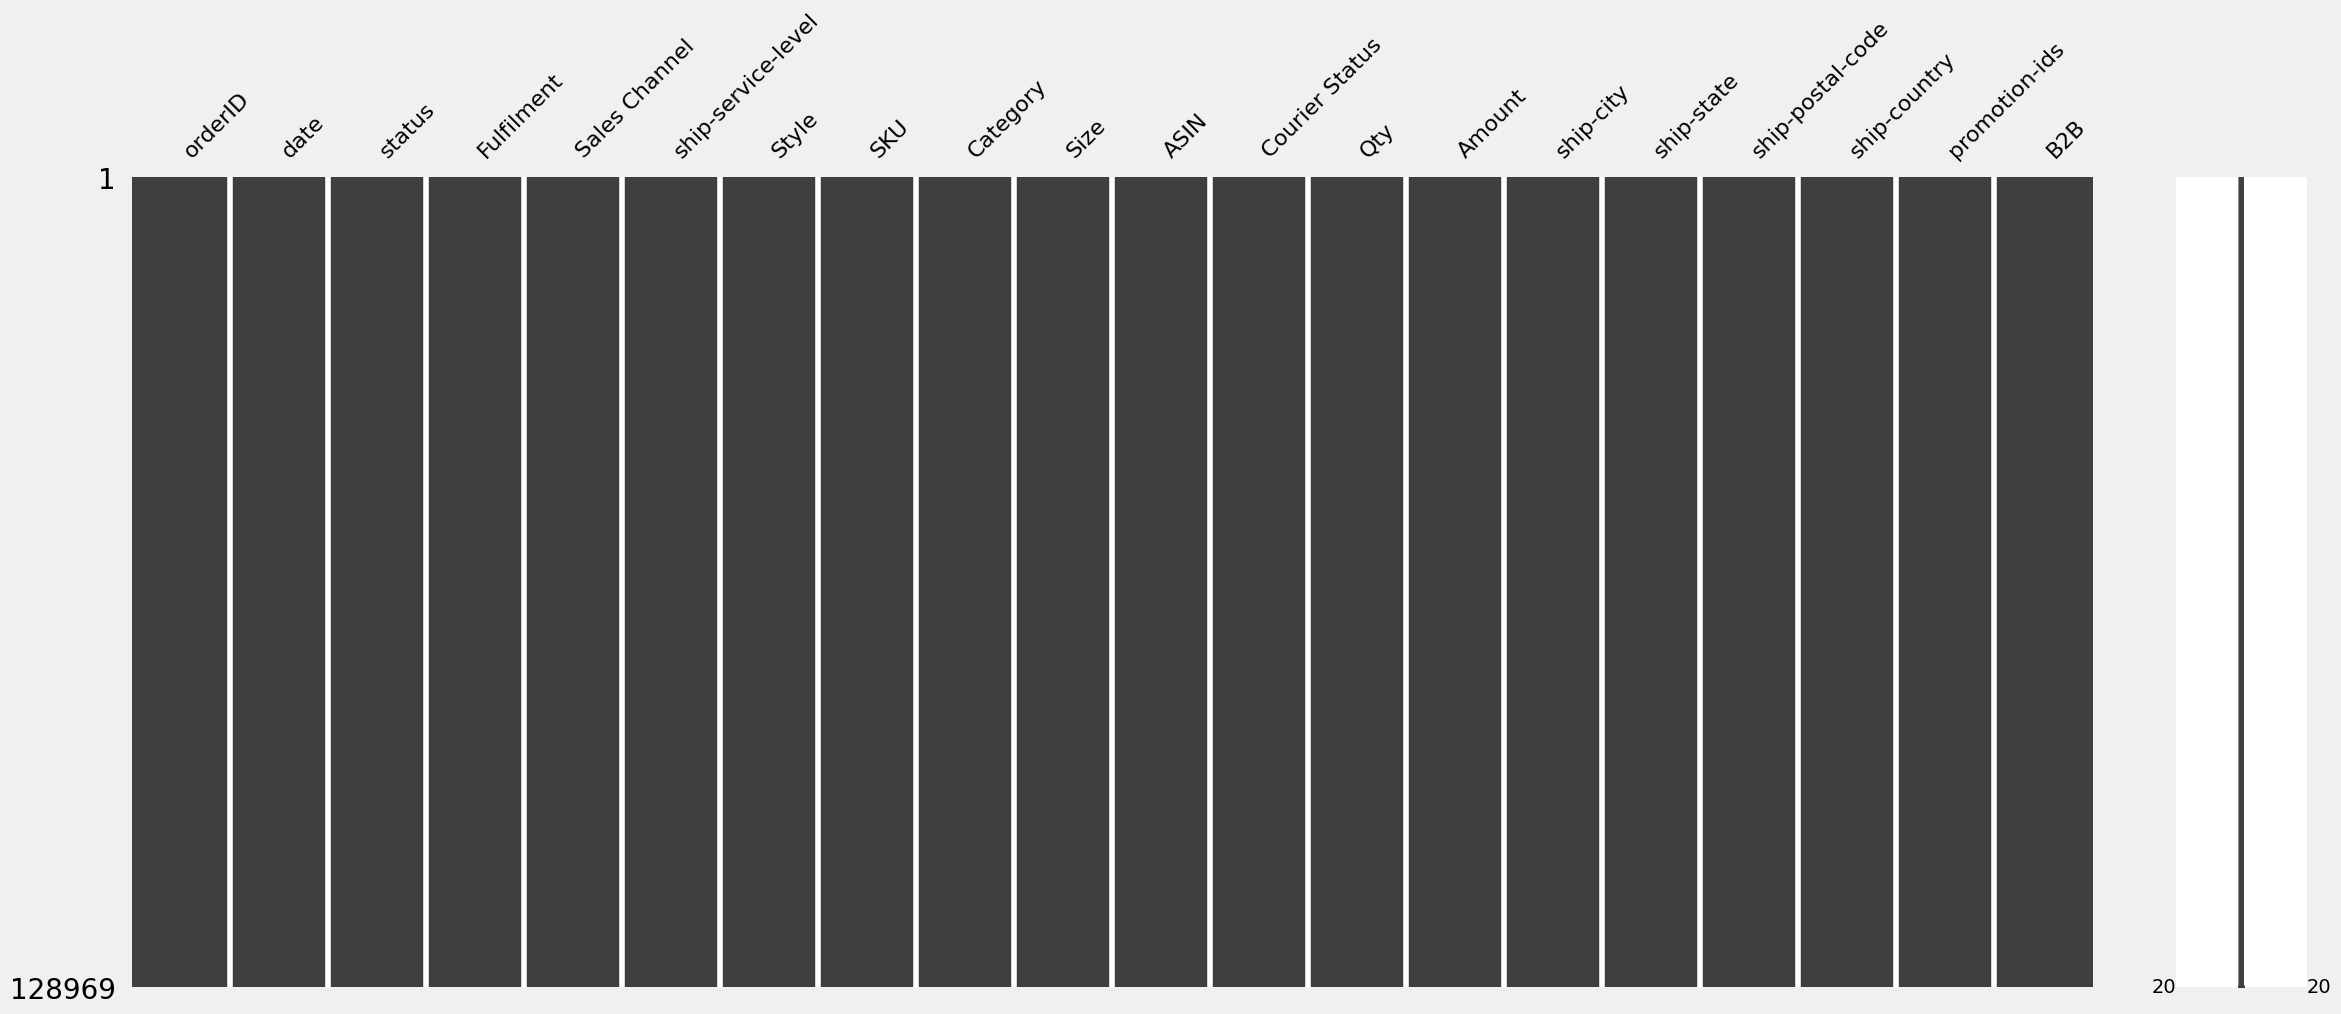

In [87]:
df_AmazonSR['ship-city'].fillna('unknown', inplace = True)
df_AmazonSR['ship-state'].fillna('unknown', inplace = True)
df_AmazonSR['ship-postal-code'].fillna('unknown', inplace = True)
df_AmazonSR['ship-country'].fillna('unknown', inplace = True)
msno.matrix(df_AmazonSR)

In [88]:
df_AmazonSR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128969 entries, 0 to 128974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   orderID             128969 non-null  object 
 1   date                128969 non-null  object 
 2   status              128969 non-null  object 
 3   Fulfilment          128969 non-null  object 
 4   Sales Channel       128969 non-null  object 
 5   ship-service-level  128969 non-null  object 
 6   Style               128969 non-null  object 
 7   SKU                 128969 non-null  object 
 8   Category            128969 non-null  object 
 9   Size                128969 non-null  object 
 10  ASIN                128969 non-null  object 
 11  Courier Status      128969 non-null  object 
 12  Qty                 128969 non-null  int64  
 13  Amount              128969 non-null  float64
 14  ship-city           128969 non-null  object 
 15  ship-state          128969 non-null  ob

In [89]:
# df_AmazonSR.to_csv('./result/AmazonCleaned.csv')
df_AmazonCleaned = df_AmazonSR

<Axes: >

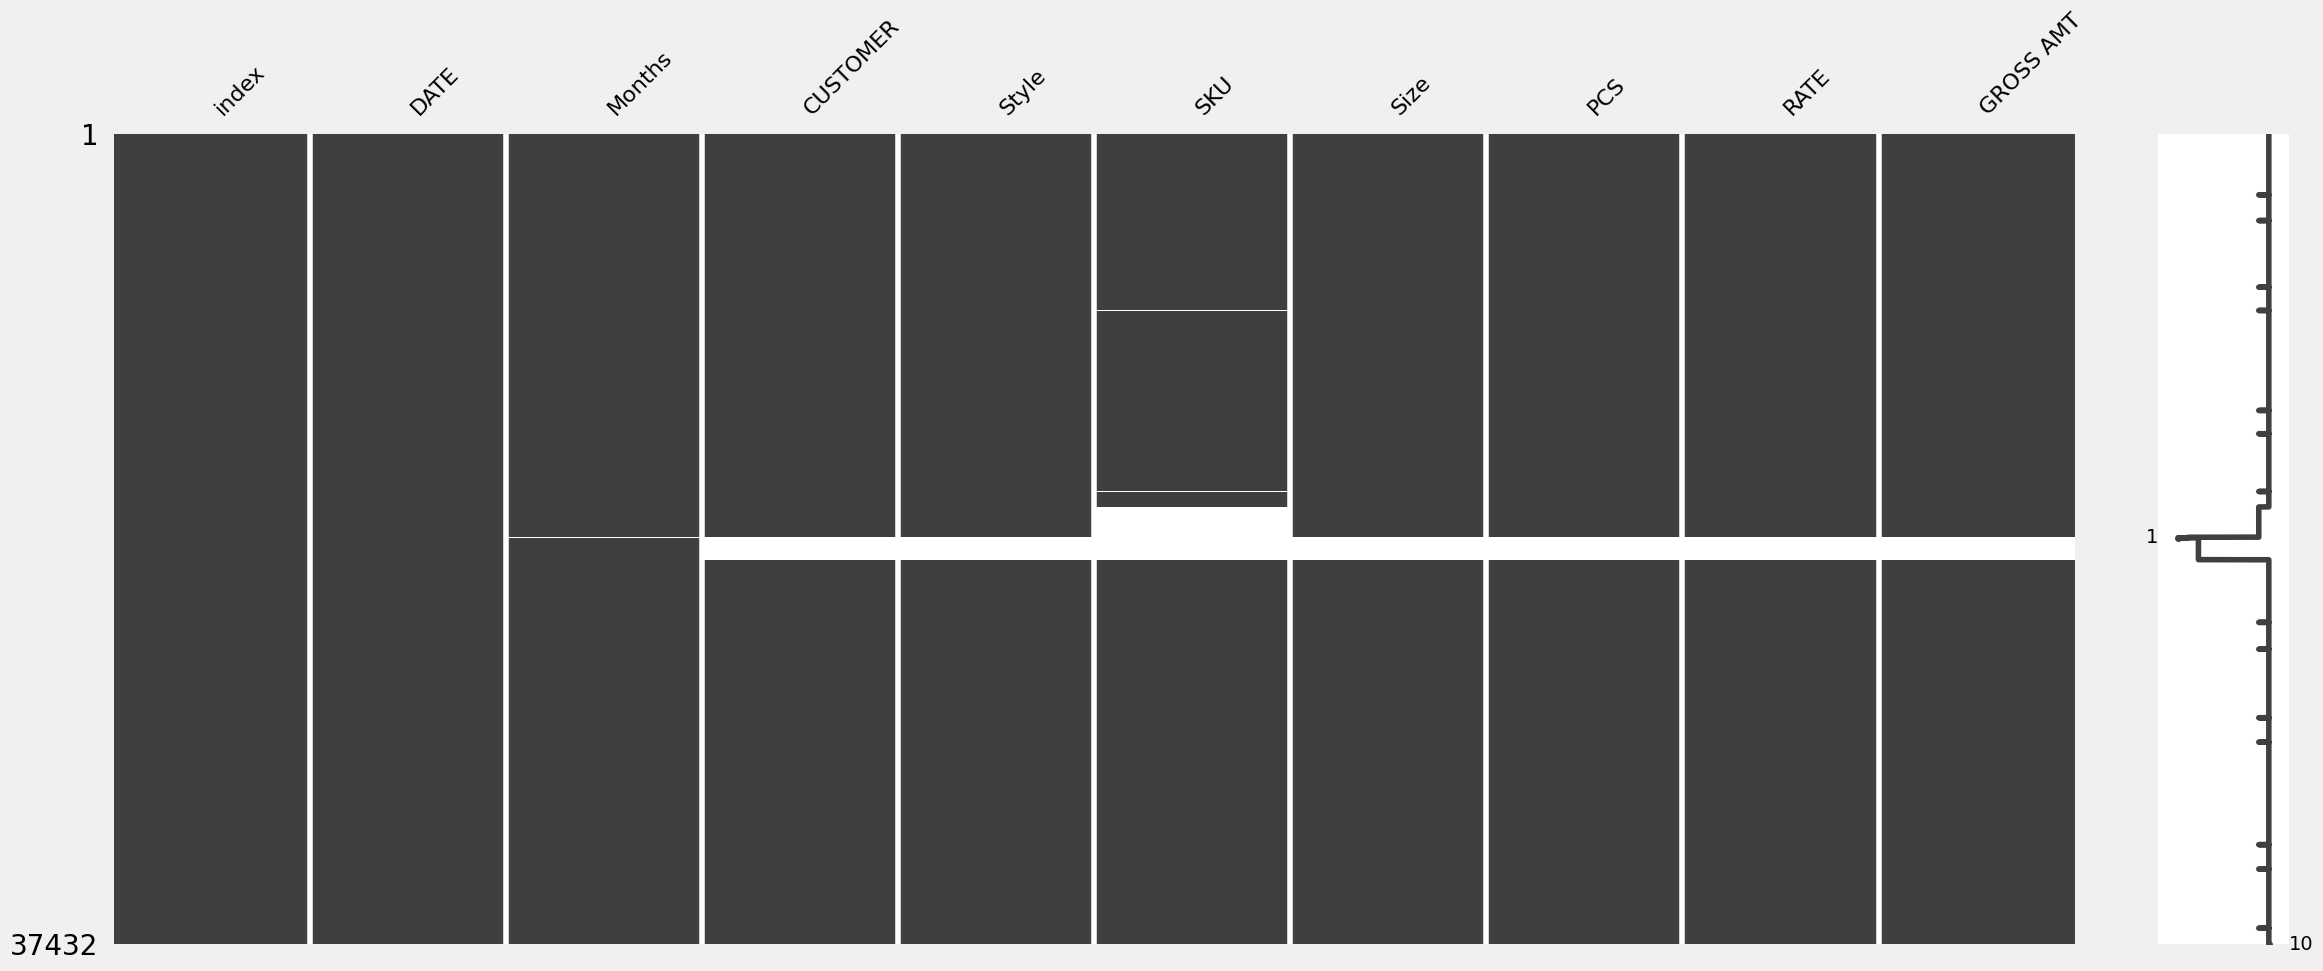

In [90]:
# Null Value Calculation for df_InternationalSR
# Files df_InternationalSR Missing values
import missingno as mn
df_file = df_InternationalSR
mn.matrix(df_file)

<Axes: >

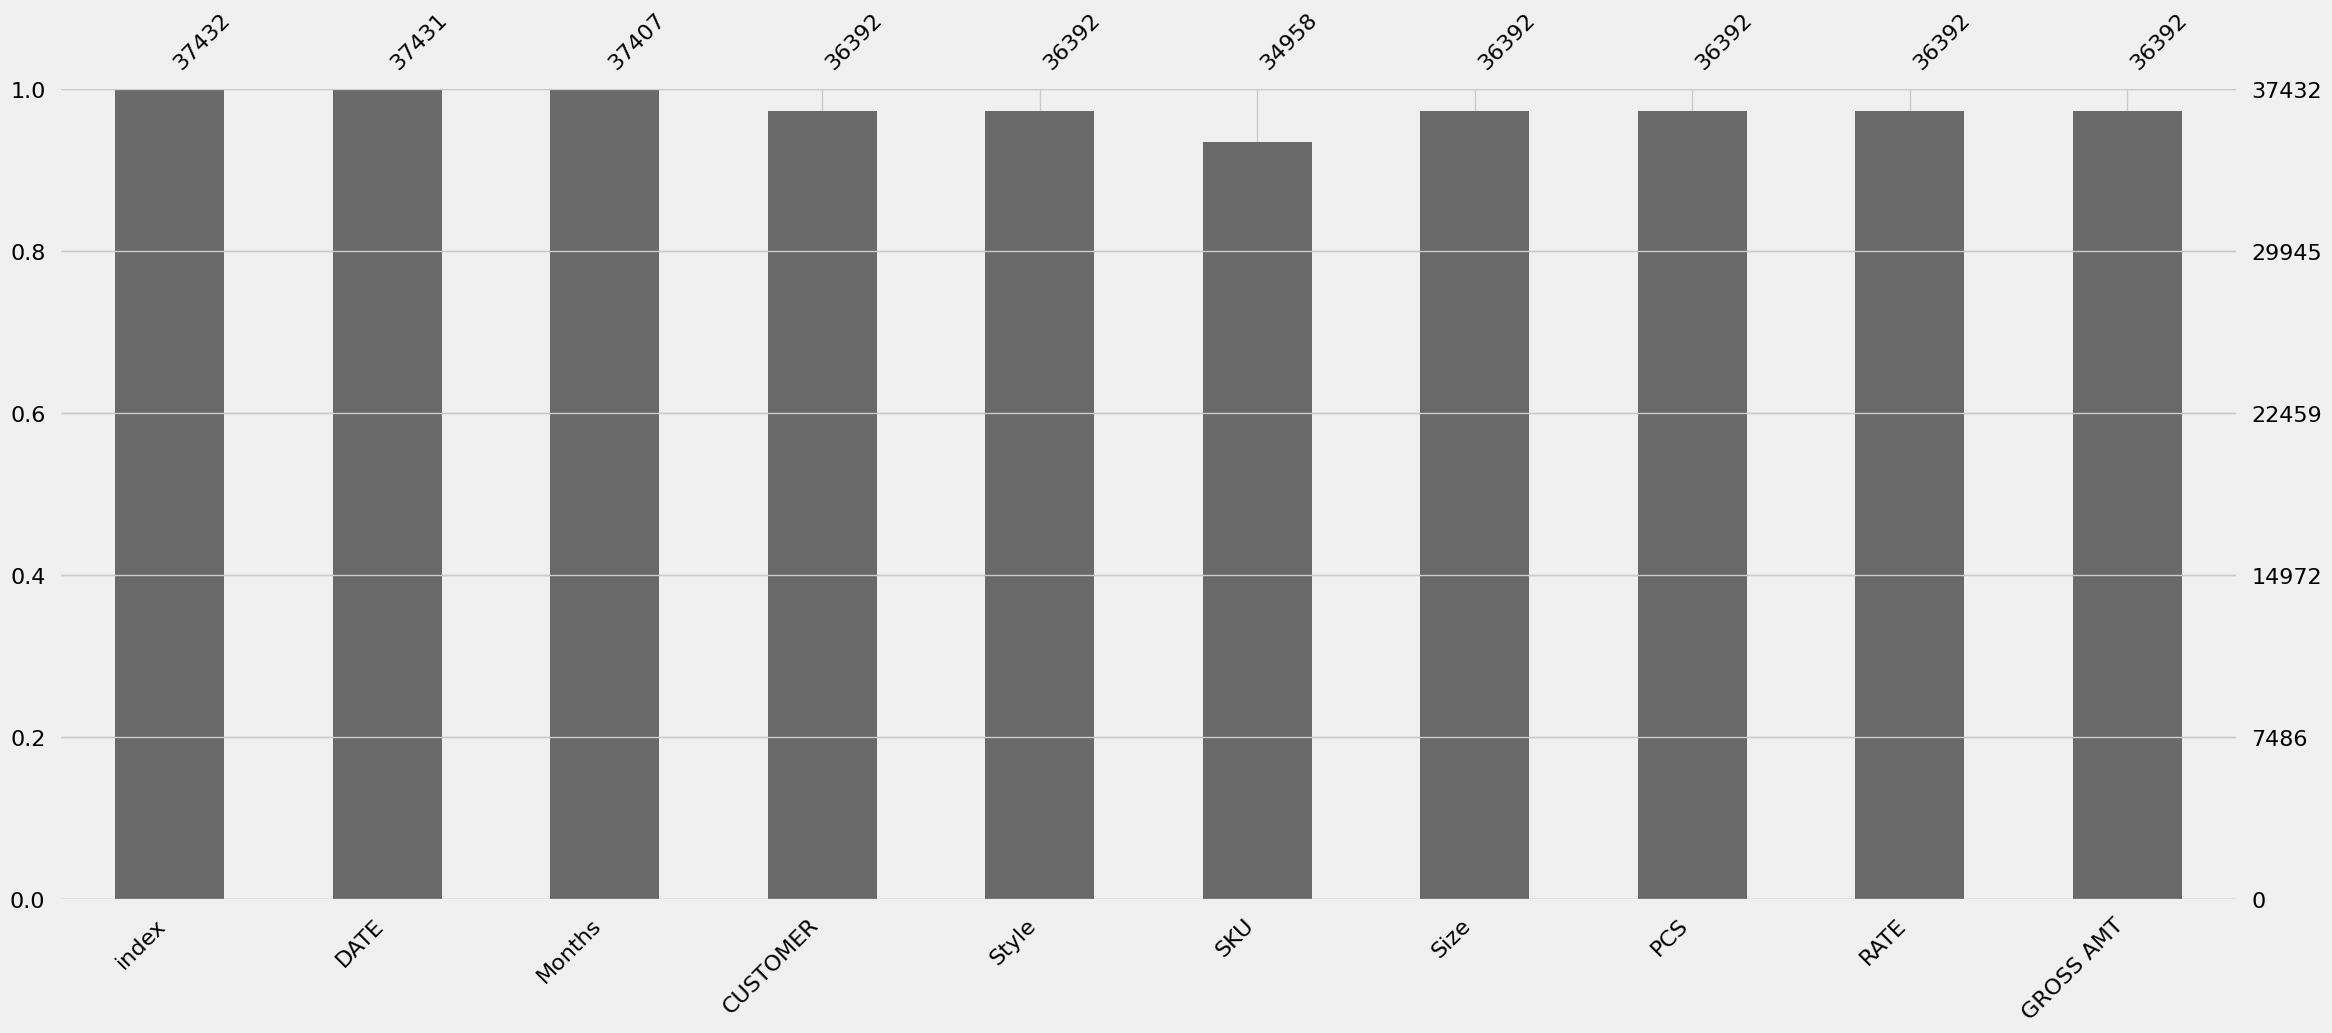

In [91]:
mn.bar(df_file)

In [92]:
# Calculate Percentage of Null Value in Each Column
round(df_file.isnull().sum() / df_file.shape[0] * 100.00,2)

index        0.00
DATE         0.00
Months       0.07
CUSTOMER     2.78
Style        2.78
SKU          6.61
Size         2.78
PCS          2.78
RATE         2.78
GROSS AMT    2.78
dtype: float64

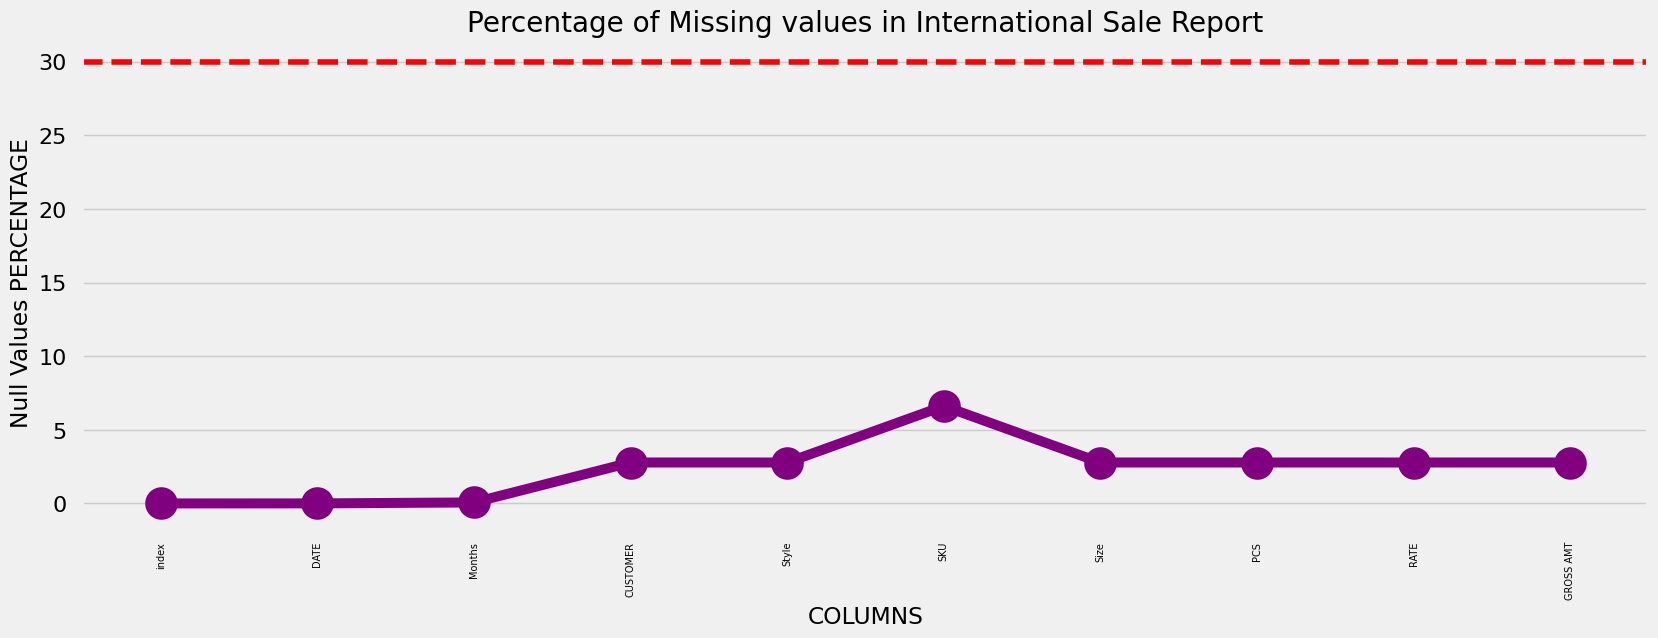

In [93]:
clean_percent = 30

null_df_file = pd.DataFrame((df_file.isnull().sum())*100/df_file.shape[0]).reset_index()
null_df_file.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_df_file,color='purple')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(clean_percent, ls='--',color='red')
plt.title("Percentage of Missing values in International Sale Report")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [94]:
nullcol_clean_percent_df_file = null_df_file[null_df_file["Null Values Percentage"]>=clean_percent]
nullcol_clean_percent_df_file

Empty DataFrame
Columns: [Column Name, Null Values Percentage]
Index: []

In [95]:
# Calculate columns have more than or euqal to clean_percent null values
len(nullcol_clean_percent_df_file)

0

In [96]:
df_InternationalSR.head()

index      DATE  Months            CUSTOMER    Style             SKU Size   PCS    RATE GROSS AMT
0      0  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5004    MEN5004-KR-L    L  1.00  616.56    617.00
1      1  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5004   MEN5004-KR-XL   XL  1.00  616.56    617.00
2      2  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5004  MEN5004-KR-XXL  XXL  1.00  616.56    617.00
3      3  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5009    MEN5009-KR-L    L  1.00  616.56    617.00
4      4  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5011    MEN5011-KR-L    L  1.00  616.56    617.00

In [97]:
# Check the Data Information of Column
for col in df_InternationalSR.columns:
    print("Column:",col, "\n\n", df_InternationalSR[col].value_counts(),"\n")

Column: index 

 index
0        1
24966    1
24950    1
24951    1
24952    1
        ..
12478    1
12479    1
12480    1
12481    1
37431    1
Name: count, Length: 37432, dtype: int64 

Column: DATE 

 DATE
MULBERRIES BOUTIQUE    1904
09-14-21                700
COTTON CLOSET LTD       659
07-09-21                657
03-03-22                657
                       ... 
JNE3553                   1
JNE3546                   1
JNE3622                   1
JNE3516                   1
JNE3507                   1
Name: count, Length: 1326, dtype: int64 

Column: Months 

 Months
Feb-22    3380
Oct-21    3098
Mar-22    2263
Nov-21    1816
Sep-21    1497
          ... 
233.00       1
874.00       1
189.00       1
568.00       1
151.00       1
Name: count, Length: 571, dtype: int64 

Column: CUSTOMER 

 CUSTOMER
Feb-22                                 3448
Oct-21                                 3176
Mar-22                                 2327
MULBERRIES BOUTIQUE                    2121
Nov-21

In [98]:
# Step 3: Null Value Data Imputation

In [99]:
# Impute and Replace Null Values in df_InternationalSR
df_InternationalSR = df_InternationalSR.fillna('Unknown')

# Calculate percentage of null value in each column
round(df_InternationalSR.isnull().sum() / df_InternationalSR.shape[0] * 100.00,2)

index        0.0
DATE         0.0
Months       0.0
CUSTOMER     0.0
Style        0.0
SKU          0.0
Size         0.0
PCS          0.0
RATE         0.0
GROSS AMT    0.0
dtype: float64

In [100]:
# Merge Data and Process the InternationalSR
# df_AmazonCleaned = pd.read_csv('./result/AmazonCleaned.csv')

# Add Category Feature
# Merge the Two Tables According to SKU Column
df_Merge = df_InternationalSR.merge(df_AmazonCleaned[['SKU','Category']], on='SKU', how='left')
df_Merge = df_Merge.drop_duplicates(subset=['index'])
df_Merge = df_Merge.dropna(subset=['Category'])

# Discarding Useless Data
df_Merge = df_Merge.drop(['index', 'DATE','SKU'], axis=1)

# Import Merged Data
df_InternationalSR = df_Merge

In [101]:
# Inspecting the Column Types After Removal of Unnecessary Columns
df_InternationalSR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28276 entries, 0 to 787911
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Months     28276 non-null  object
 1   CUSTOMER   28276 non-null  object
 2   Style      28276 non-null  object
 3   Size       28276 non-null  object
 4   PCS        28276 non-null  object
 5   RATE       28276 non-null  object
 6   GROSS AMT  28276 non-null  object
 7   Category   28276 non-null  object
dtypes: object(8)
memory usage: 1.9+ MB


In [102]:
# Check the Data Information of Column
for col in df_InternationalSR.columns:
    print("Column:",col, "\n\n", df_InternationalSR[col].value_counts(),"\n")

Column: Months 

 Months
Feb-22      2876
Oct-21      2496
Mar-22      1923
Nov-21      1350
Sep-21      1248
Jul-21       998
Jan-22       950
Dec-21       920
Aug-21       842
09-14-21     569
03-03-22     564
02-22-22     554
Jun-21       535
02-21-22     524
07-09-21     472
02-05-22     438
10-04-21     420
02-26-22     326
03-09-22     324
11-22-21     294
11-03-21     284
10-08-21     284
10-05-21     280
01-29-22     268
10-21-21     220
02-25-22     216
03-26-22     209
11-16-21     196
11-19-21     182
03-23-22     175
06-24-21     174
10-12-21     172
09-15-21     161
12-24-21     160
02-24-22     158
03-10-22     156
10-20-21     156
12-14-21     154
01-01-22     150
08-25-21     148
10-15-21     146
08-04-21     143
08-15-21     138
10-23-21     134
09-22-21     133
10-01-21     126
01-17-22     122
09-18-21     119
08-06-21     116
02-23-22     114
03-05-22     108
07-26-21     107
11-29-21     106
08-16-21     106
11-12-21     104
10-06-21     102
10-14-21     102
02-16-

In [103]:
# Step 4: Standardize Values

In [104]:
# Check Data Type Infomation
df_InternationalSR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28276 entries, 0 to 787911
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Months     28276 non-null  object
 1   CUSTOMER   28276 non-null  object
 2   Style      28276 non-null  object
 3   Size       28276 non-null  object
 4   PCS        28276 non-null  object
 5   RATE       28276 non-null  object
 6   GROSS AMT  28276 non-null  object
 7   Category   28276 non-null  object
dtypes: object(8)
memory usage: 1.9+ MB


In [105]:
# Conversion of Object and columns to Categorical Columns
categorical_columns = ['Months','CUSTOMER','Style','Size','Category']

for col in categorical_columns:
    df_InternationalSR[col] =pd.Categorical(df_InternationalSR[col])

# Numeric Columns
float_columns = ['RATE','PCS','GROSS AMT']

# Remove Unumerical Values from Numeric Columns
for col in float_columns:
    df_InternationalSR = df_InternationalSR[pd.to_numeric(df_InternationalSR[col], errors='coerce').notnull()]

# Convert the Number to Float Type
for col in float_columns:
    df_InternationalSR[col] = df_InternationalSR[col].astype(float)

# Converting Negative Values in Numerical Columns to Positive Values
for col in float_columns:
    df_InternationalSR[col] = abs(df_InternationalSR[col])

In [106]:
# Data Type Conversion
# Check if the Column Type is the Correct Data Type Using the Above Result
df_InternationalSR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28276 entries, 0 to 787911
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Months     28276 non-null  category
 1   CUSTOMER   28276 non-null  category
 2   Style      28276 non-null  category
 3   Size       28276 non-null  category
 4   PCS        28276 non-null  float64 
 5   RATE       28276 non-null  float64 
 6   GROSS AMT  28276 non-null  float64 
 7   Category   28276 non-null  category
dtypes: category(5), float64(3)
memory usage: 1.1 MB


In [107]:
# Use the applymap() Function to Convert All Strings to Only the First Letter Capitalized Format
df_InternationalSR = df_InternationalSR.applymap(lambda x: x.title() if type(x) == str else x)

In [108]:
# Check the Result
df_InternationalSR.head()

Months            CUSTOMER    Style Size  PCS    RATE  GROSS AMT Category
0    Jun-21  Revathy Loganathan  Men5004    L  1.0  616.56      617.0    Kurta
66   Jun-21  Revathy Loganathan  Men5004   Xl  1.0  616.56      617.0    Kurta
136  Jun-21  Revathy Loganathan  Men5004  Xxl  1.0  616.56      617.0    Kurta
203  Jun-21  Revathy Loganathan  Men5009    L  1.0  616.56      617.0    Kurta
278  Jun-21  Revathy Loganathan  Men5011    L  1.0  616.56      617.0    Kurta

In [109]:
# Check the Data Information of Column
for col in df_InternationalSR.columns:
    print("Column:",col, "\n\n", df_InternationalSR[col].value_counts(),"\n")

Column: Months 

 Months
Feb-22      2876
Oct-21      2496
Mar-22      1923
Nov-21      1350
Sep-21      1248
Jul-21       998
Jan-22       950
Dec-21       920
Aug-21       842
09-14-21     569
03-03-22     564
02-22-22     554
Jun-21       535
02-21-22     524
07-09-21     472
02-05-22     438
10-04-21     420
02-26-22     326
03-09-22     324
11-22-21     294
11-03-21     284
10-08-21     284
10-05-21     280
01-29-22     268
10-21-21     220
02-25-22     216
03-26-22     209
11-16-21     196
11-19-21     182
03-23-22     175
06-24-21     174
10-12-21     172
09-15-21     161
12-24-21     160
02-24-22     158
03-10-22     156
10-20-21     156
12-14-21     154
01-01-22     150
08-25-21     148
10-15-21     146
08-04-21     143
08-15-21     138
10-23-21     134
09-22-21     133
10-01-21     126
01-17-22     122
09-18-21     119
08-06-21     116
02-23-22     114
03-05-22     108
07-26-21     107
11-29-21     106
08-16-21     106
11-12-21     104
10-06-21     102
10-14-21     102
02-16-

In [110]:
# Checking the Null Value % of Each Column in df_InternationalSR Dataframe
round(df_InternationalSR.isnull().sum() / df_InternationalSR.shape[0] * 100.00,3)

Months       0.0
CUSTOMER     0.0
Style        0.0
Size         0.0
PCS          0.0
RATE         0.0
GROSS AMT    0.0
Category     0.0
dtype: float64

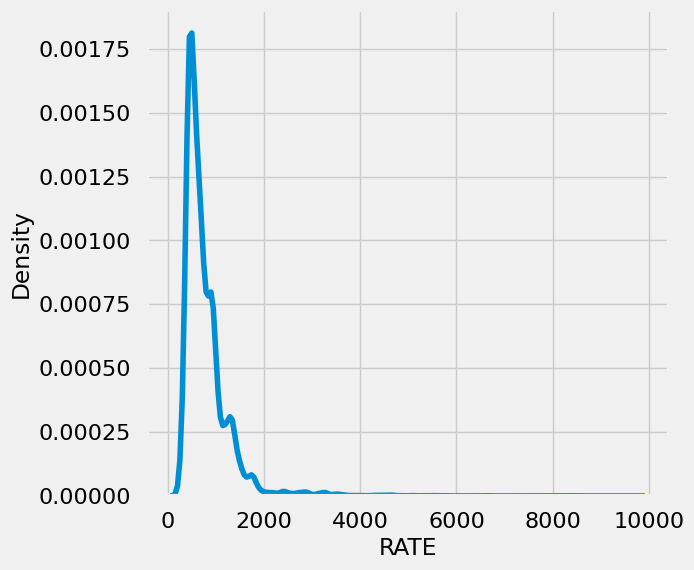

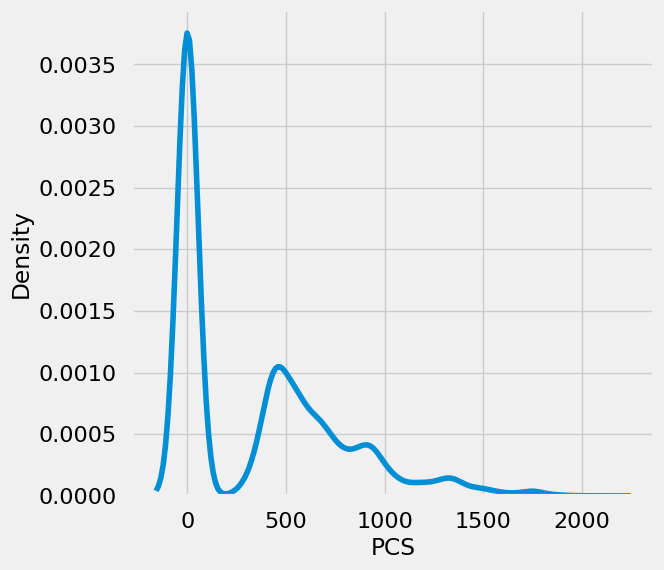

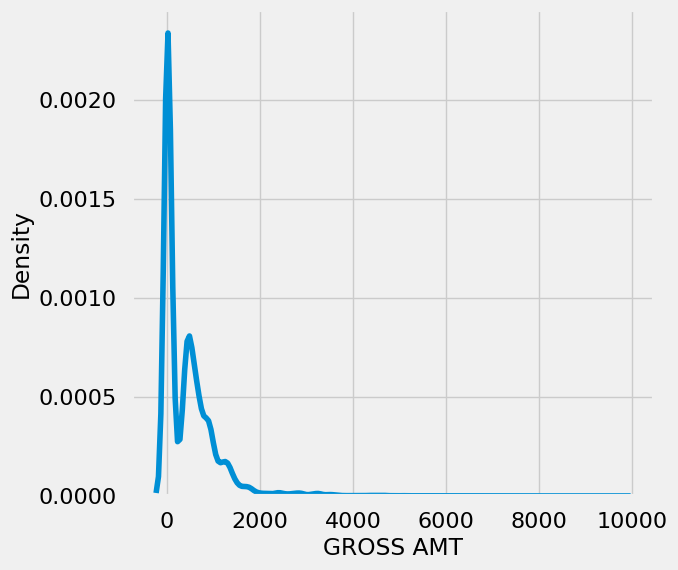

In [111]:
# Check Outlier

# Check Outlier in RATE column
plt.figure(figsize=(6,6))
sns.kdeplot(df_InternationalSR['RATE'])
plt.show()

# Check Outlier in PCS column
plt.figure(figsize=(6,6))
sns.kdeplot(df_InternationalSR['PCS'])
plt.show()

# Check Outlier in GROSS AMT column
plt.figure(figsize=(6,6))
sns.kdeplot(df_InternationalSR['GROSS AMT'])
plt.show()

In [112]:
# Step 5: Data Analysis

In [113]:
# Binning Numerical Columns to create a categorical column

# Creating bins for GROSS AMT
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, float('inf')]
slot = ['0-200','200-400', '400-600','600-800','800-1000','1000-1200','1200-1400','1400-1600','1600-1800','1800-2000', '2000 Above']

df_InternationalSR['GrossamtBin'] = pd.cut(df_InternationalSR['GROSS AMT'], bins=bins, labels=slot)

In [114]:
# Display the Result
df_InternationalSR['GrossamtBin'].value_counts(normalize=True) * 100

GrossamtBin
0-200         47.041237
400-600       18.120830
600-800       10.004740
800-1000       7.995771
200-400        5.042476
1200-1400      3.423634
1000-1200      3.394465
2000 Above     2.100120
1400-1600      1.370912
1600-1800      1.046414
1800-2000      0.459401
Name: proportion, dtype: float64

In [115]:
# Check the Result
df_InternationalSR.head()

Months            CUSTOMER    Style Size  PCS    RATE  GROSS AMT Category GrossamtBin
0    Jun-21  Revathy Loganathan  Men5004    L  1.0  616.56      617.0    Kurta     600-800
66   Jun-21  Revathy Loganathan  Men5004   Xl  1.0  616.56      617.0    Kurta     600-800
136  Jun-21  Revathy Loganathan  Men5004  Xxl  1.0  616.56      617.0    Kurta     600-800
203  Jun-21  Revathy Loganathan  Men5009    L  1.0  616.56      617.0    Kurta     600-800
278  Jun-21  Revathy Loganathan  Men5011    L  1.0  616.56      617.0    Kurta     600-800

In [116]:
# Compute the Sum of GROSS AMT for Each CUSTOMER
grossamt_sum = df_InternationalSR.groupby("CUSTOMER")["GROSS AMT"].sum().sort_values(ascending=False)

# Display the Result
print(grossamt_sum)

CUSTOMER
Mulberries Boutique                    1458958.0
Amani Concept Trading Llc (Kapda)       753165.0
Galaxy Group Of Companies Pvt. Ltd      378984.0
Rivaan Llc                              371163.0
Vaharsha Boutique                       364594.0
Bhanu Saleine Naunitham                 309825.0
Sure Fashions Llc                       307664.0
Vishal Darshan Boutique                 282128.0
Rino Sandaran                           269399.0
Visha Devan                             263030.0
Ethnic Weaves Fashion Llc               262894.0
Cotton Closet Ltd                       254711.0
Nirusah Tailoring                       245028.0
Thana Marimuthu                         228213.0
Fusion Fashions Corp.                   217403.0
Shilpi Kumari                           197055.0
Anju Bharati                            193706.0
Rina Thakurta                           190254.0
Tanuj Uppal                             190128.0
Thilas Bombay Boutique Sdn Bhd          169974.0
Revathy Log

In [ ]:
# Filter Out the top 5 Larger CUSTOMER
grossamt_sum_top = grossamt_sum.nlargest(5)

# Draw a Histogram of the GROSS AMT Sum for Each Category
plt.bar(grossamt_sum_top.index, grossamt_sum_top.values)

plt.title('Distribution of Customer')
plt.xlabel('Customer')
plt.ylabel('GrossAmt Sum')
plt.show()

In [117]:
# Compute the Average GROSS AMT for Each CUSTOMER
grossamt_mean = df_InternationalSR.groupby("CUSTOMER")["GROSS AMT"].mean().sort_values(ascending=False)

# Display the Result
print(grossamt_mean)

CUSTOMER
Aanchol                                2863.000000
Amani Concept Trading Llc (Kapda)      2810.317164
Syeda Morshed                          2735.071429
Sure Fashions Llc                      2330.787879
Nitharsha                              2212.867647
Rino Sandaran                          1980.875000
Monisyaa                               1594.805970
Vendan                                 1492.366667
Rina Thakurta                          1441.318182
Randhir Chaudhary                      1339.000000
Nitha Pushpangadan Sarala              1277.409091
Moniyshaa                              1242.888889
M/S Charismakurties(Dubai)             1196.604938
Sanchita Karki                         1130.851852
Harsiniy Kumareson                     1111.666667
Suumaya Clothing                       1079.807692
Viknes Threads Collection              1075.684211
Divya                                  1056.300000
Sweety Akhter                          1051.636364
Arkh Fashion          

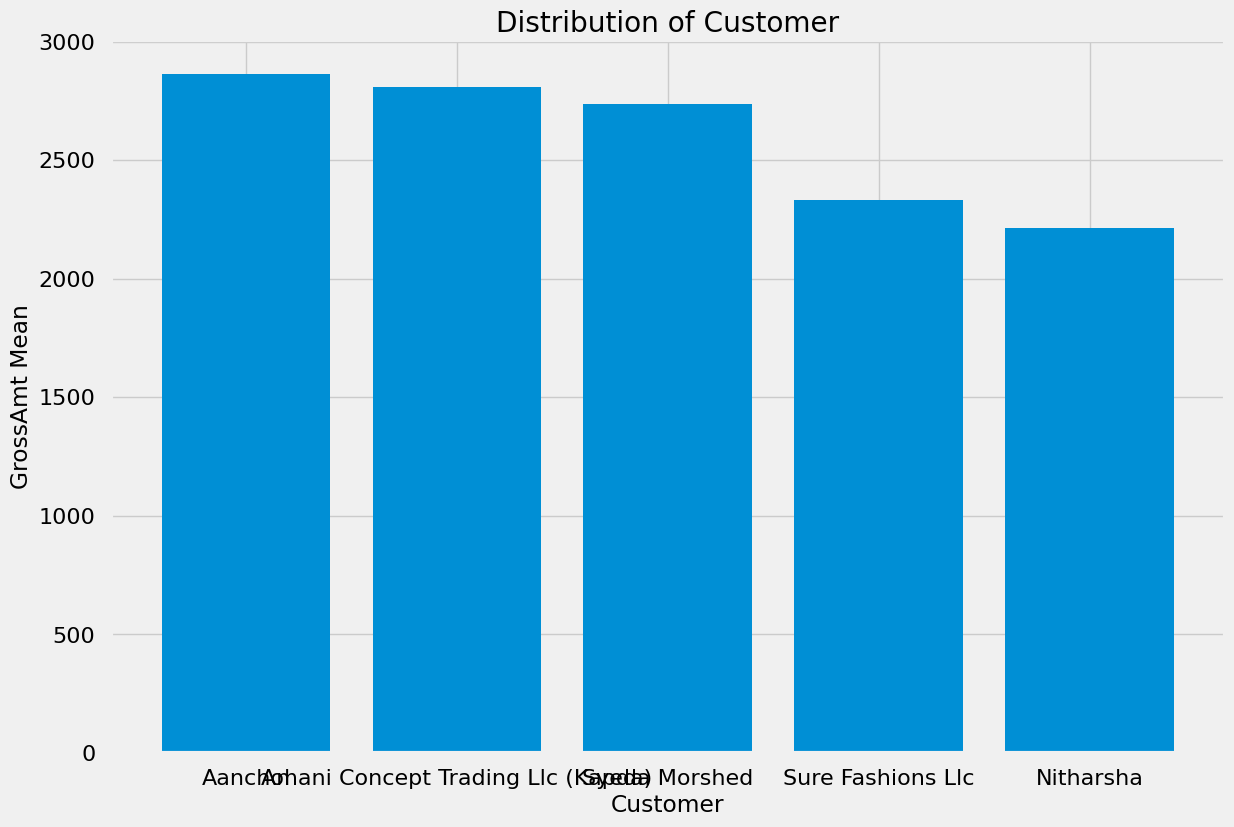

In [118]:
# Filter Out the Top 5 Larger CUSTOMER
grossamt_mean_top = grossamt_mean.nlargest(5)

# Draw a Histogram of the GROSS AMT Average for Each Category
plt.bar(grossamt_mean_top.index, grossamt_mean_top.values)

plt.title('Distribution of Customer')
plt.xlabel('Customer')
plt.ylabel('GrossAmt Mean')
plt.show()

Mulberries Boutique
The Sum of Gross Amt for Category
Category
Set              1043930.0
Kurta             265319.0
Western Dress      63525.0
Top                42558.0
Ethnic Dress       37363.0
Name: GROSS AMT, dtype: float64
The Mean of Gross Amt for Category
Category
Set              1186.284091
Ethnic Dress      889.595238
Western Dress     825.000000
Kurta             588.290466
Top               545.615385
Name: GROSS AMT, dtype: float64


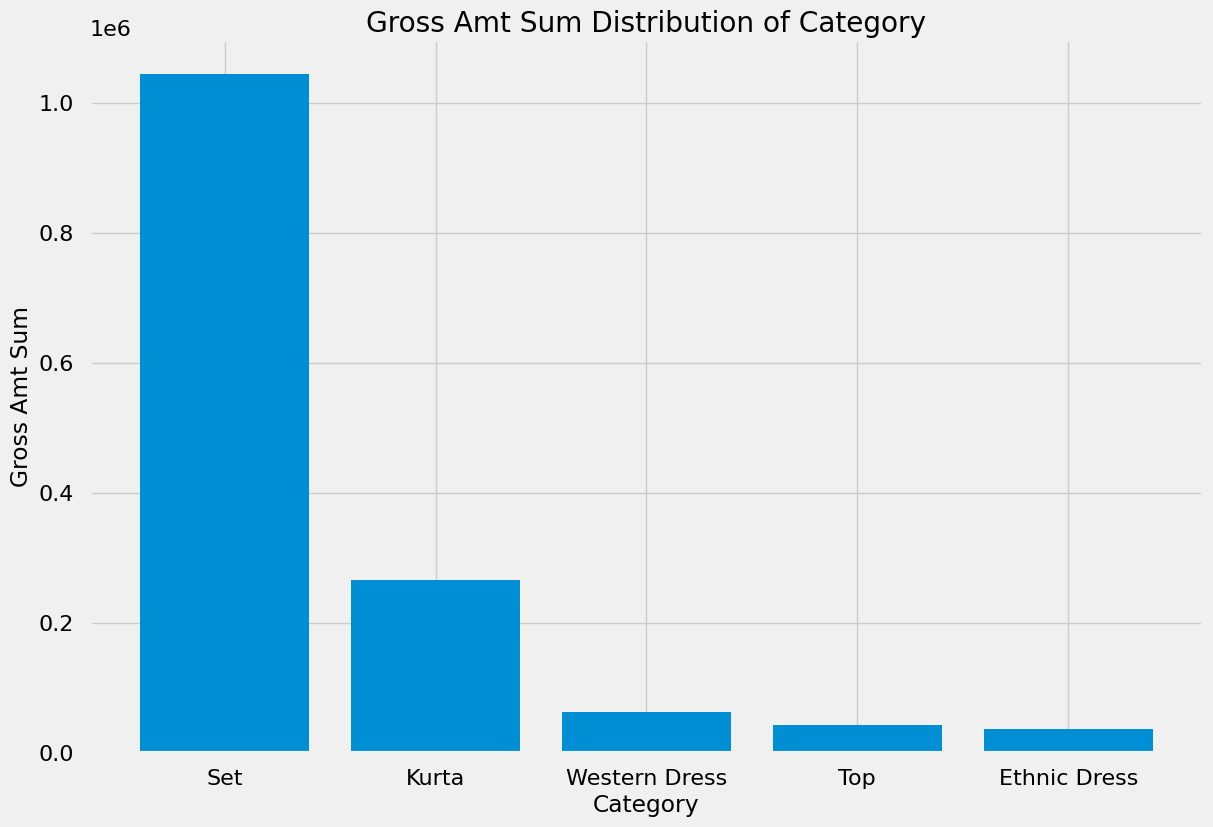

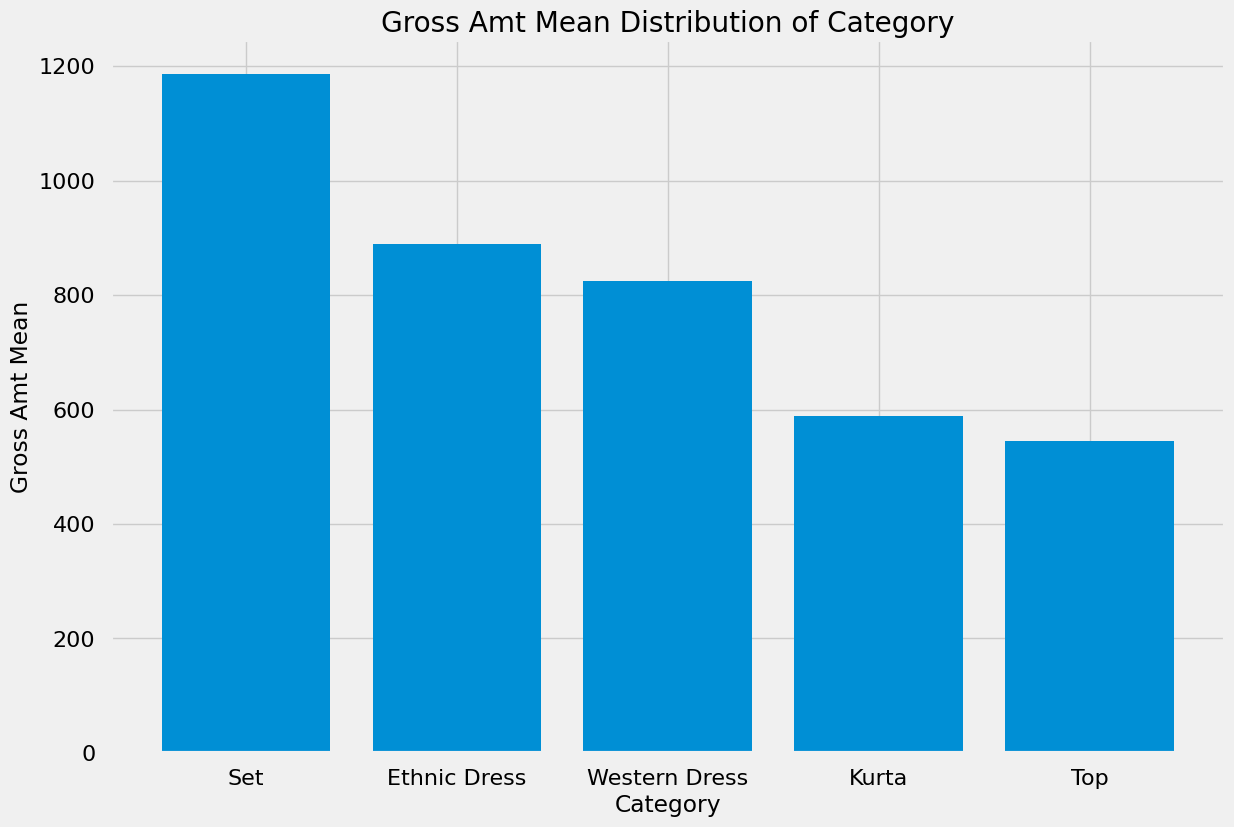

Amani Concept Trading Llc (Kapda)
The Sum of Gross Amt for Category
Category
Set       301984.0
Bottom    171804.0
Top       170593.0
Kurta     108784.0
Name: GROSS AMT, dtype: float64
The Mean of Gross Amt for Category
Category
Set       3471.080460
Top       2751.500000
Kurta     2653.268293
Bottom    2202.615385
Name: GROSS AMT, dtype: float64


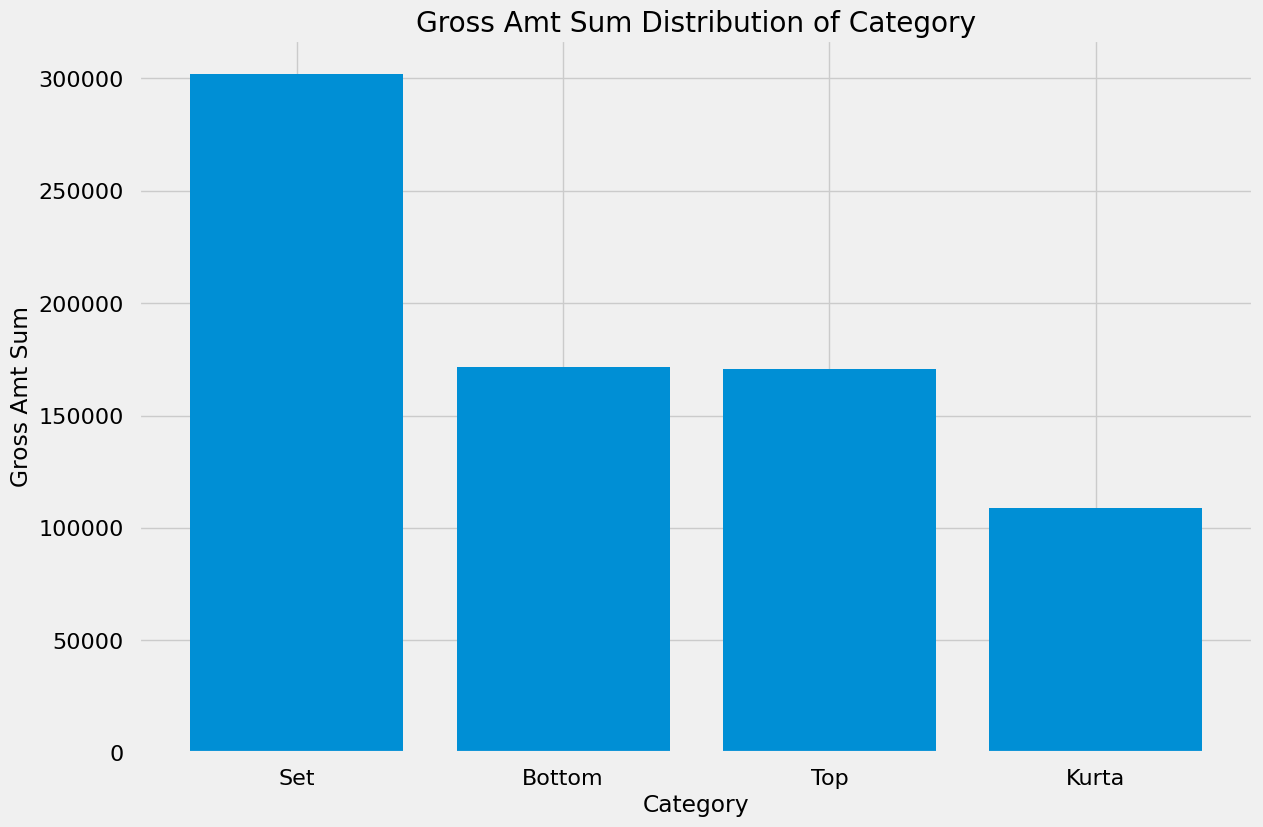

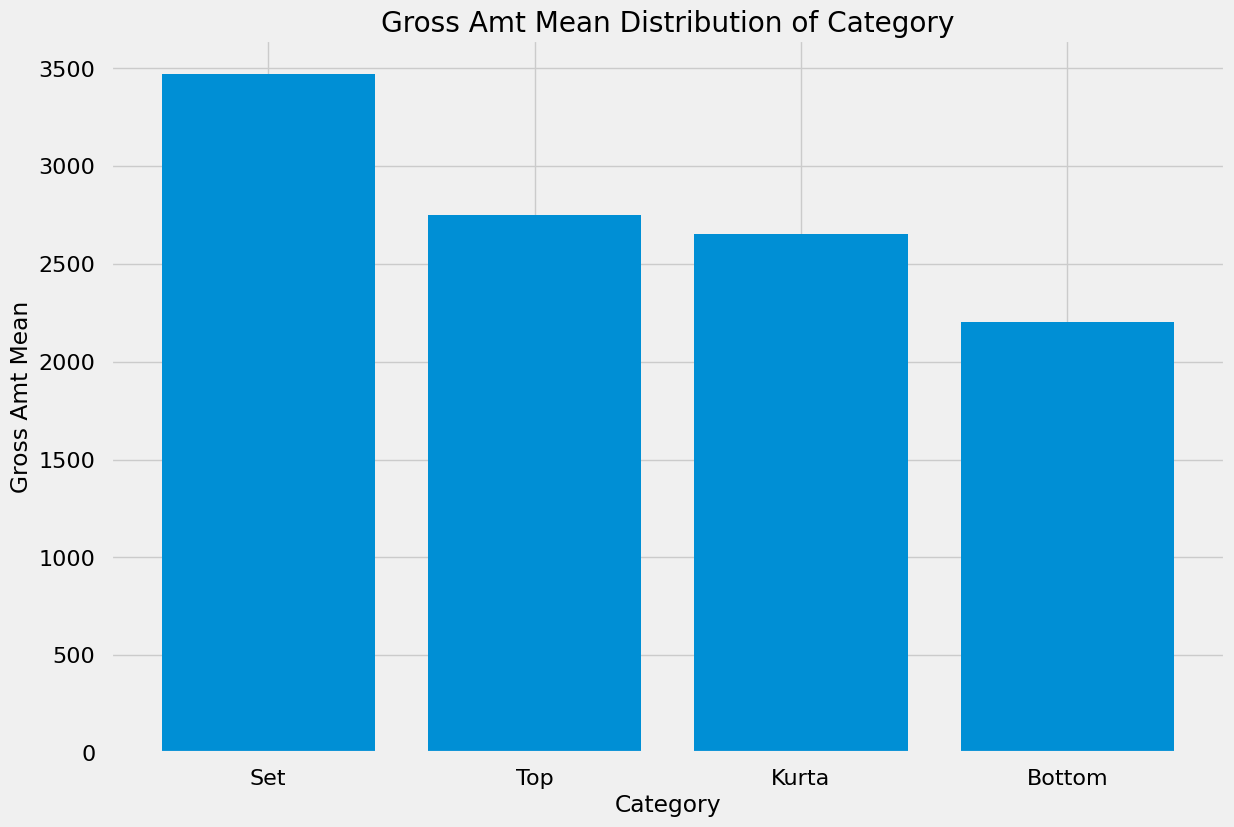

Galaxy Group Of Companies Pvt. Ltd
The Sum of Gross Amt for Category
Category
Set             295306.0
Kurta            75728.0
Ethnic Dress      7950.0
Name: GROSS AMT, dtype: float64
The Mean of Gross Amt for Category
Category
Set             1085.683824
Ethnic Dress     795.000000
Kurta            676.142857
Name: GROSS AMT, dtype: float64


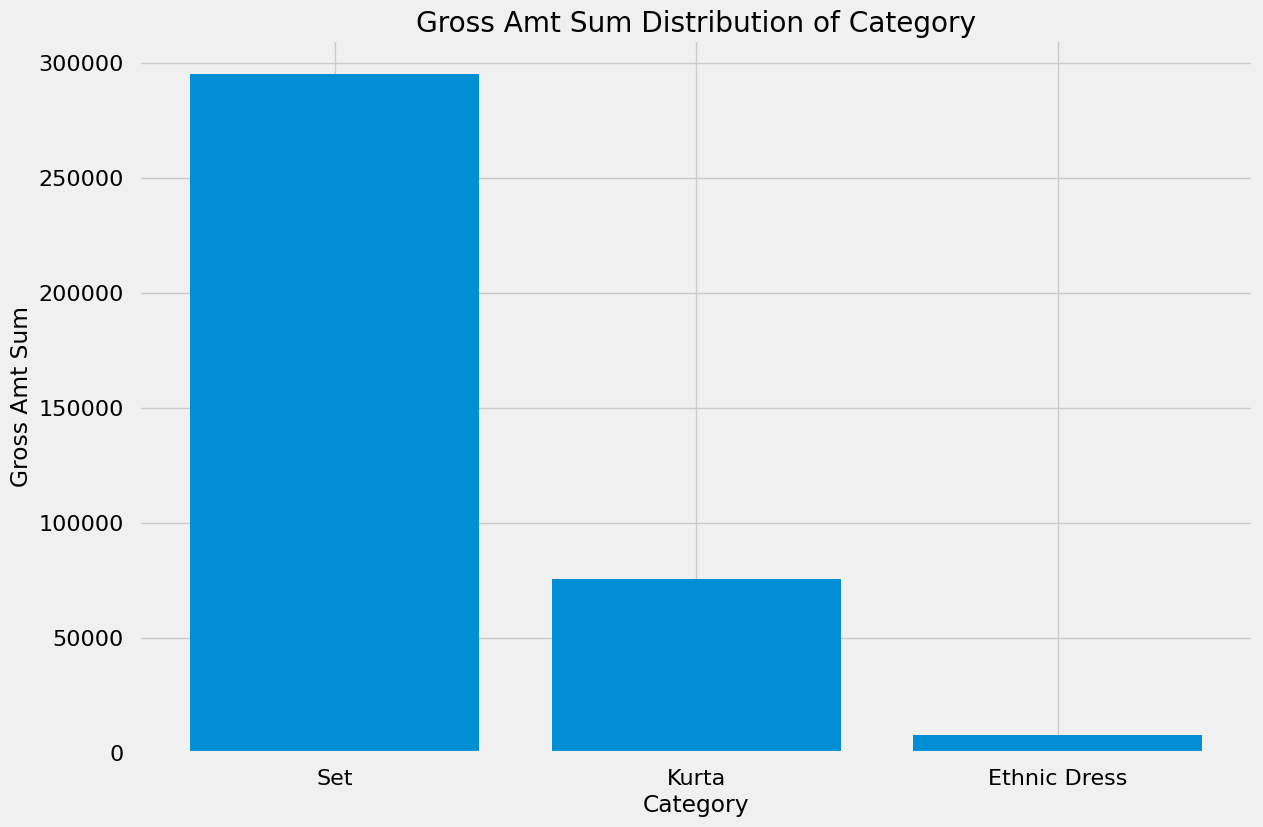

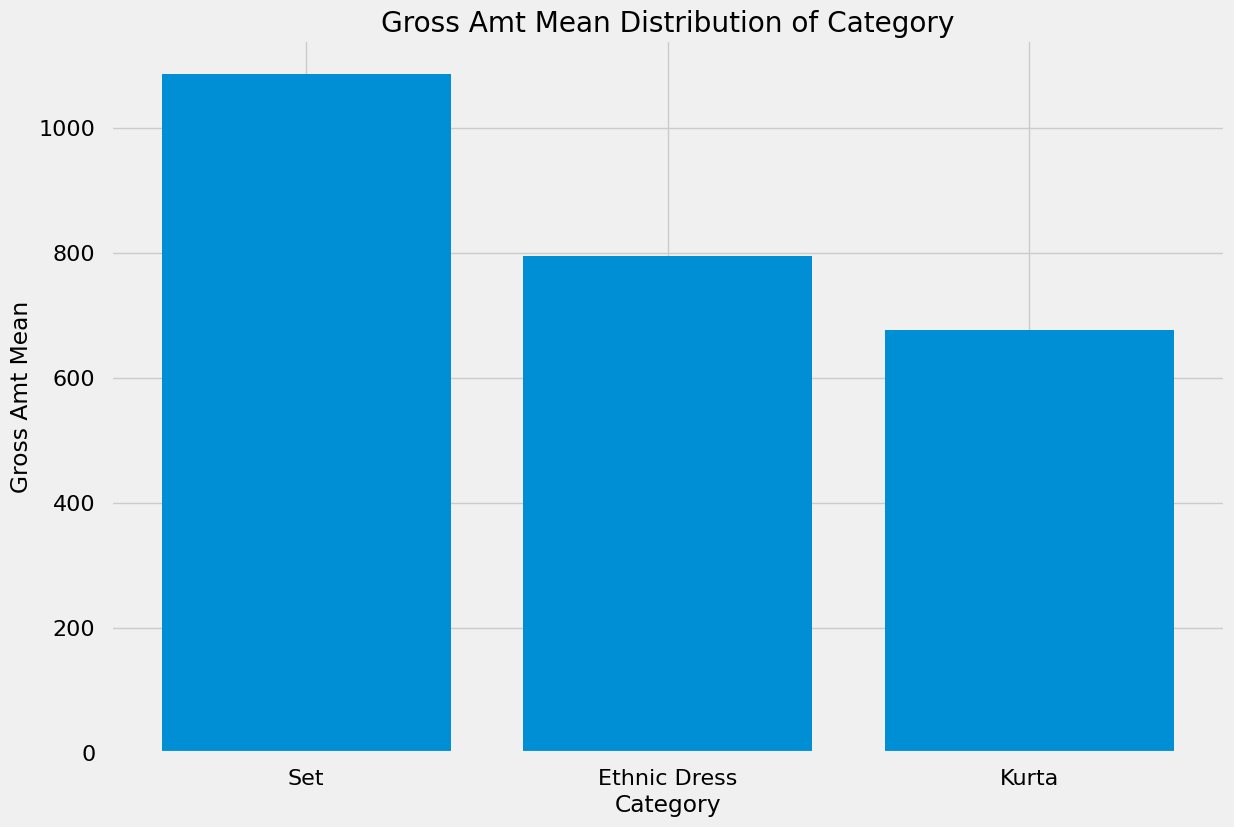

Rivaan Llc
The Sum of Gross Amt for Category
Category
Set              190379.0
Kurta            165053.0
Top               14288.0
Western Dress      1443.0
Name: GROSS AMT, dtype: float64
The Mean of Gross Amt for Category
Category
Set              1312.958621
Kurta             708.381974
Western Dress     481.000000
Top               460.903226
Name: GROSS AMT, dtype: float64


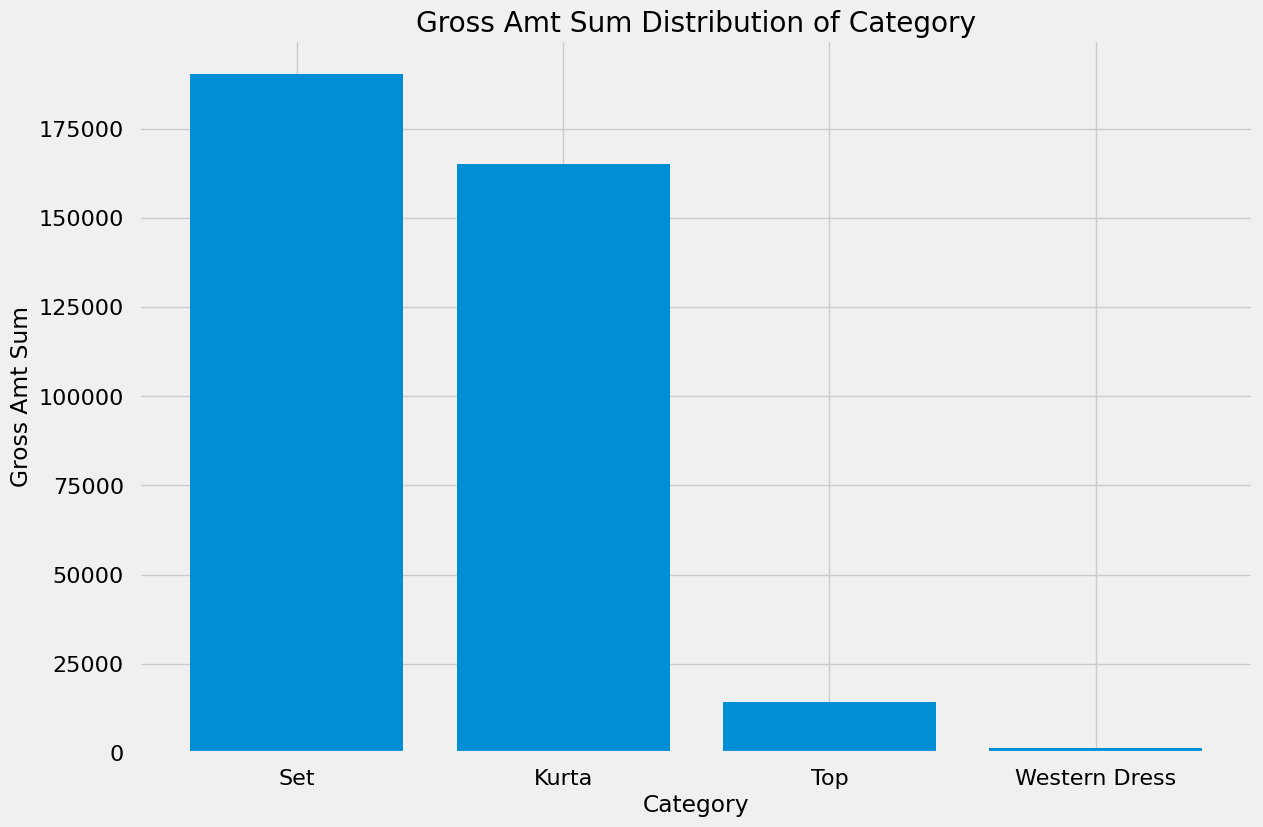

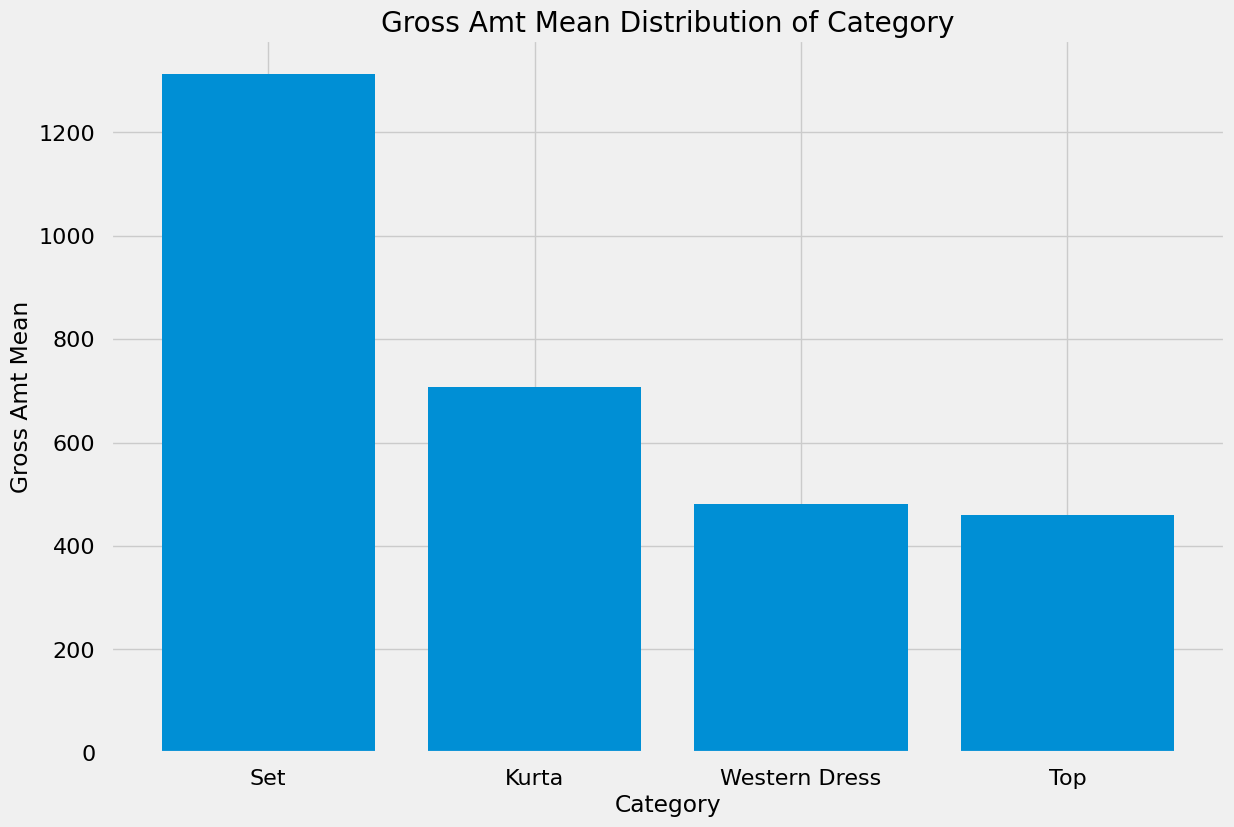

Vaharsha Boutique
The Sum of Gross Amt for Category
Category
Kurta           31445.0
Set             20027.0
Top              4006.0
Ethnic Dress     2814.0
Name: GROSS AMT, dtype: float64
The Mean of Gross Amt for Category
Category
Ethnic Dress    938.000000
Set             870.739130
Top             572.285714
Kurta           542.155172
Name: GROSS AMT, dtype: float64


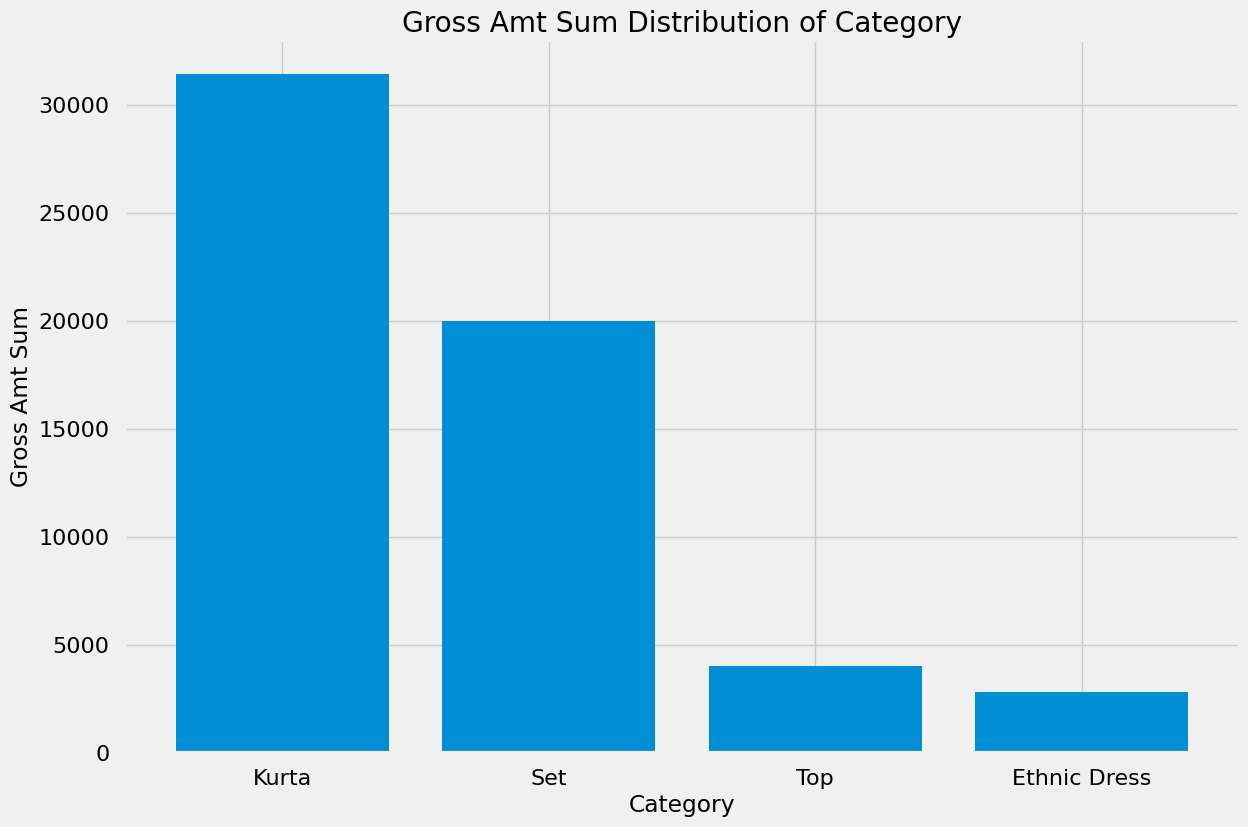

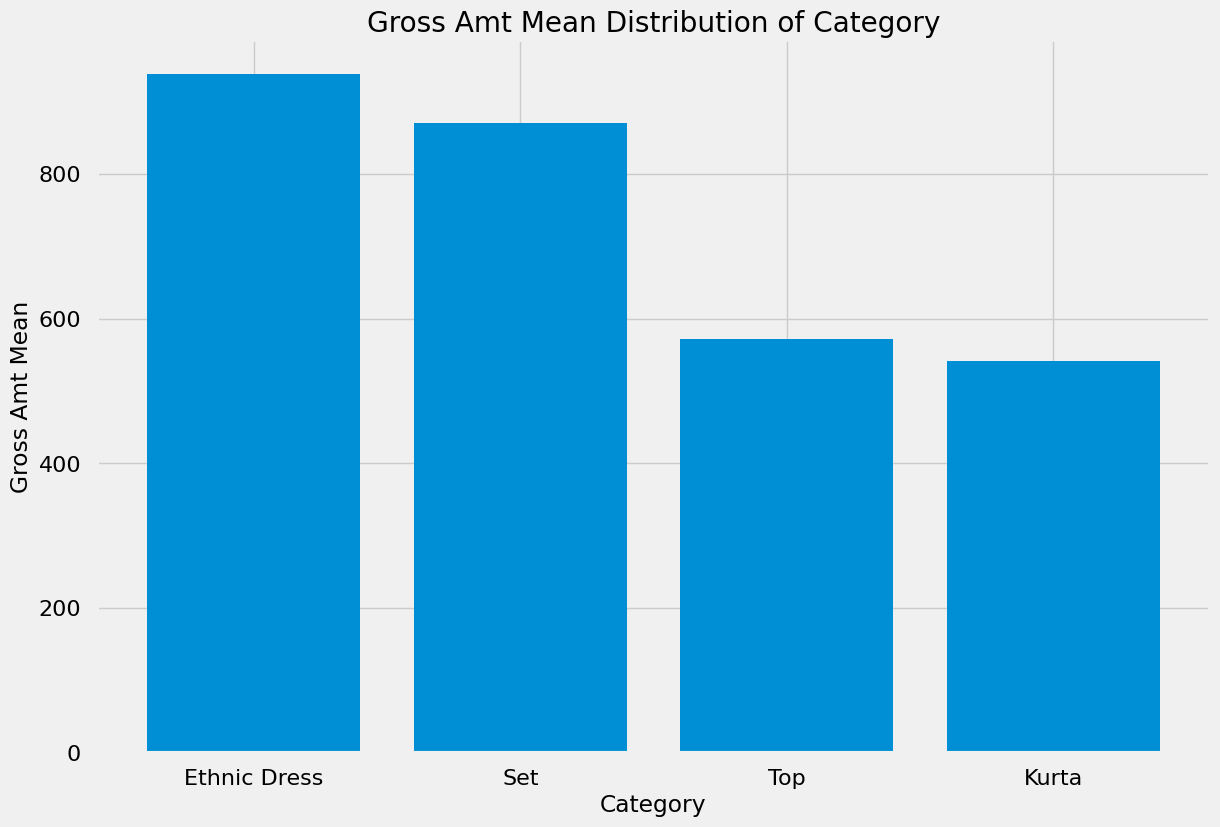

Aanchol
The Sum of Gross Amt for Category
Category
Kurta    11452.0
Name: GROSS AMT, dtype: float64
The Mean of Gross Amt for Category
Category
Kurta    2863.0
Name: GROSS AMT, dtype: float64


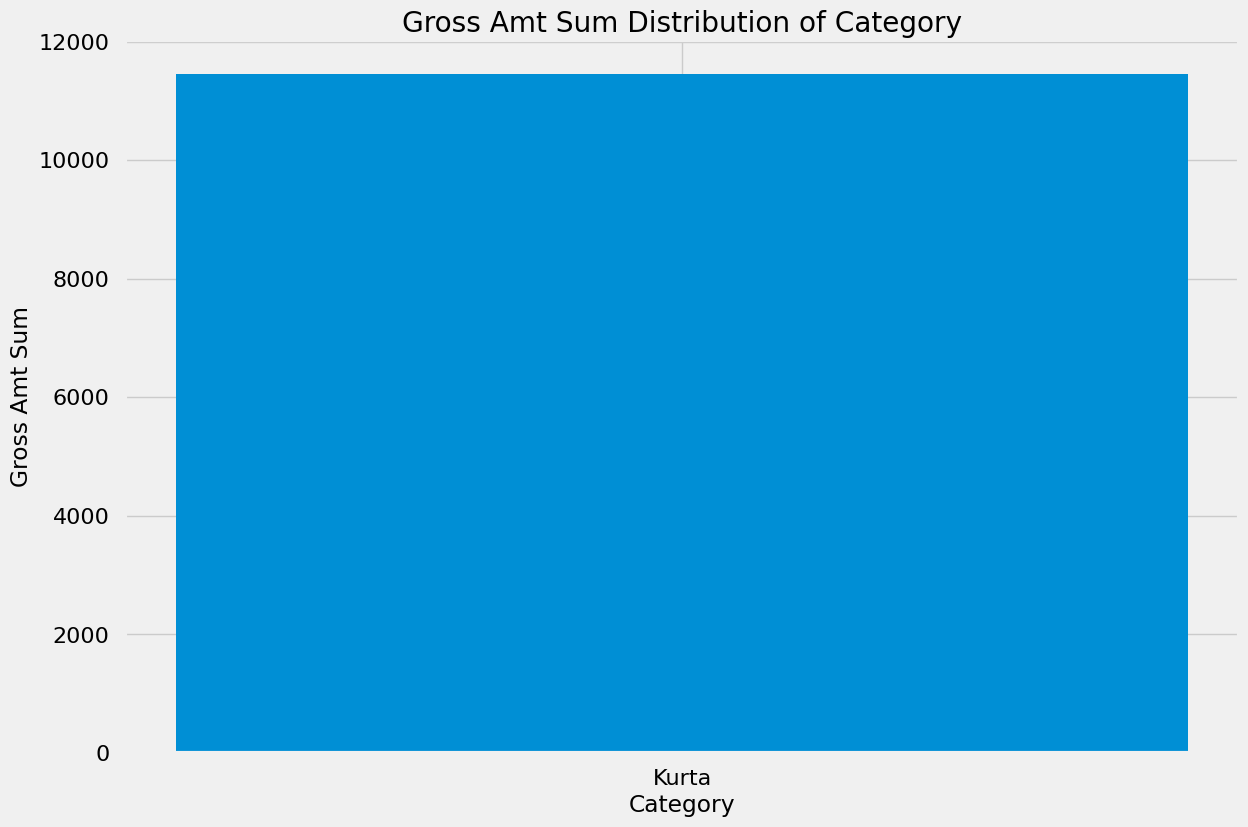

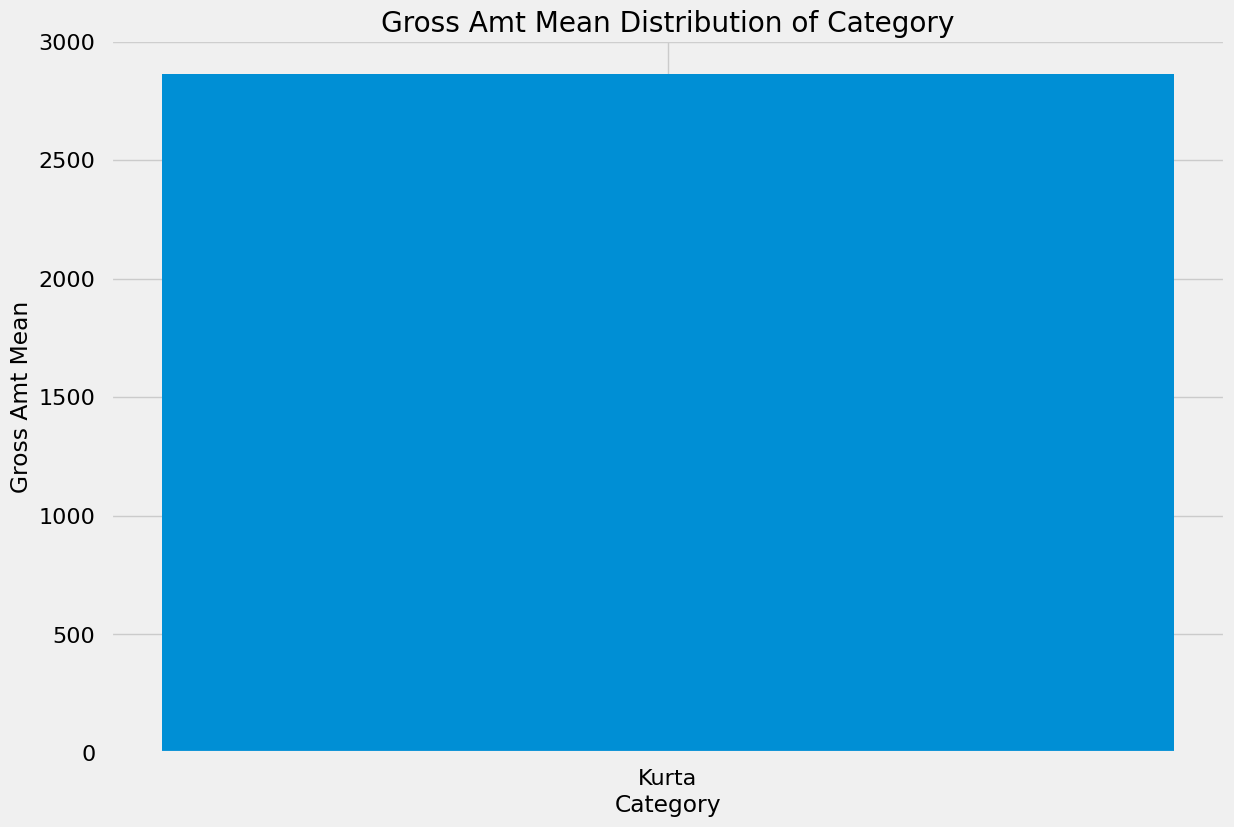

Syeda Morshed
The Sum of Gross Amt for Category
Category
Kurta    38291.0
Name: GROSS AMT, dtype: float64
The Mean of Gross Amt for Category
Category
Kurta    2735.071429
Name: GROSS AMT, dtype: float64


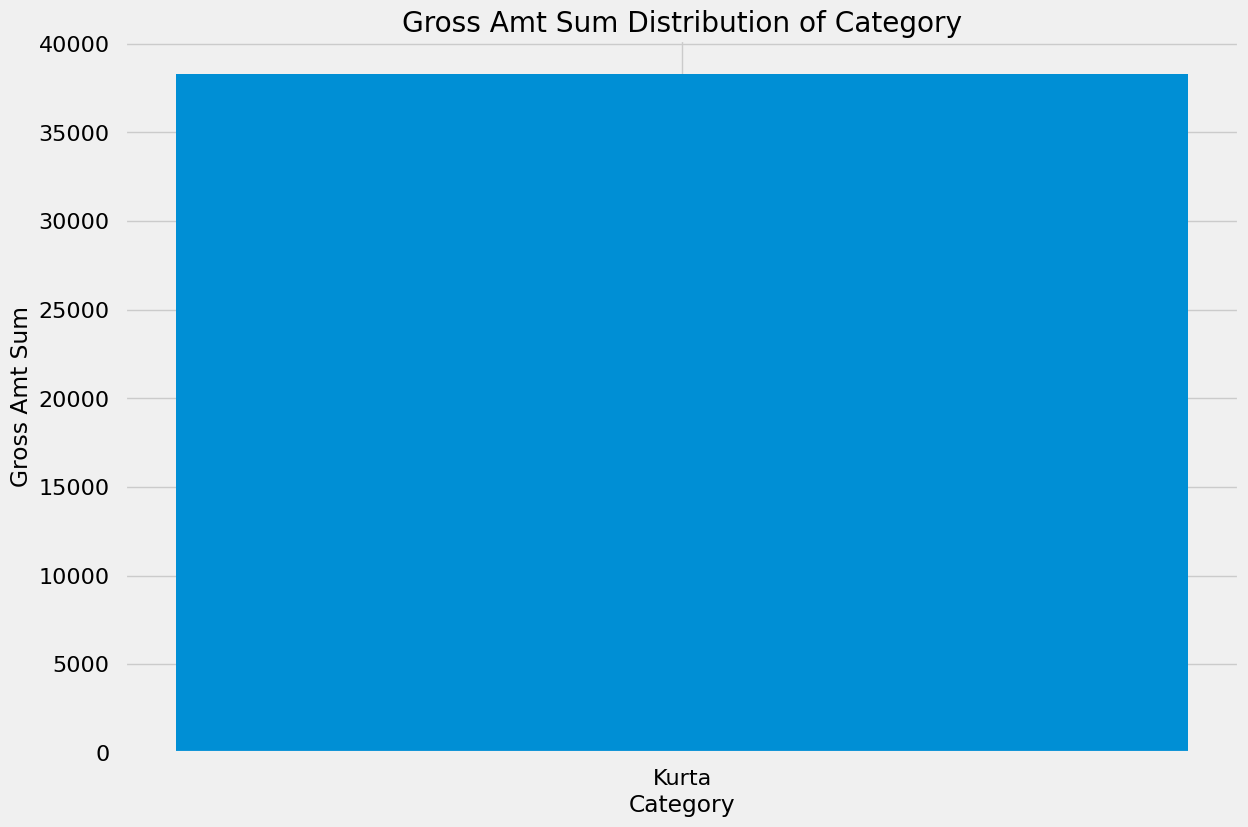

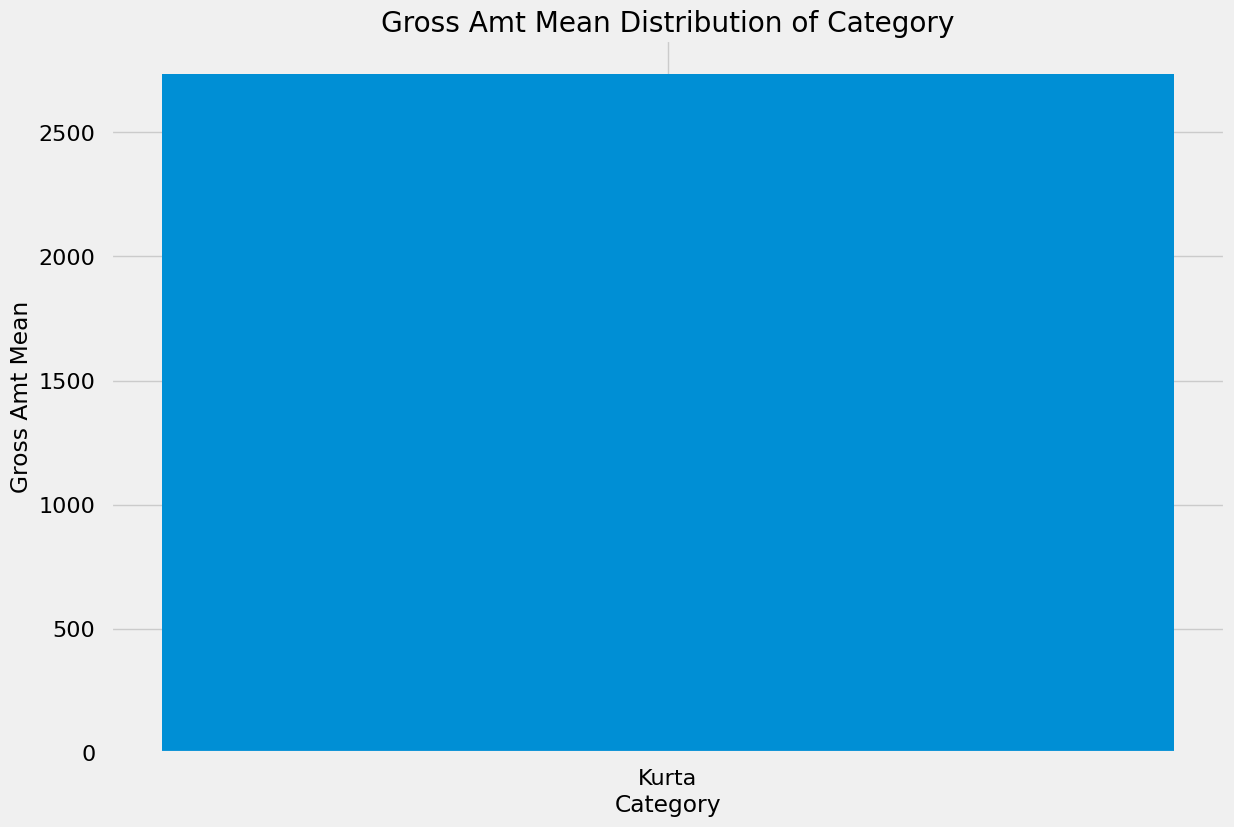

Sure Fashions Llc
The Sum of Gross Amt for Category
Category
Set              109435.0
Kurta             65770.0
Western Dress     50206.0
Top               50129.0
Ethnic Dress      32124.0
Name: GROSS AMT, dtype: float64
The Mean of Gross Amt for Category
Category
Set              3218.676471
Ethnic Dress     3212.400000
Western Dress    2510.300000
Kurta            1934.411765
Top              1474.382353
Name: GROSS AMT, dtype: float64


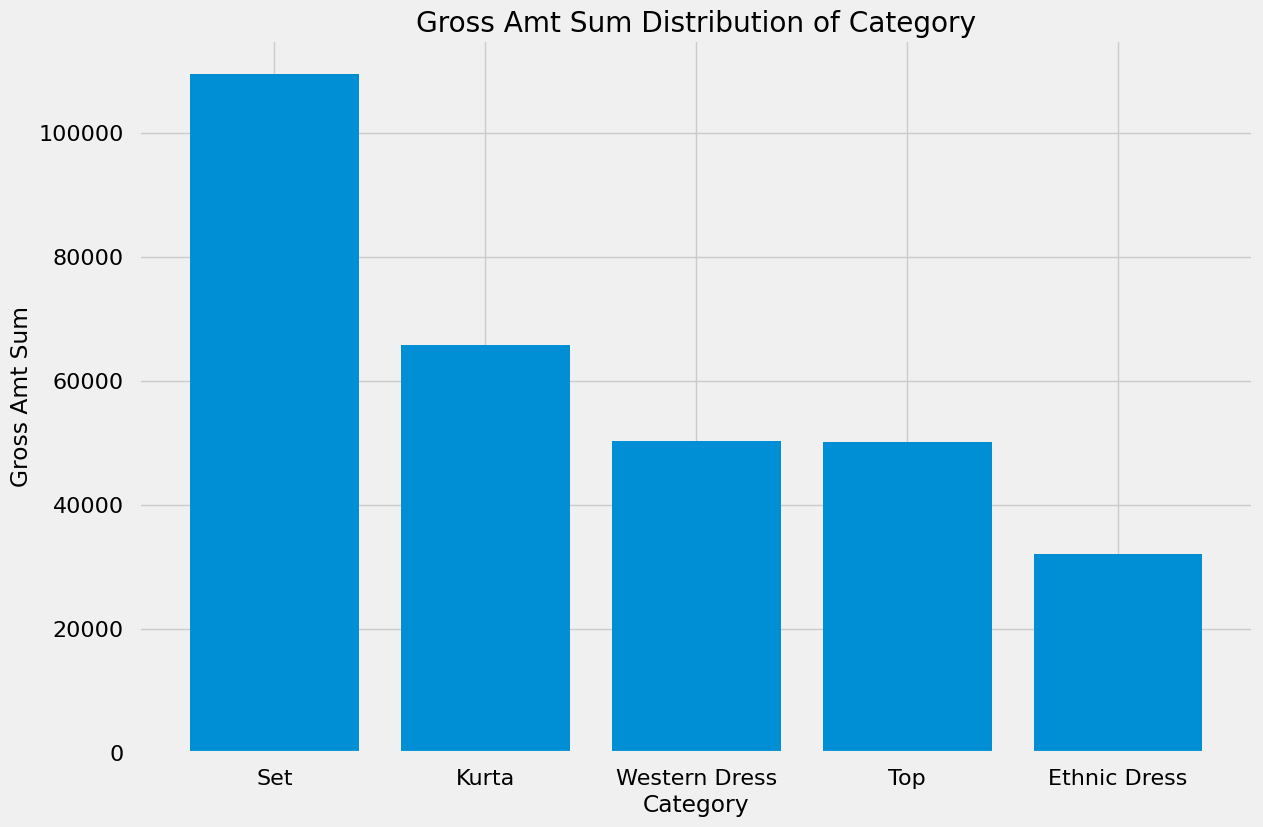

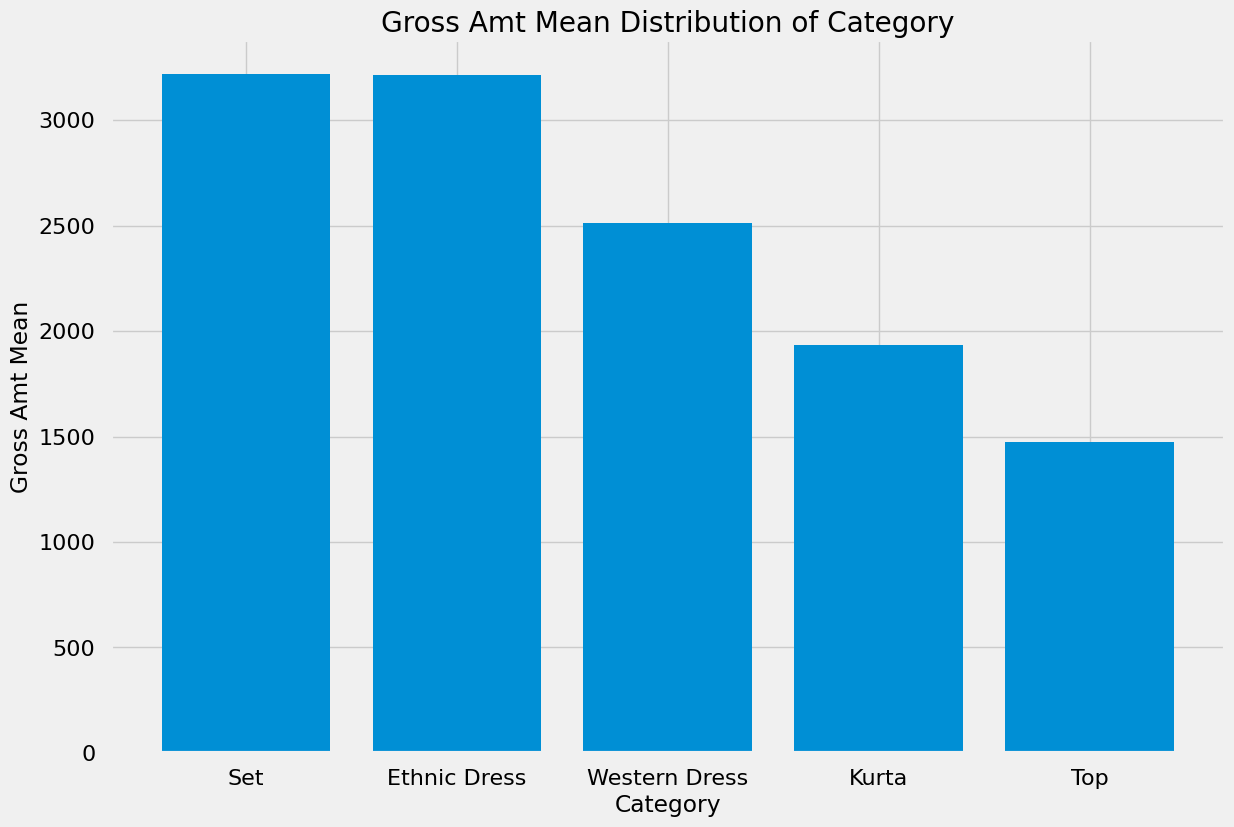

Nitharsha
The Sum of Gross Amt for Category
Category
Set              105764.0
Kurta             27985.0
Ethnic Dress       9549.0
Top                5488.0
Western Dress      1689.0
Name: GROSS AMT, dtype: float64
The Mean of Gross Amt for Category
Category
Set              2858.486486
Ethnic Dress     2387.250000
Western Dress    1689.000000
Kurta            1399.250000
Top               914.666667
Name: GROSS AMT, dtype: float64


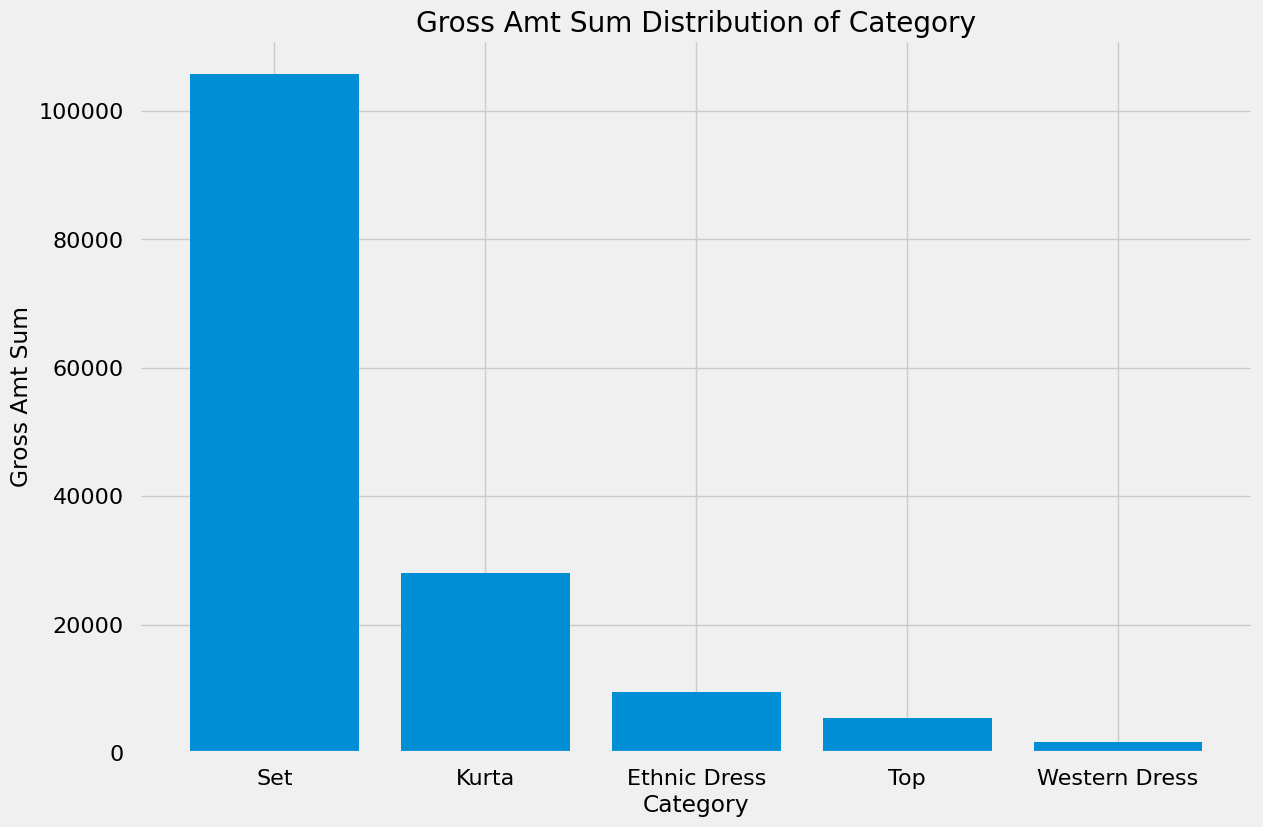

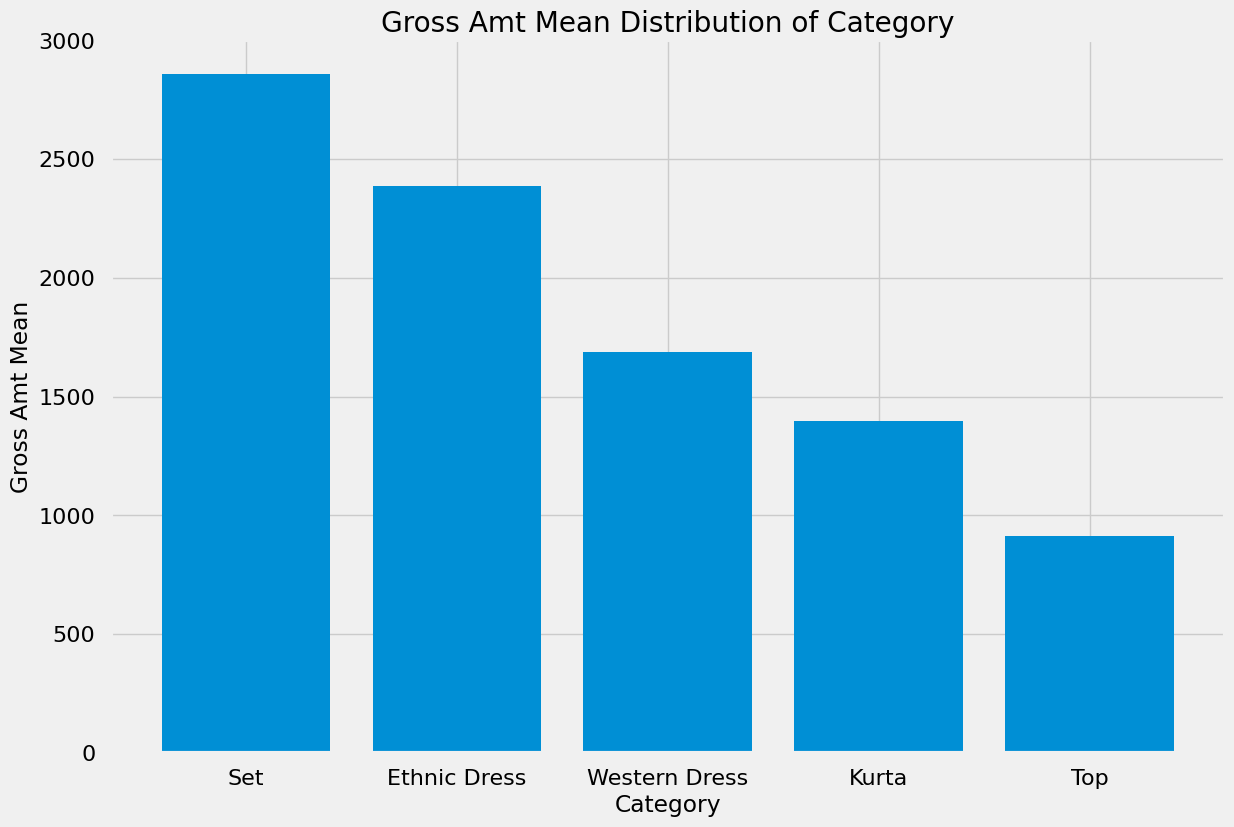

In [119]:
# Get the top 5 Larger CUSTOMER Names
customers_grossamt_sum_top = ['Mulberries Boutique','Amani Concept Trading Llc (Kapda)',
                              'Galaxy Group Of Companies Pvt. Ltd','Rivaan Llc','Vaharsha Boutique']

customers_grossamt_mean_top = ['Aanchol','Amani Concept Trading Llc (Kapda)',
                               'Syeda Morshed','Sure Fashions Llc','Nitharsha']

customers = customers_grossamt_sum_top + customers_grossamt_mean_top

# Remove Duplicate Elements and Reorder
from collections import OrderedDict

unique_customers = list(set(customers))
unique_customers = list(OrderedDict.fromkeys(customers))
customers = unique_customers

# Loop to Draw the Category Sales of Each CUSTOMER
for col in customers:
    df_customer = df_InternationalSR[df_InternationalSR['CUSTOMER'] == col ]

    print(col)

    # Calculate the Sum of GROSS AMT for Each Category
    category_sum = df_customer.groupby("Category")["GROSS AMT"].sum().sort_values(ascending=False)

    # Display the Result
    print("The Sum of Gross Amt for Category")
    print(category_sum.head(5))

    # Calculate the Average Value of GROSS AMT for Each Category
    category_mean = df_customer.groupby("Category")["GROSS AMT"].mean().sort_values(ascending=False)

    # Display the Result
    print("The Mean of Gross Amt for Category")
    print(category_mean.head(5))

    # Draw a Histogram of the Sum of GROSS AMT for Each Category
    plt.bar(category_sum.head(5).index, category_sum.head(5).values)

    plt.title('Gross Amt Sum Distribution of Category')
    plt.xlabel('Category')
    plt.ylabel('Gross Amt Sum')
    plt.show()

    # Draw a Histogram of the GROSS AMT Mean for Each Category
    plt.bar(category_mean.head(5).index, category_mean.head(5).values)

    plt.title('Gross Amt Mean Distribution of Category')
    plt.xlabel('Category')
    plt.ylabel('Gross Amt Mean')
    plt.show()
